In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import scipy.signal as sig
from datetime import datetime
from sklearn.metrics import roc_curve, roc_auc_score
import statistics
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.signal import butter, filtfilt

# 1. Plotting Raw Data

In [2]:
fv = pd.read_csv('pepel.csv')
fv

1.36
0       1.36
1       1.34
2       1.36
3       1.34
4       1.36
...      ...
211128  0.74
211129  0.75
211130  0.76
211131  0.75
211132  0.70

[211133 rows x 1 columns]

0         1.36
1         1.34
2         1.36
3         1.34
4         1.36
          ... 
211128    0.74
211129    0.75
211130    0.76
211131    0.75
211132    0.70
Name: 1.36, Length: 211133, dtype: float64


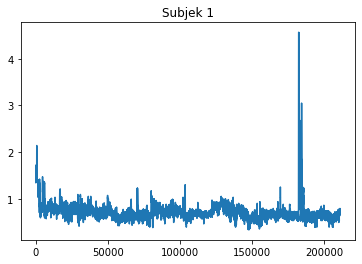

In [3]:
for column in fv.columns:
    print(fv[column])
    plt.figure()
    plt.title("Subjek 1")
    plt.plot(fv[column])
    plt.show()

In [4]:
kn = pd.read_csv('kanwa.csv')
kn

0.20
0       0.21
1       0.20
2       0.20
3       0.21
4       0.20
...      ...
293957  0.12
293958  0.12
293959  0.12
293960  0.12
293961  0.12

[293962 rows x 1 columns]

0         0.21
1         0.20
2         0.20
3         0.21
4         0.20
          ... 
293957    0.12
293958    0.12
293959    0.12
293960    0.12
293961    0.12
Name: 0.20, Length: 293962, dtype: float64


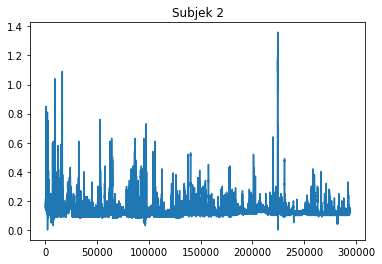

In [5]:
for column in kn.columns:
    print(kn[column])
    plt.figure()
    plt.title("Subjek 2")
    plt.plot(kn[column])
    plt.show()

In [6]:
dn = pd.read_csv('denil.csv')
dn

9
0       1.07
1       1.08
2       1.10
3       1.07
4       1.04
...      ...
135650  1.69
135651  1.71
135652  1.59
135653  1.64
135654  1.00

[135655 rows x 1 columns]

0         1.07
1         1.08
2         1.10
3         1.07
4         1.04
          ... 
135650    1.69
135651    1.71
135652    1.59
135653    1.64
135654    1.00
Name: 9, Length: 135655, dtype: float64


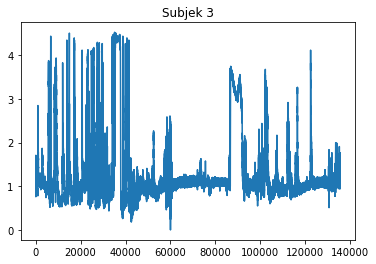

In [7]:
for column in dn.columns:
    print(dn[column])
    plt.figure()
    plt.title("Subjek 3")
    plt.plot(dn[column])
    plt.show()

In [8]:
ny = pd.read_csv('nyu.csv')
ny

0.84
0       0.72
1       0.87
2       0.87
3       0.71
4       0.80
...      ...
198876  0.94
198877  1.12
198878  1.03
198879  0.96
198880  1.12

[198881 rows x 1 columns]

0         0.72
1         0.87
2         0.87
3         0.71
4         0.80
          ... 
198876    0.94
198877    1.12
198878    1.03
198879    0.96
198880    1.12
Name: 0.84, Length: 198881, dtype: float64


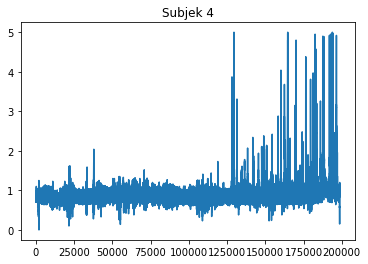

In [9]:
for column in ny.columns:
    print(ny[column])
    plt.figure()
    plt.title("Subjek 4")
    plt.plot(ny[column])
    plt.show()

In [10]:
hk = pd.read_csv('hakim.csv')
hk

83
0       0.77
1       0.87
2       0.86
3       0.77
4       0.82
...      ...
192680  1.02
192681  1.21
192682  1.06
192683  1.01
192684  1.20

[192685 rows x 1 columns]

0         0.77
1         0.87
2         0.86
3         0.77
4         0.82
          ... 
192680    1.02
192681    1.21
192682    1.06
192683    1.01
192684    1.20
Name: 83, Length: 192685, dtype: float64


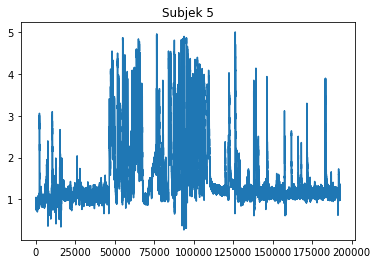

In [11]:
for column in hk.columns:
    print(hk[column])
    plt.figure()
    plt.title("Subjek 5")
    plt.plot(hk[column])
    plt.show()

# 2. Cropping Data & Segmentation

In [12]:
def segment_dataframe(df, sampling_rate=167, segment_duration=30):
    segment_length = sampling_rate * segment_duration
    num_segments = len(df) // segment_length

    segments = []
    for i in range(num_segments):
        start_index = i * segment_length
        end_index = start_index + segment_length
        segment = df.iloc[start_index:end_index]
        segments.append(segment)

    return segments

## Non-Fatigue

### Feivel

In [13]:
fv_tegak = fv.drop(fv.index[0:118240])
fv_tegak

1.36
118240  0.71
118241  0.71
118242  0.70
118243  0.71
118244  0.71
...      ...
211128  0.74
211129  0.75
211130  0.76
211131  0.75
211132  0.70

[92893 rows x 1 columns]

In [14]:
fv_tegak1 = fv_tegak.drop(fv_tegak.index[21120:92893])
fv_tegak1

1.36
118240  0.71
118241  0.71
118242  0.70
118243  0.71
118244  0.71
...      ...
139355  0.71
139356  0.71
139357  0.70
139358  0.68
139359  0.69

[21120 rows x 1 columns]

118240    0.71
118241    0.71
118242    0.70
118243    0.71
118244    0.71
          ... 
139355    0.71
139356    0.71
139357    0.70
139358    0.68
139359    0.69
Name: 1.36, Length: 21120, dtype: float64


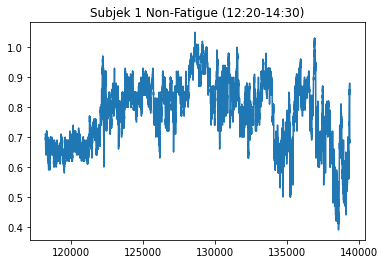

In [15]:
for column in fv_tegak1.columns:
    print(fv_tegak1[column])
    plt.figure()
    plt.title("Subjek 1 Non-Fatigue (12:20-14:30)")
    plt.plot(fv_tegak1[column])
    plt.show()

In [16]:
segmented_dataframes_fv = segment_dataframe(fv_tegak1)
for i, segment_df in enumerate(segmented_dataframes_fv):
    segment_df.to_csv(f'fv_non_{i+1}.csv', index=False)

### Kanwa

In [17]:
kn_tegak = kn.drop(kn.index[70140:293962])
kn_tegak

0.20
0      0.21
1      0.20
2      0.20
3      0.21
4      0.20
...     ...
70135  0.17
70136  0.16
70137  0.17
70138  0.17
70139  0.16

[70140 rows x 1 columns]

0        0.21
1        0.20
2        0.20
3        0.21
4        0.20
         ... 
70135    0.17
70136    0.16
70137    0.17
70138    0.17
70139    0.16
Name: 0.20, Length: 70140, dtype: float64


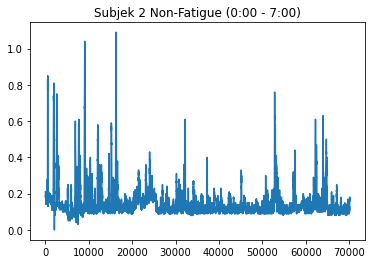

In [18]:
for column in kn_tegak.columns:
    print(kn_tegak[column])
    plt.figure()
    plt.title("Subjek 2 Non-Fatigue (0:00 - 7:00)")
    plt.plot(kn_tegak[column])
    plt.show()

In [19]:
segmented_dataframes_kn = segment_dataframe(kn_tegak)
for i, segment_df in enumerate(segmented_dataframes_kn):
    segment_df.to_csv(f'kn_non_{i+1}.csv', index=False)

### Denil

In [20]:
dn_tegak = dn.drop(dn.index[50100:135655])
dn_tegak

9
0      1.07
1      1.08
2      1.10
3      1.07
4      1.04
...     ...
50095  0.73
50096  0.76
50097  0.96
50098  0.75
50099  0.74

[50100 rows x 1 columns]

0        1.07
1        1.08
2        1.10
3        1.07
4        1.04
         ... 
50095    0.73
50096    0.76
50097    0.96
50098    0.75
50099    0.74
Name: 9, Length: 50100, dtype: float64


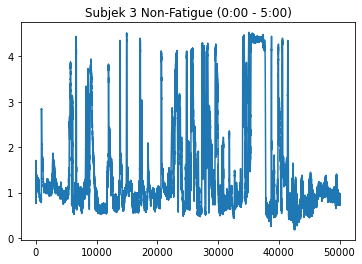

In [21]:
for column in dn_tegak.columns:
    print(dn_tegak[column])
    plt.figure()
    plt.title("Subjek 3 Non-Fatigue (0:00 - 5:00)")
    plt.plot(dn_tegak[column])
    plt.show()

In [22]:
segmented_dataframes_dn = segment_dataframe(dn_tegak)
for i, segment_df in enumerate(segmented_dataframes_dn):
    segment_df.to_csv(f'dn_non_{i+1}.csv', index=False)

### Nyu

In [23]:
ny_tegak = ny.drop(ny.index[130260:198881])
ny_tegak

0.84
0       0.72
1       0.87
2       0.87
3       0.71
4       0.80
...      ...
130255  0.99
130256  0.82
130257  0.71
130258  0.95
130259  0.87

[130260 rows x 1 columns]

0         0.72
1         0.87
2         0.87
3         0.71
4         0.80
          ... 
130255    0.99
130256    0.82
130257    0.71
130258    0.95
130259    0.87
Name: 0.84, Length: 130260, dtype: float64


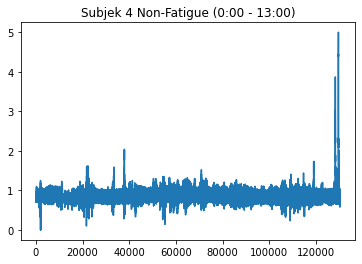

In [24]:
for column in ny_tegak.columns:
    print(ny_tegak[column])
    plt.figure()
    plt.title("Subjek 4 Non-Fatigue (0:00 - 13:00)")
    plt.plot(ny_tegak[column])
    plt.show()

In [25]:
segmented_dataframes_ny = segment_dataframe(ny_tegak)
for i, segment_df in enumerate(segmented_dataframes_ny):
    segment_df.to_csv(f'ny_non_{i+1}.csv', index=False)

### Hakim

In [26]:
hk_tegak = hk.drop(hk.index[180684:192685])
hk_tegak

83
0       0.77
1       0.87
2       0.86
3       0.77
4       0.82
...      ...
180679  1.20
180680  1.11
180681  1.02
180682  1.15
180683  1.17

[180684 rows x 1 columns]

0         0.77
1         0.87
2         0.86
3         0.77
4         0.82
          ... 
180679    1.20
180680    1.11
180681    1.02
180682    1.15
180683    1.17
Name: 83, Length: 180684, dtype: float64


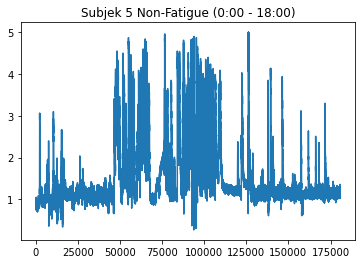

In [27]:
for column in hk_tegak.columns:
    print(hk_tegak[column])
    plt.figure()
    plt.title("Subjek 5 Non-Fatigue (0:00 - 18:00)")
    plt.plot(hk_tegak[column])
    plt.show()

In [28]:
segmented_dataframes_hk = segment_dataframe(hk_tegak)
for i, segment_df in enumerate(segmented_dataframes_hk):
    segment_df.to_csv(f'hk_non_{i+1}.csv', index=False)

## Fatigue

### Feivel

In [29]:
fv_fat = fv.drop(fv.index[0:174014])
fv_fat

1.36
174014  0.59
174015  0.59
174016  0.61
174017  0.60
174018  0.59
...      ...
211128  0.74
211129  0.75
211130  0.76
211131  0.75
211132  0.70

[37119 rows x 1 columns]

In [30]:
fv_fat = fv_fat.drop(fv_fat.index[10020:37119])
fv_fat

1.36
174014  0.59
174015  0.59
174016  0.61
174017  0.60
174018  0.59
...      ...
184029  0.82
184030  0.81
184031  0.83
184032  0.85
184033  0.85

[10020 rows x 1 columns]

174014    0.59
174015    0.59
174016    0.61
174017    0.60
174018    0.59
          ... 
184029    0.82
184030    0.81
184031    0.83
184032    0.85
184033    0.85
Name: 1.36, Length: 10020, dtype: float64


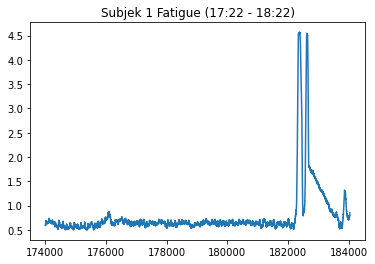

In [31]:
for column in fv_fat.columns:
    print(fv_fat[column])
    plt.figure()
    plt.title("Subjek 1 Fatigue (17:22 - 18:22)")
    plt.plot(fv_fat[column])
    plt.show()

In [32]:
segmented_dataframes_fv_fat = segment_dataframe(fv_fat)
for i, segment_df in enumerate(segmented_dataframes_fv_fat):
    segment_df.to_csv(f'fv_fat_{i+1}.csv', index=False)

### Kanwa

In [33]:
kn_fat = kn.drop(kn.index[0:250500])
kn_fat

0.20
250500  0.12
250501  0.11
250502  0.12
250503  0.12
250504  0.11
...      ...
293957  0.12
293958  0.12
293959  0.12
293960  0.12
293961  0.12

[43462 rows x 1 columns]

250500    0.12
250501    0.11
250502    0.12
250503    0.12
250504    0.11
          ... 
293957    0.12
293958    0.12
293959    0.12
293960    0.12
293961    0.12
Name: 0.20, Length: 43462, dtype: float64


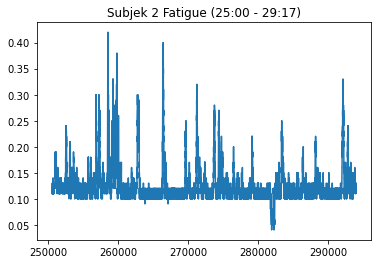

In [34]:
for column in kn_fat.columns:
    print(kn_fat[column])
    plt.figure()
    plt.title("Subjek 2 Fatigue (25:00 - 29:17)")
    plt.plot(kn_fat[column])
    plt.show()

In [35]:
segmented_dataframes_kn_fat = segment_dataframe(kn_fat)
for i, segment_df in enumerate(segmented_dataframes_kn_fat):
    segment_df.to_csv(f'kn_fat_{i+1}.csv', index=False)

### Denil

In [36]:
dn_fat = dn.drop(dn.index[0:50100])
dn_fat

9
50100   0.95
50101   0.79
50102   0.74
50103   0.92
50104   0.86
...      ...
135650  1.69
135651  1.71
135652  1.59
135653  1.64
135654  1.00

[85555 rows x 1 columns]

50100     0.95
50101     0.79
50102     0.74
50103     0.92
50104     0.86
          ... 
135650    1.69
135651    1.71
135652    1.59
135653    1.64
135654    1.00
Name: 9, Length: 85555, dtype: float64


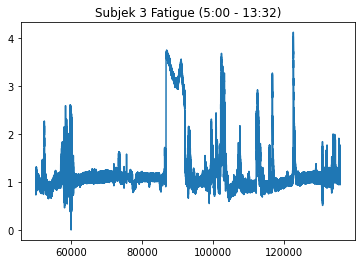

In [37]:
for column in dn_fat.columns:
    print(dn_fat[column])
    plt.figure()
    plt.title("Subjek 3 Fatigue (5:00 - 13:32)")
    plt.plot(dn_fat[column])
    plt.show()

In [38]:
segmented_dataframes_dn_fat = segment_dataframe(dn_fat)
for i, segment_df in enumerate(segmented_dataframes_dn_fat):
    segment_df.to_csv(f'dn_fat_{i+1}.csv', index=False)

### Nyu

In [39]:
ny_fat = ny.drop(ny.index[0:130260])
ny_fat

0.84
130260  0.70
130261  0.89
130262  0.91
130263  0.69
130264  0.81
...      ...
198876  0.94
198877  1.12
198878  1.03
198879  0.96
198880  1.12

[68621 rows x 1 columns]

130260    0.70
130261    0.89
130262    0.91
130263    0.69
130264    0.81
          ... 
198876    0.94
198877    1.12
198878    1.03
198879    0.96
198880    1.12
Name: 0.84, Length: 68621, dtype: float64


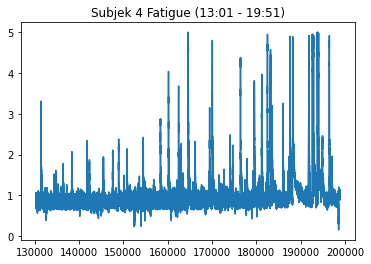

In [40]:
for column in ny_fat.columns:
    print(ny_fat[column])
    plt.figure()
    plt.title("Subjek 4 Fatigue (13:01 - 19:51)")
    plt.plot(ny_fat[column])
    plt.show()

In [41]:
segmented_dataframes_ny_fat = segment_dataframe(ny_fat)
for i, segment_df in enumerate(segmented_dataframes_ny_fat):
    segment_df.to_csv(f'ny_fat_{i+1}.csv', index=False)

### Hakim

In [42]:
hk_fat = hk.drop(hk.index[0:180684])
hk_fat

83
180684  1.02
180685  1.08
180686  1.22
180687  1.03
180688  1.05
...      ...
192680  1.02
192681  1.21
192682  1.06
192683  1.01
192684  1.20

[12001 rows x 1 columns]

180684    1.02
180685    1.08
180686    1.22
180687    1.03
180688    1.05
          ... 
192680    1.02
192681    1.21
192682    1.06
192683    1.01
192684    1.20
Name: 83, Length: 12001, dtype: float64


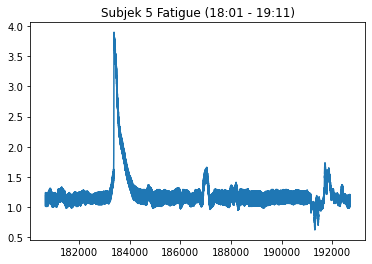

In [43]:
for column in hk_fat.columns:
    print(hk_fat[column])
    plt.figure()
    plt.title("Subjek 5 Fatigue (18:01 - 19:11)")
    plt.plot(hk_fat[column])
    plt.show()

In [44]:
segmented_dataframes_hk_fat = segment_dataframe(hk_fat)
for i, segment_df in enumerate(segmented_dataframes_hk_fat):
    segment_df.to_csv(f'hk_fat_{i+1}.csv', index=False)

# 3. Filtering

In [45]:
def filtering(data, lowcut, highcut, fs, order):
    fs = 1000
    lowcut = 20
    highcut = 499
    order = 4
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

## Non-Fatigue

### Feivel

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3887032409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['1.36'] = fv_non_filtered_data


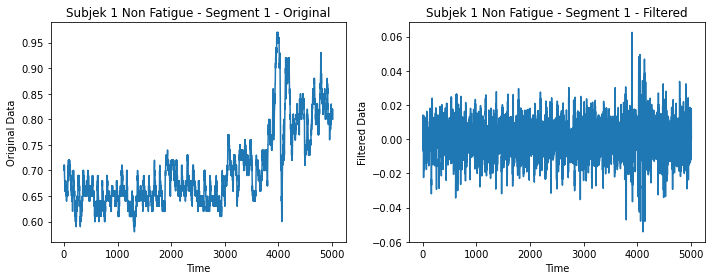

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3887032409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['1.36'] = fv_non_filtered_data


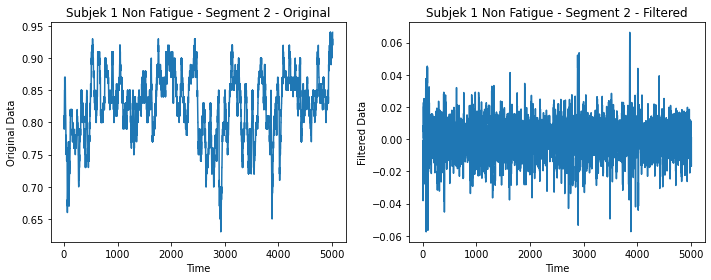

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3887032409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['1.36'] = fv_non_filtered_data


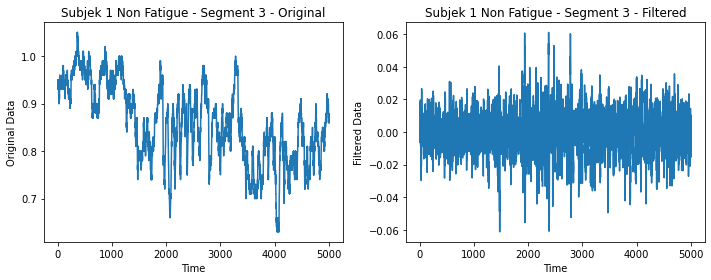

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3887032409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['1.36'] = fv_non_filtered_data


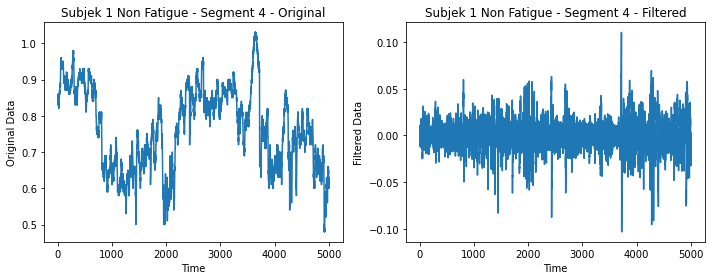

In [46]:
for i, segment_df in enumerate(segmented_dataframes_fv):
    data = segment_df['1.36'].values
    fv_non_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['1.36'] = fv_non_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 1 Non Fatigue - Segment {i+1} - Original')
    axs[1].plot(fv_non_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 1 Non Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Kanwa

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


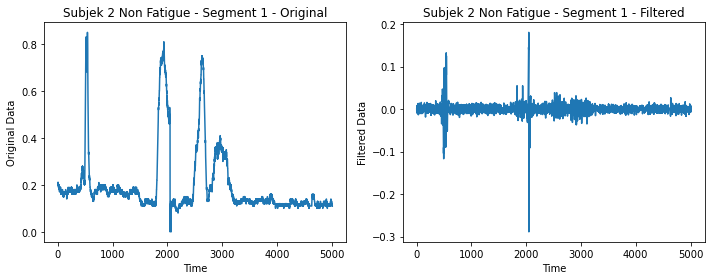

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


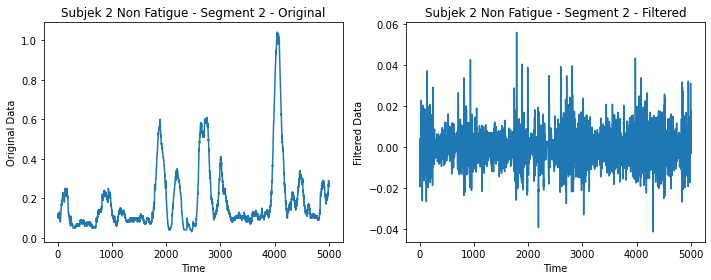

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


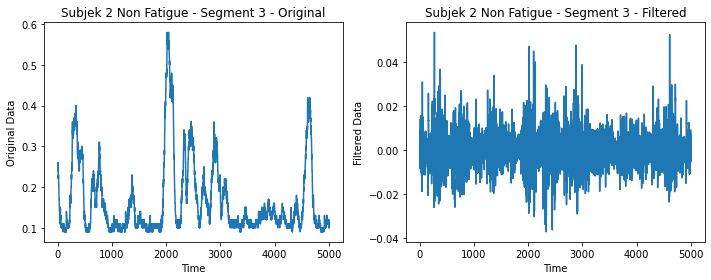

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


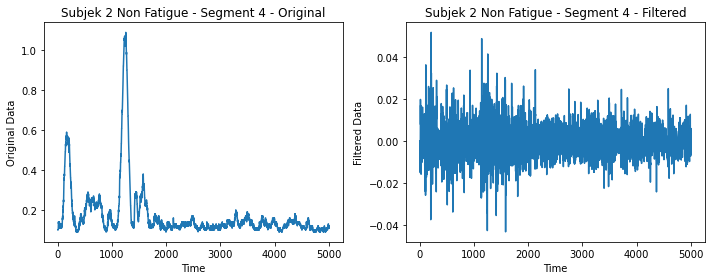

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


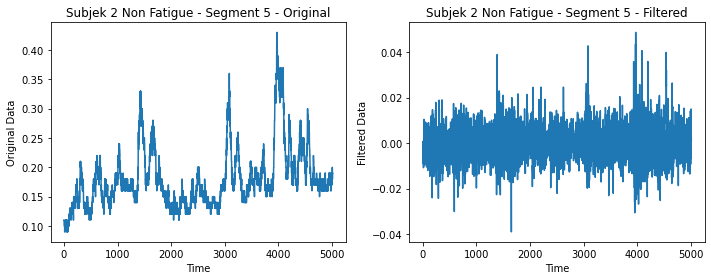

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


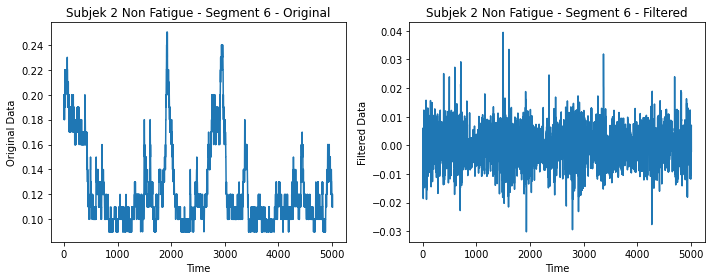

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


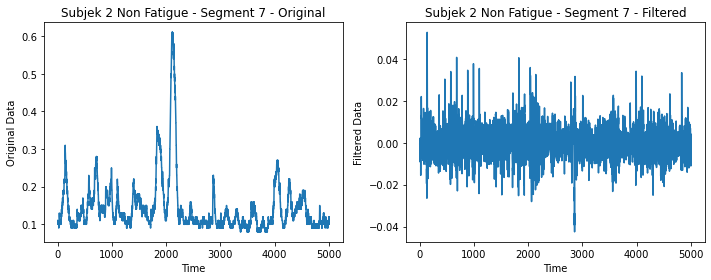

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


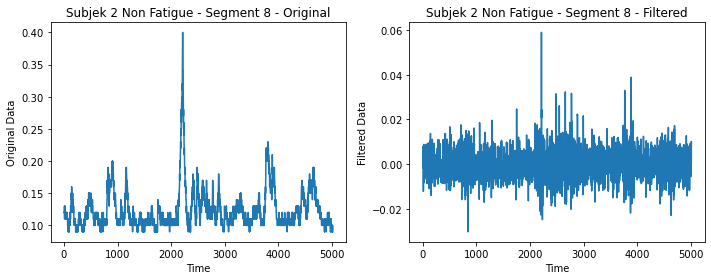

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


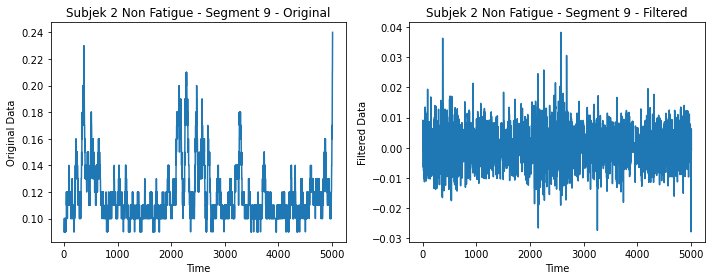

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


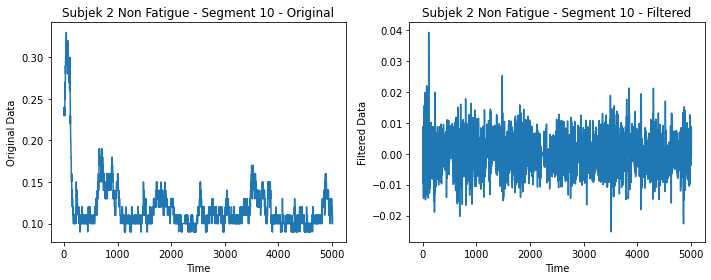

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


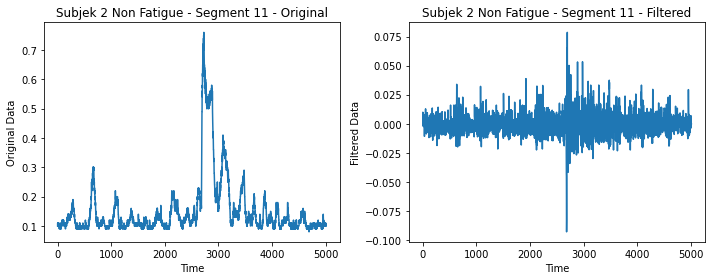

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


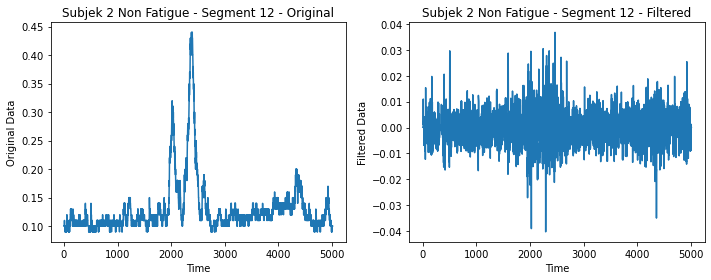

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


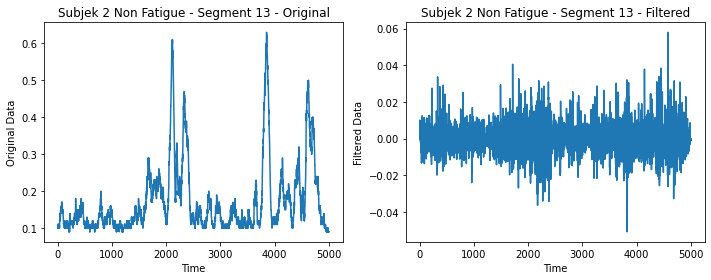

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\85550854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_non_filtered_data


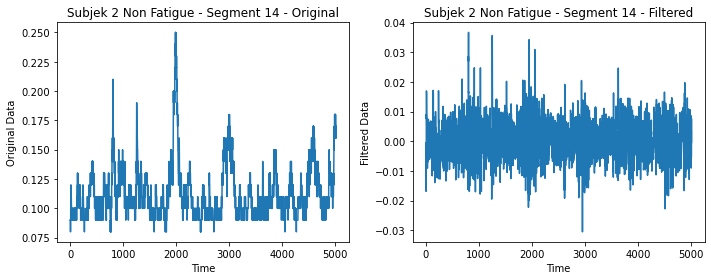

In [47]:
for i, segment_df in enumerate(segmented_dataframes_kn):
    data = segment_df['0.20'].values
    kn_non_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = kn_non_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 2 Non Fatigue - Segment {i+1} - Original')
    axs[1].plot(kn_non_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 2 Non Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Denil

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


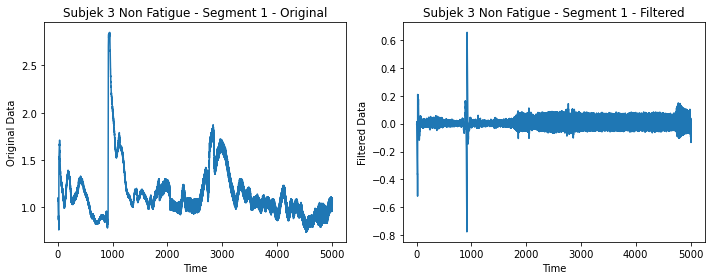

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


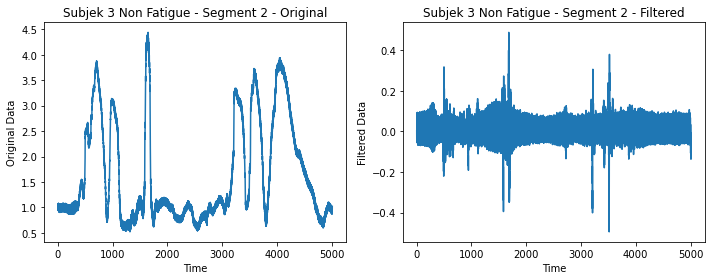

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


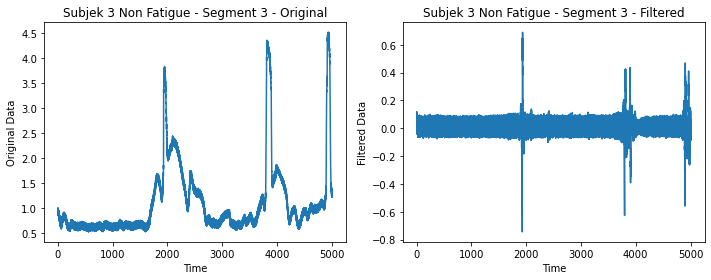

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


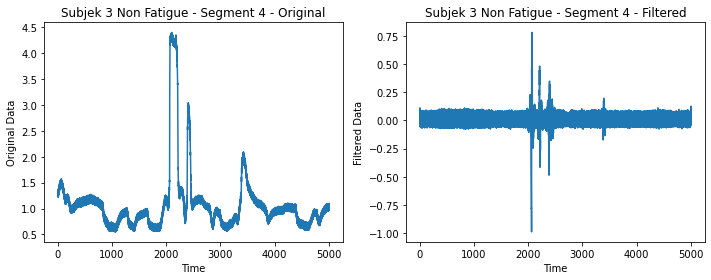

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


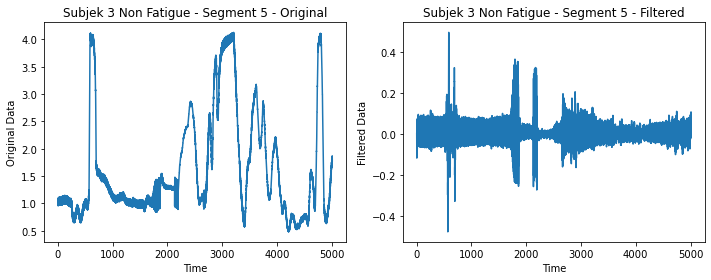

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


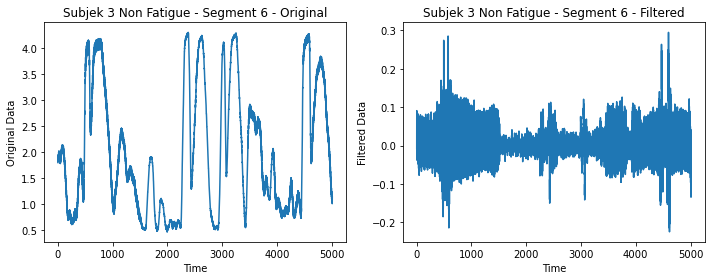

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


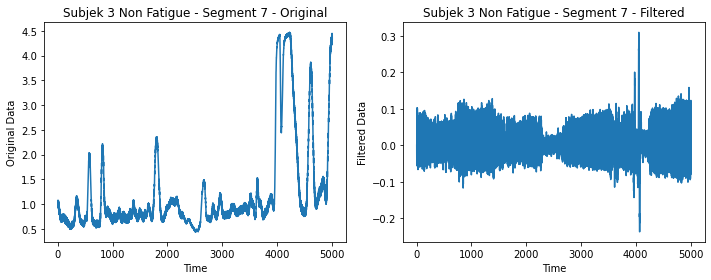

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


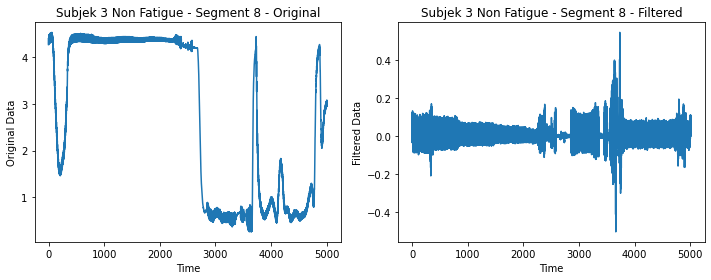

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


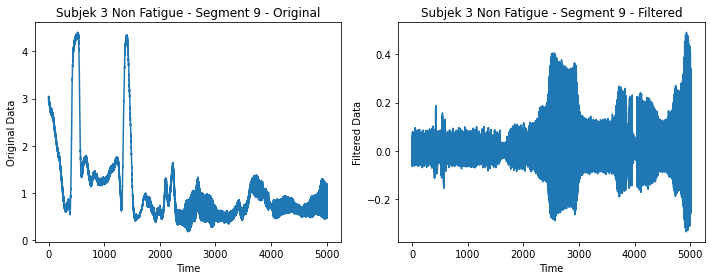

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1529655970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_non_filtered_data


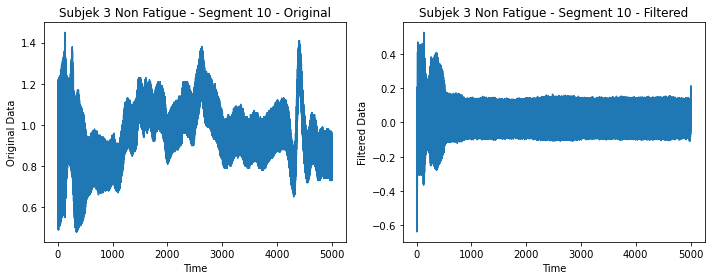

In [48]:
for i, segment_df in enumerate(segmented_dataframes_dn):
    data = segment_df['9'].values
    dn_non_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = dn_non_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 3 Non Fatigue - Segment {i+1} - Original')
    axs[1].plot(dn_non_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 3 Non Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Nyu

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


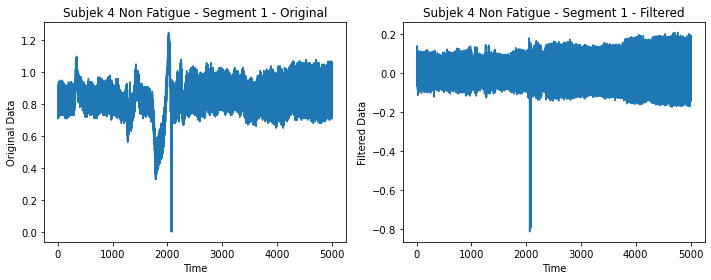

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


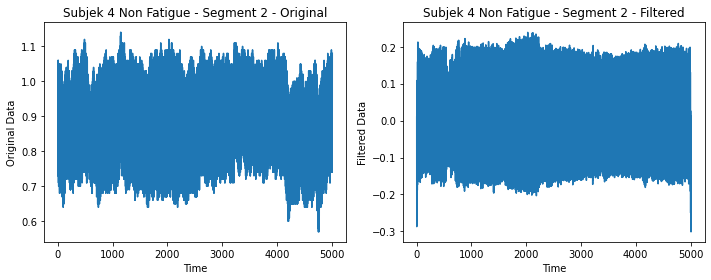

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


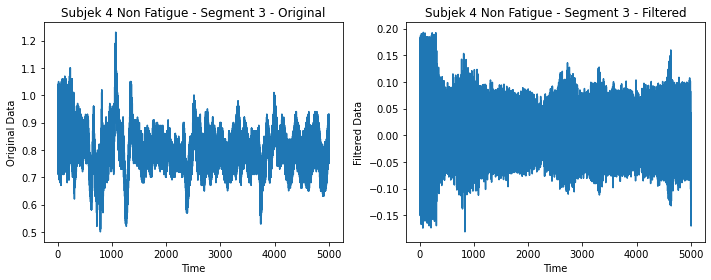

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


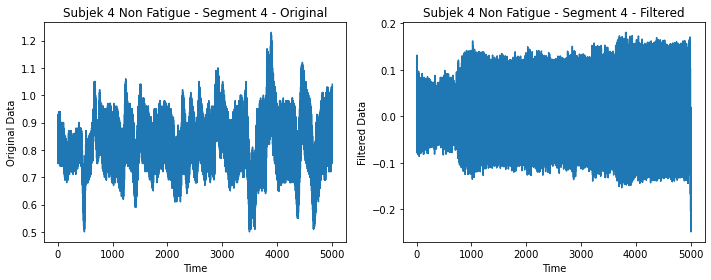

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


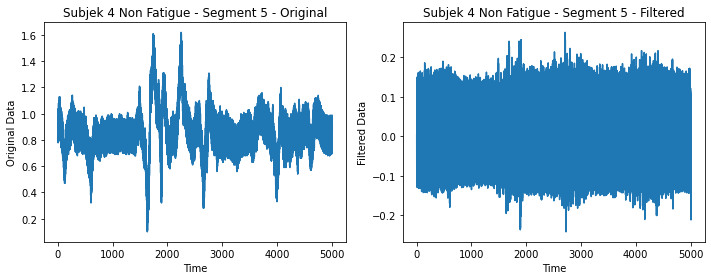

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


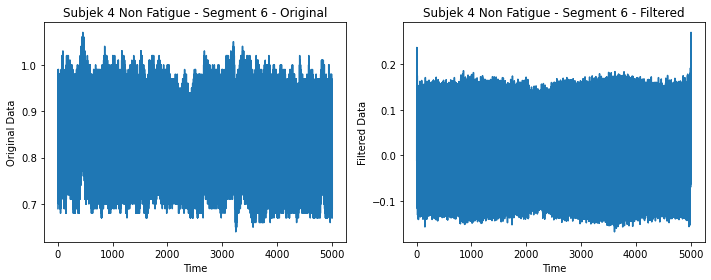

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


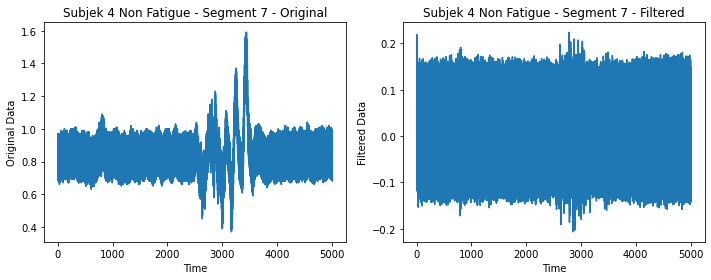

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


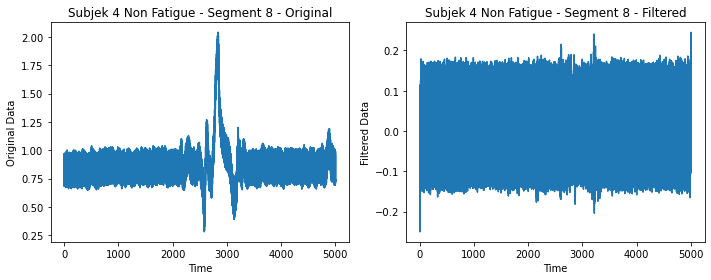

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


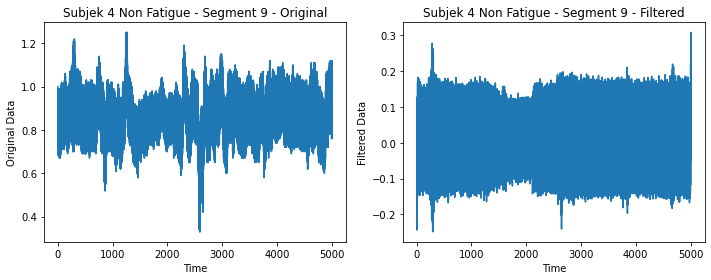

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


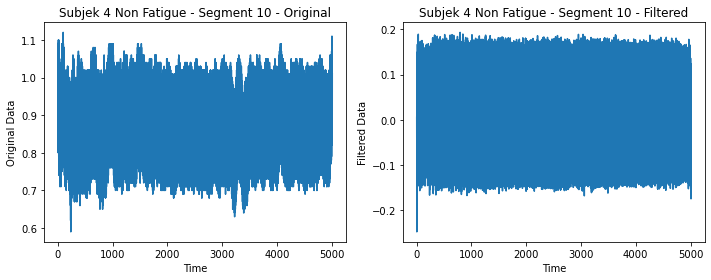

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


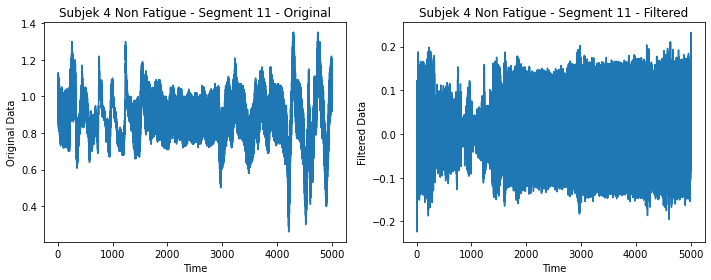

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


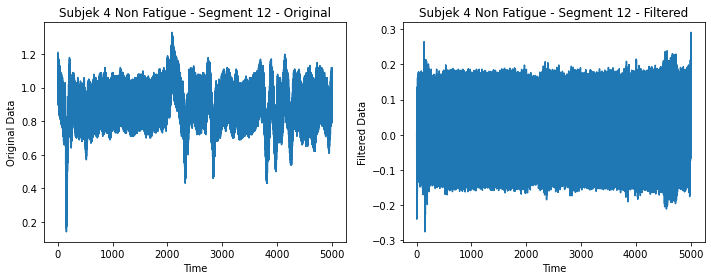

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


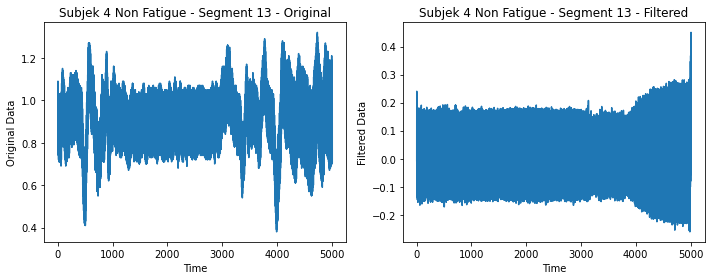

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


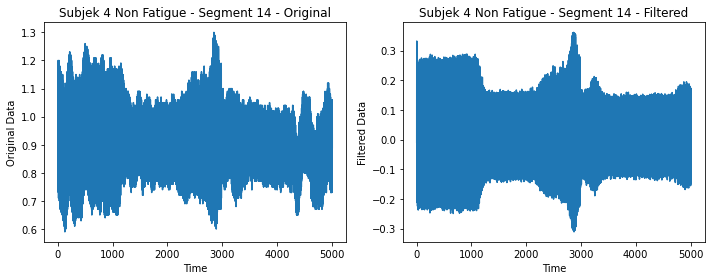

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


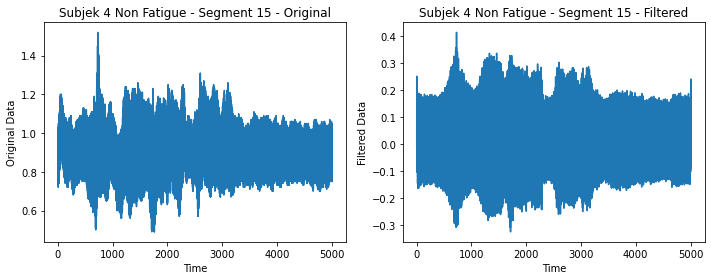

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


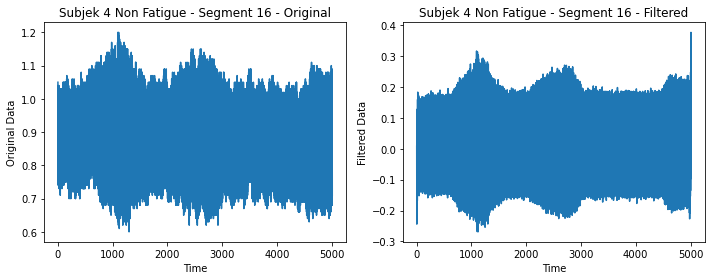

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


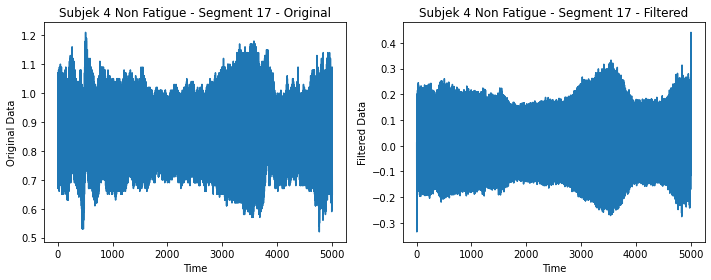

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


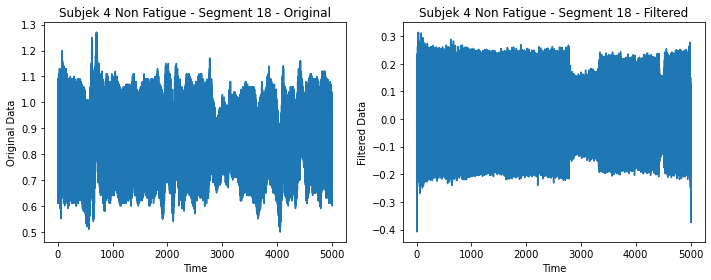

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


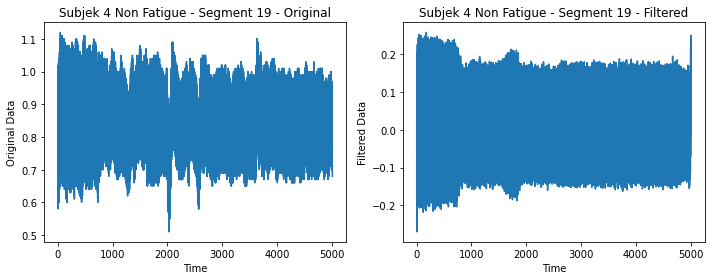

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


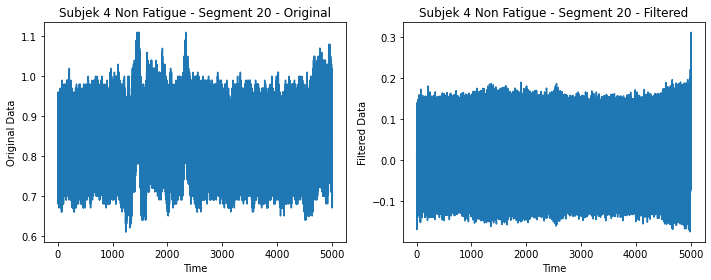

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


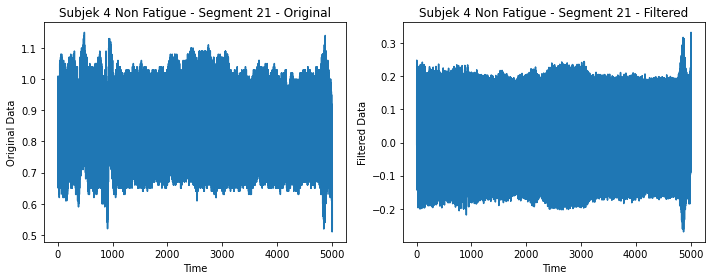

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


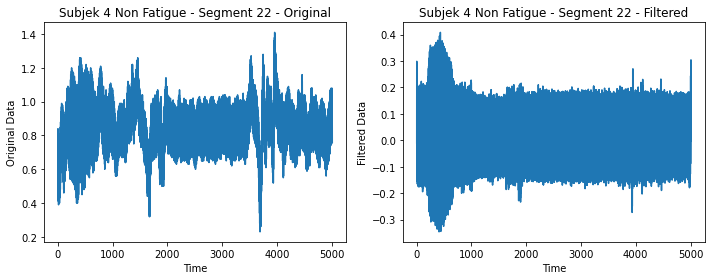

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


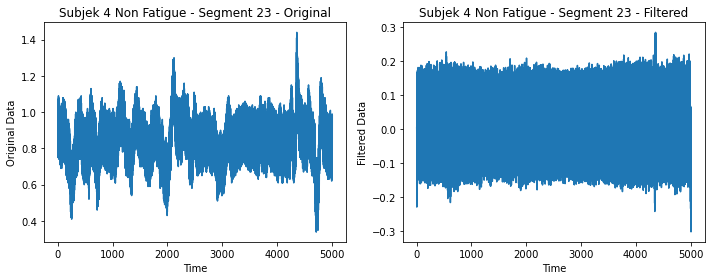

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


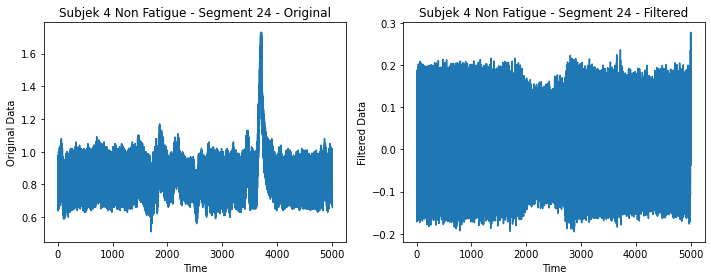

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


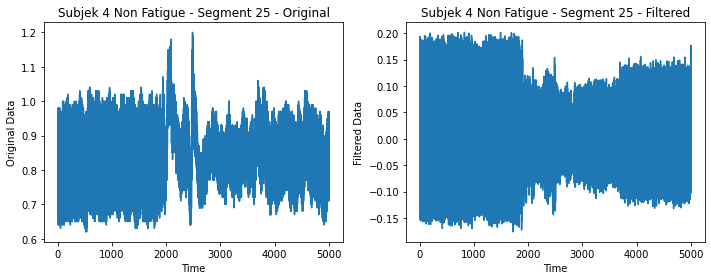

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\310698196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_non_filtered_data


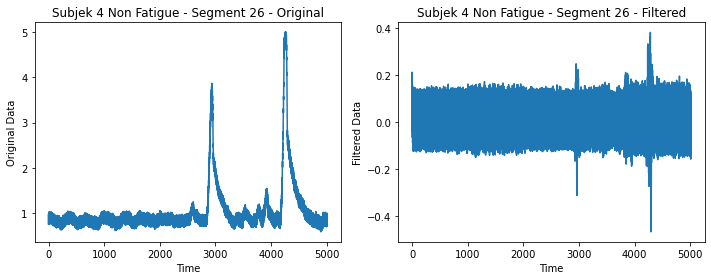

In [49]:
for i, segment_df in enumerate(segmented_dataframes_ny):
    data = segment_df['0.84'].values
    ny_non_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = ny_non_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 4 Non Fatigue - Segment {i+1} - Original')
    axs[1].plot(ny_non_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 4 Non Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Hakim

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


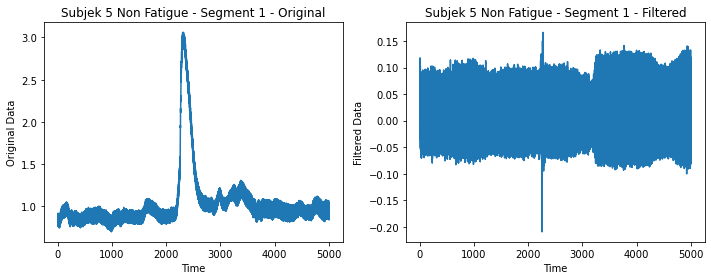

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


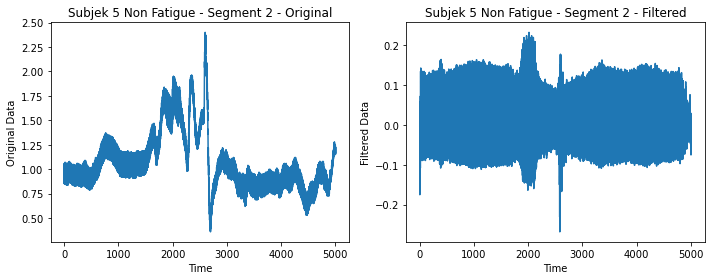

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


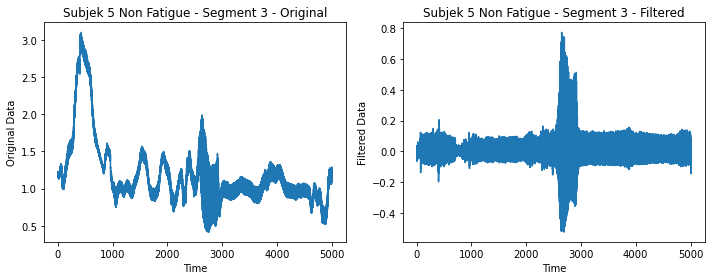

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


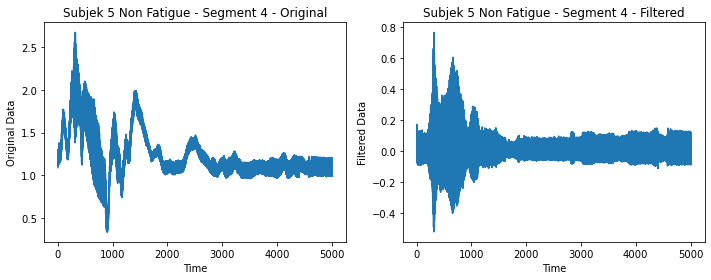

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


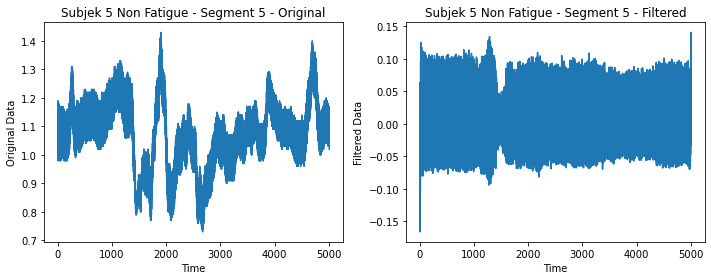

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


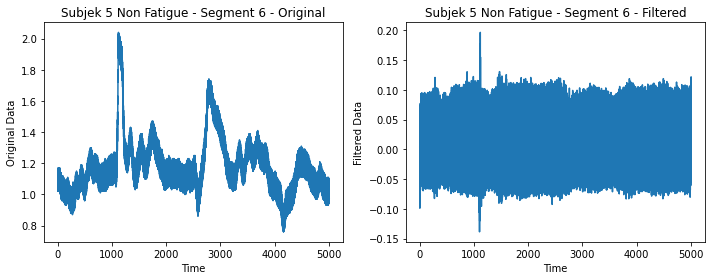

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


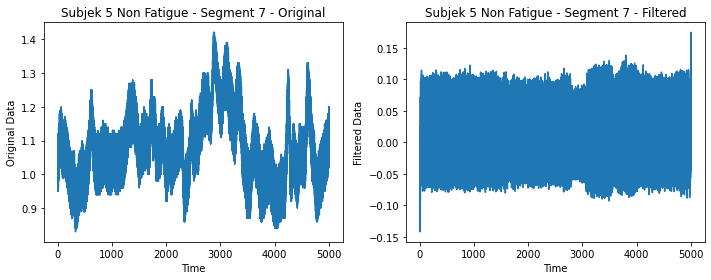

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


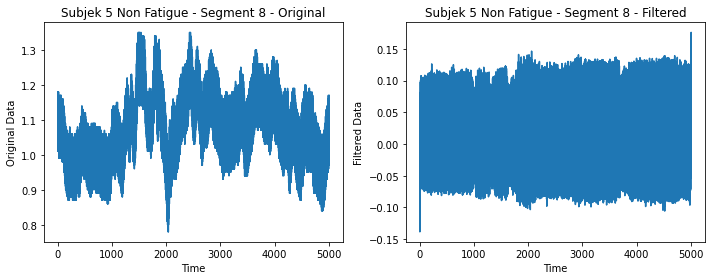

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


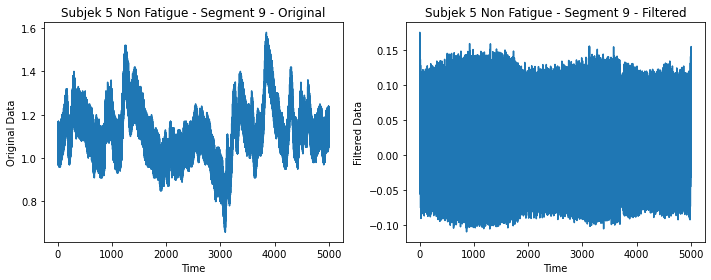

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


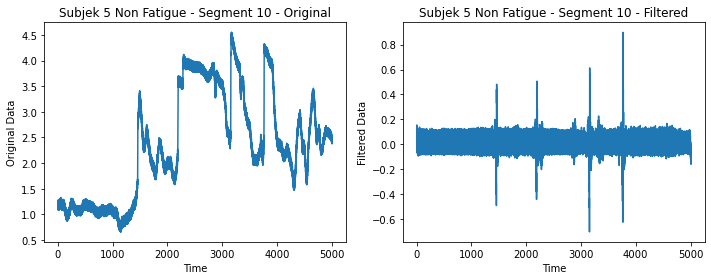

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


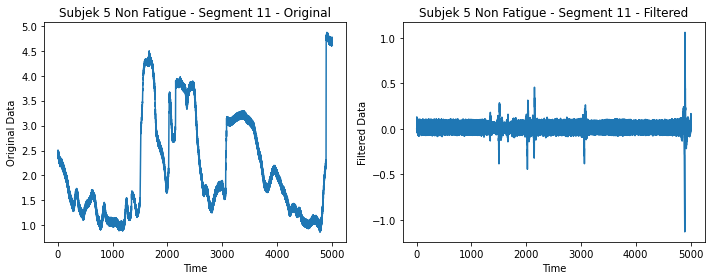

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


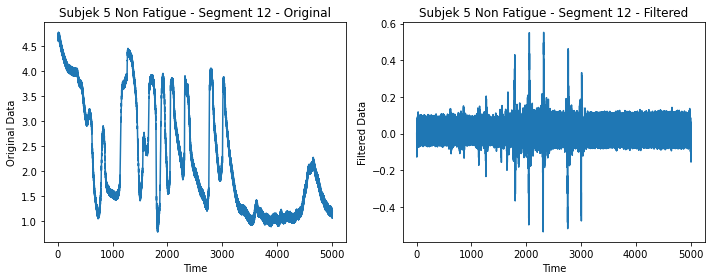

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


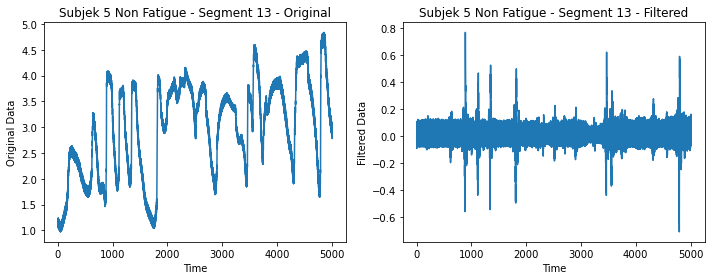

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


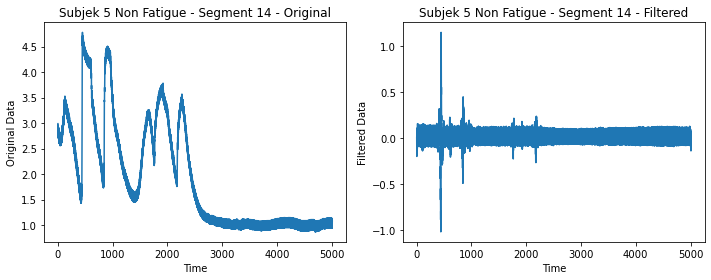

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


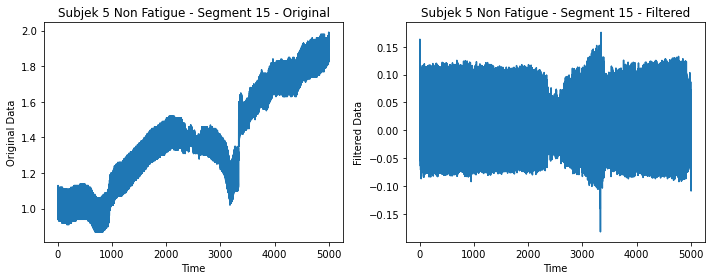

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


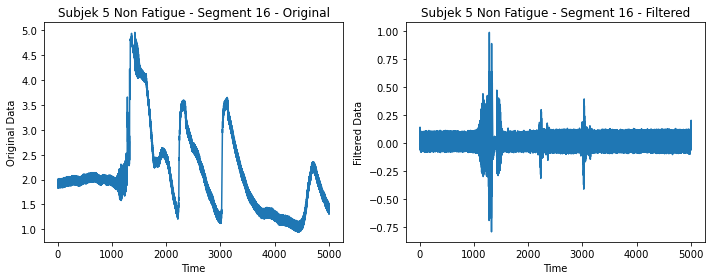

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


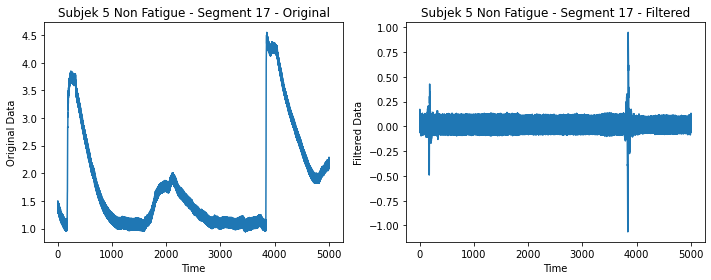

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


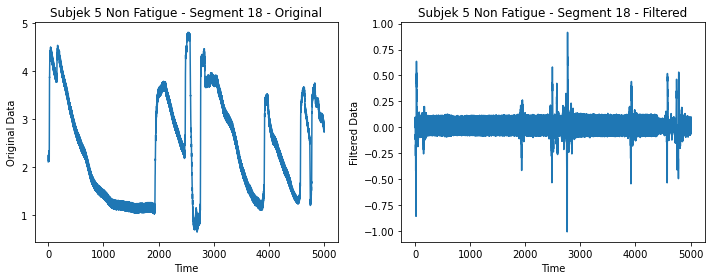

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


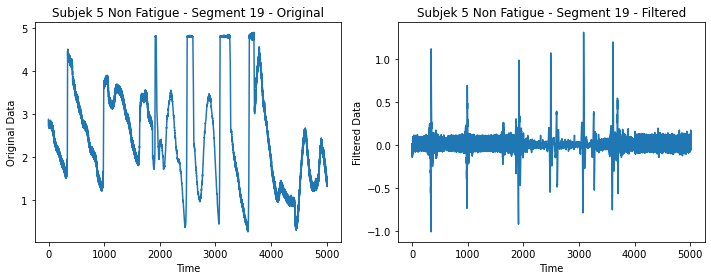

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


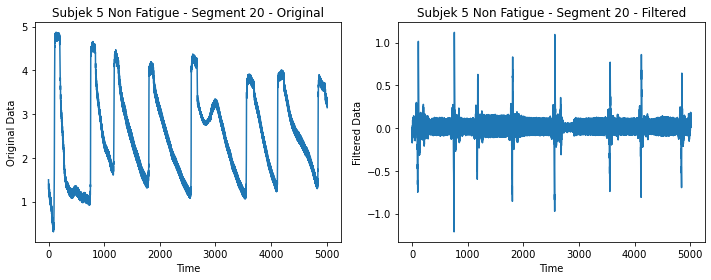

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


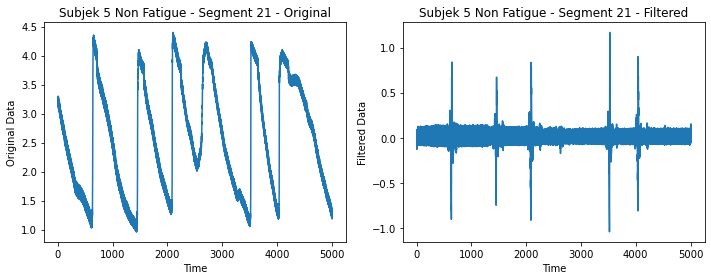

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


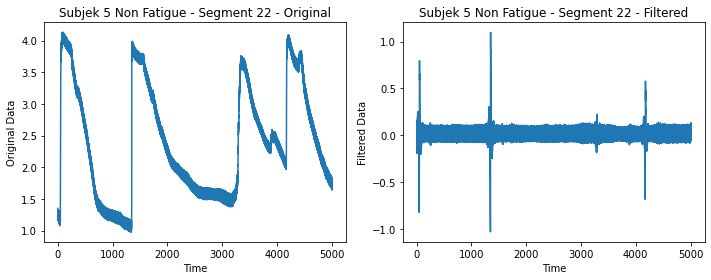

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


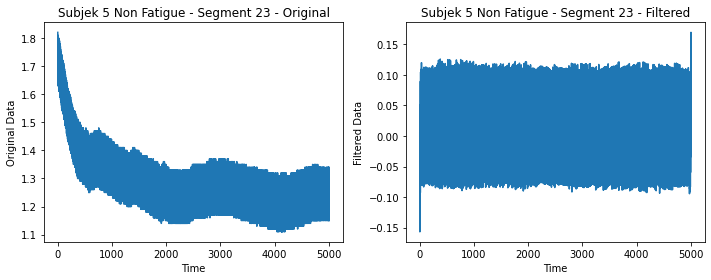

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


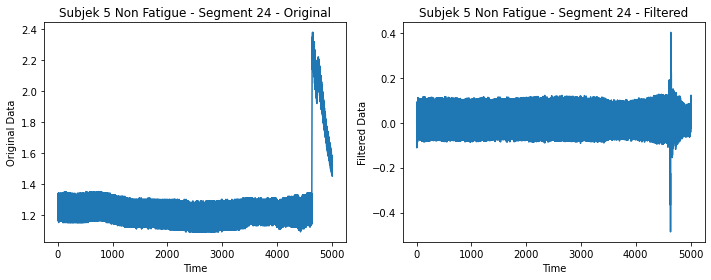

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


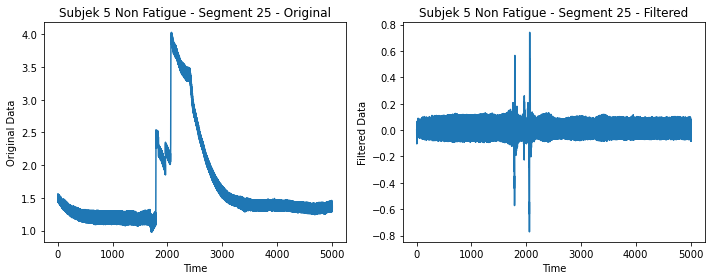

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


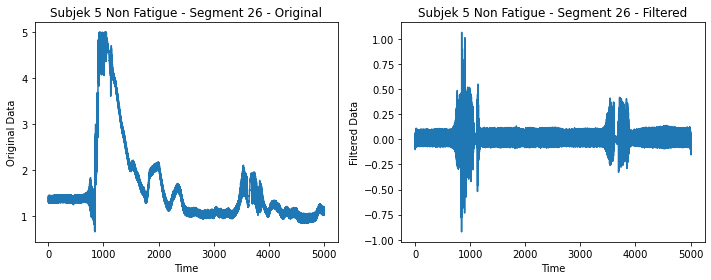

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


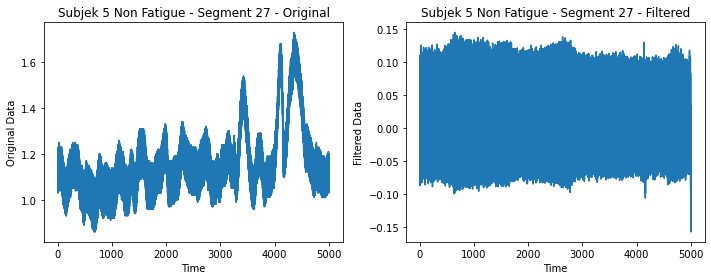

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


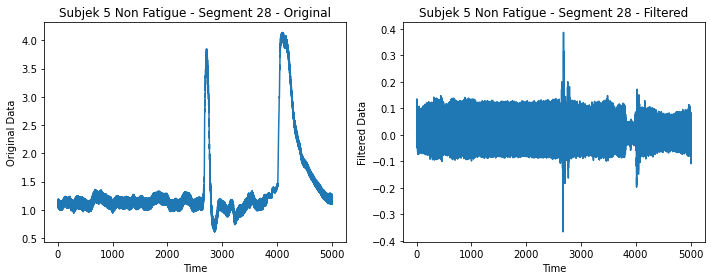

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


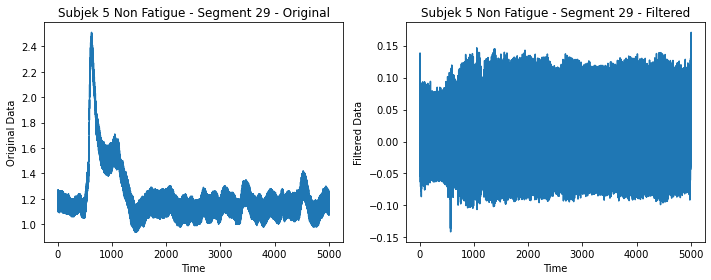

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


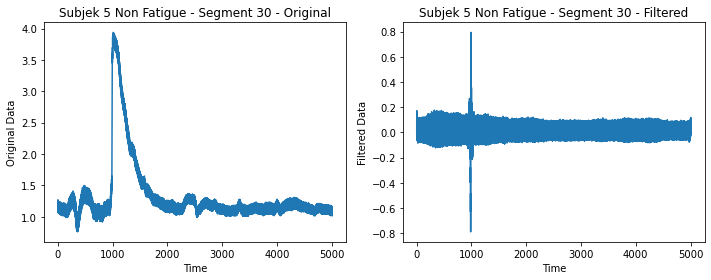

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


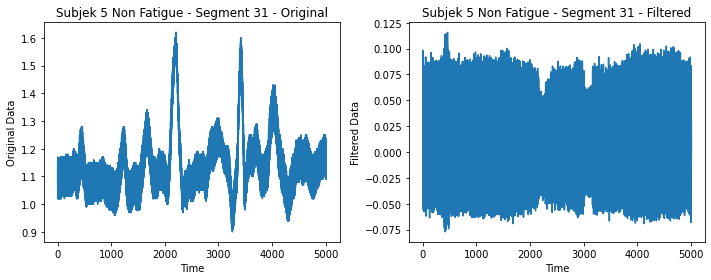

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


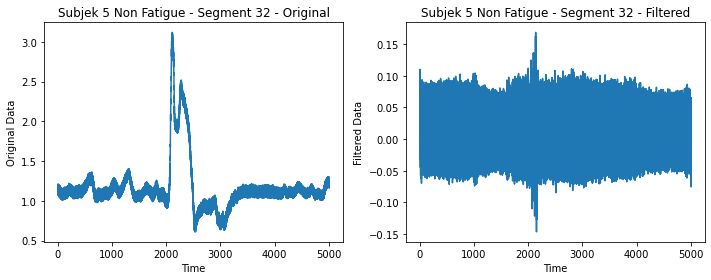

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


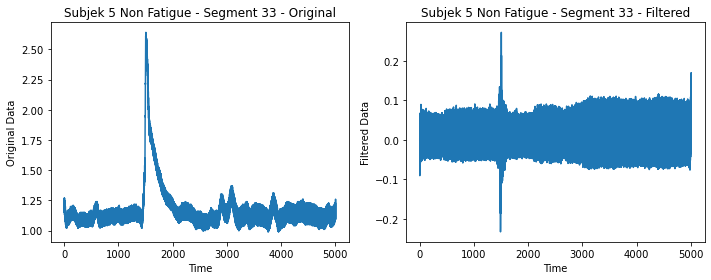

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


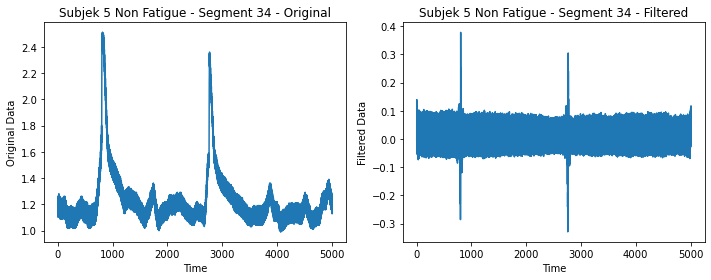

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


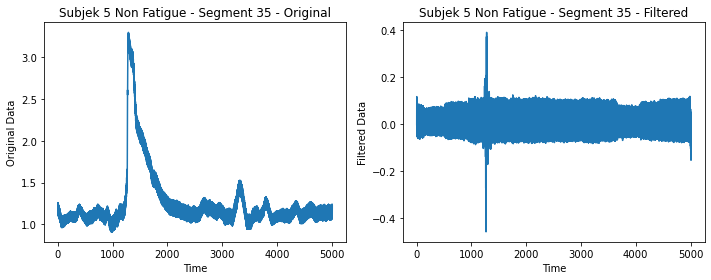

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2691351590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_non_filtered_data


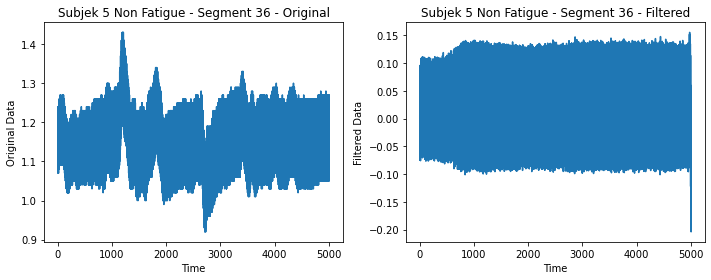

In [50]:
for i, segment_df in enumerate(segmented_dataframes_hk):
    data = segment_df['83'].values
    hk_non_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = hk_non_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 5 Non Fatigue - Segment {i+1} - Original')
    axs[1].plot(hk_non_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 5 Non Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

## Fatigue

### Feivel

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2352649843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = fv_filtered_data


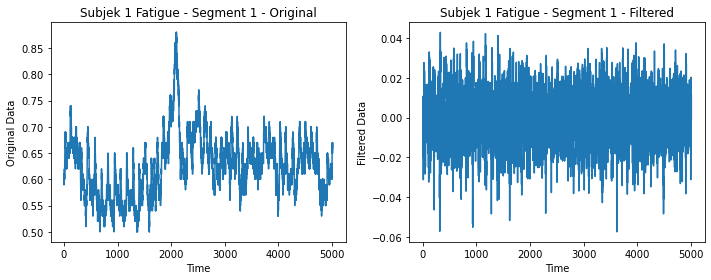

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2352649843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = fv_filtered_data


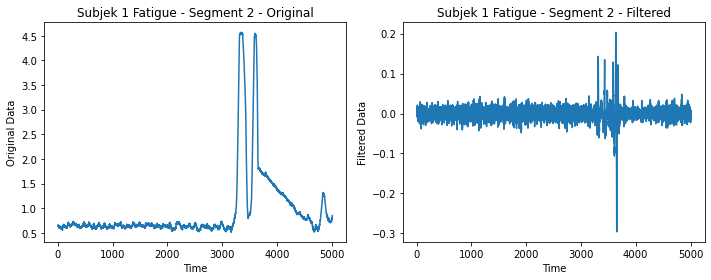

In [51]:
for i, segment_df in enumerate(segmented_dataframes_fv_fat):
    data = segment_df['1.36'].values
    fv_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = fv_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 1 Fatigue - Segment {i+1} - Original')
    axs[1].plot(fv_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 1 Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Kanwa

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


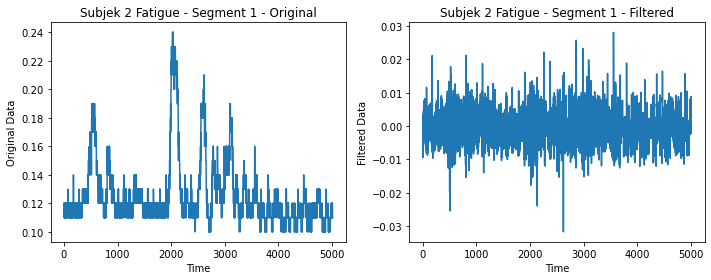

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


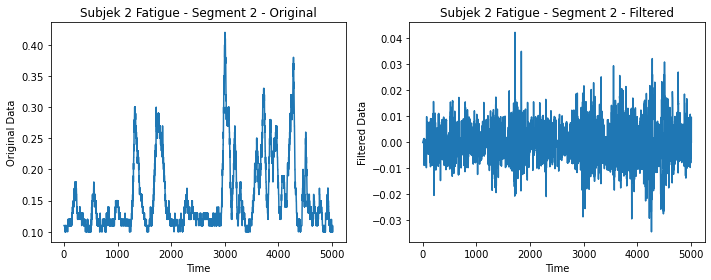

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


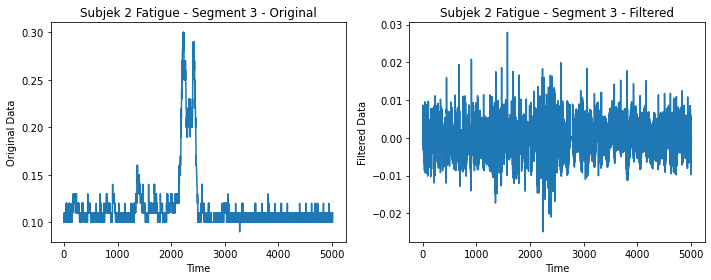

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


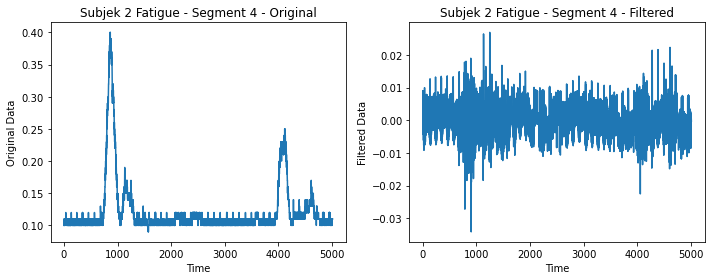

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


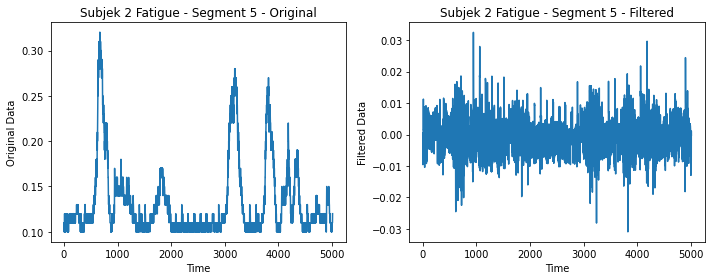

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


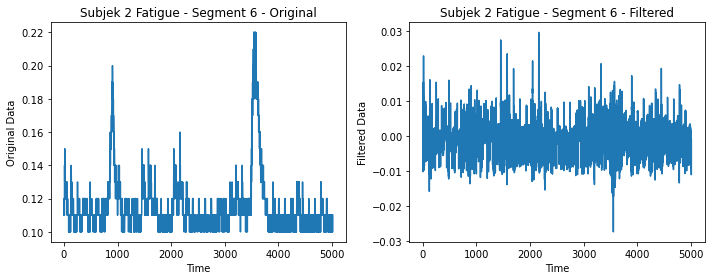

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


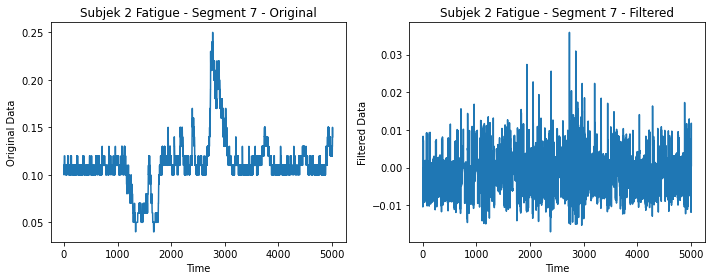

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\3796305556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = kn_filtered_data


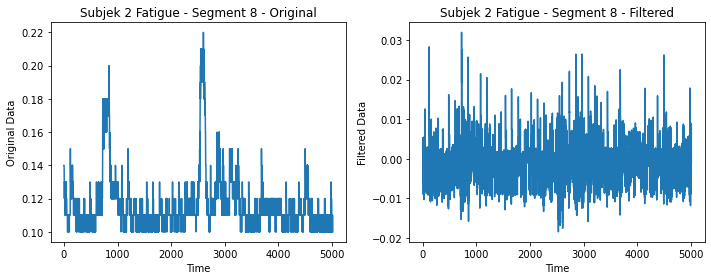

In [52]:
for i, segment_df in enumerate(segmented_dataframes_kn_fat):
    data = segment_df['0.20'].values
    kn_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = kn_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 2 Fatigue - Segment {i+1} - Original')
    axs[1].plot(kn_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 2 Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Denil

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


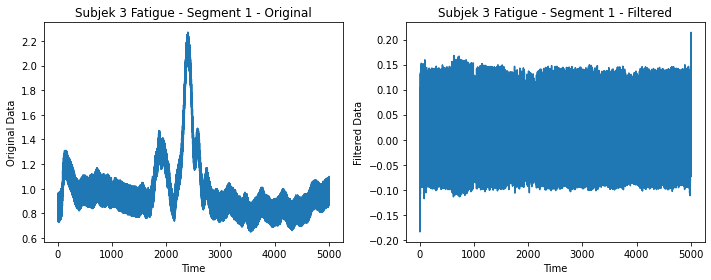

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


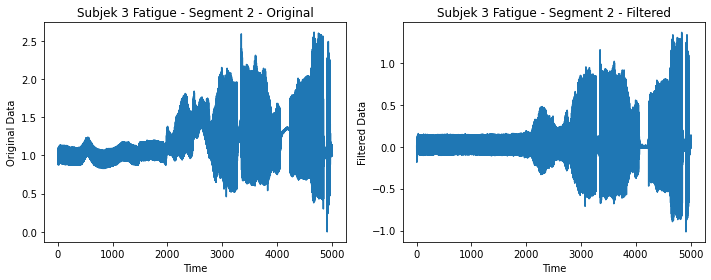

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


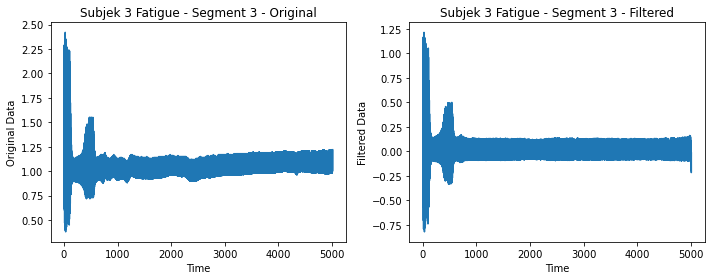

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


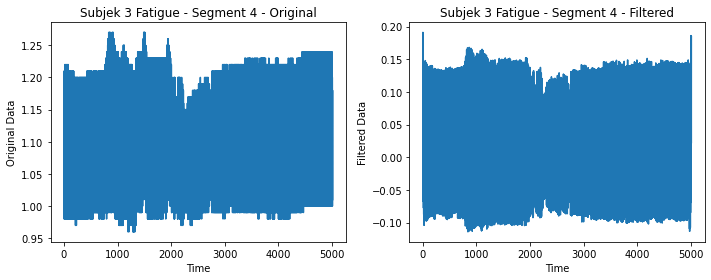

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


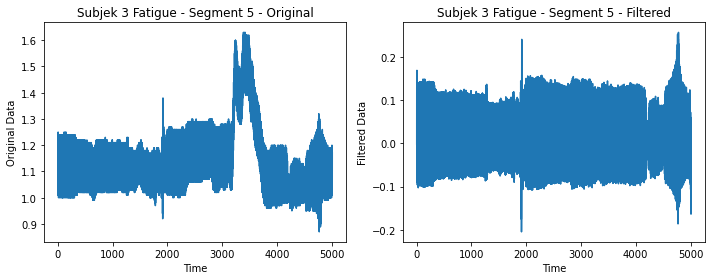

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


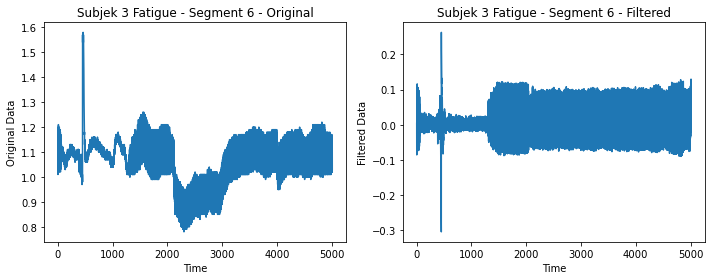

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


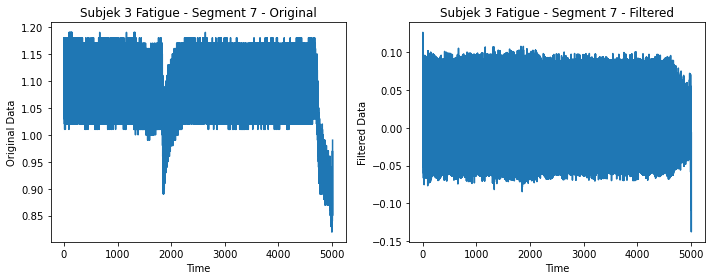

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


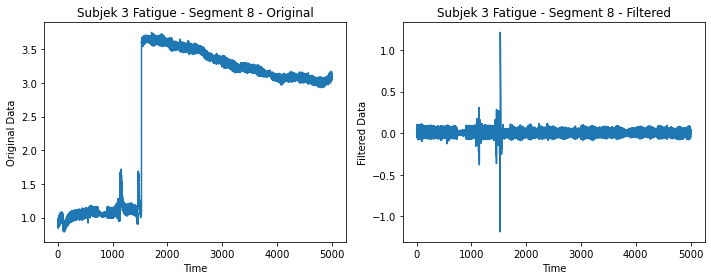

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


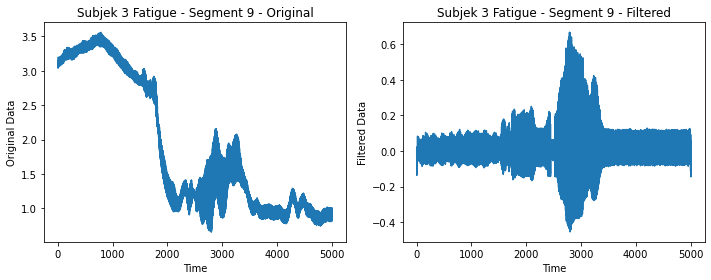

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


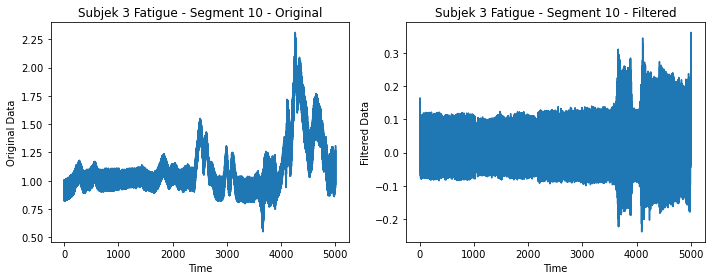

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


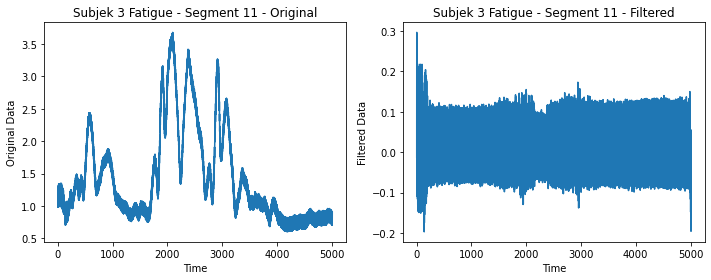

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


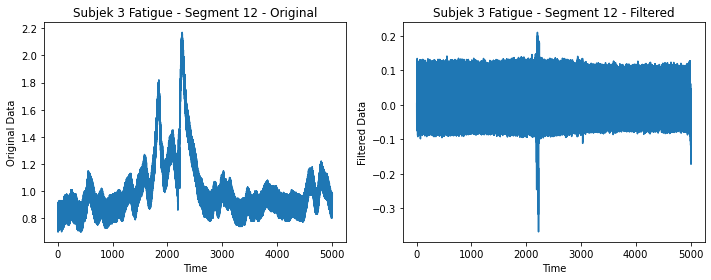

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


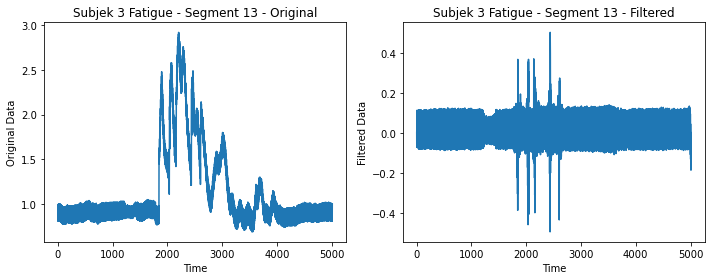

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


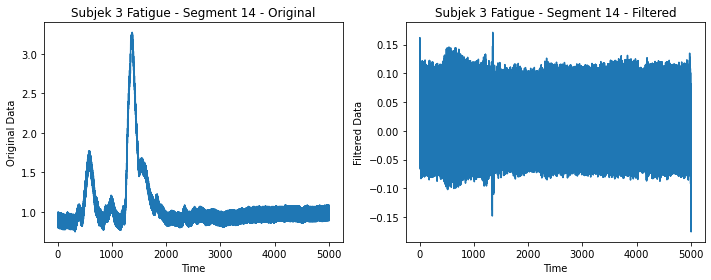

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


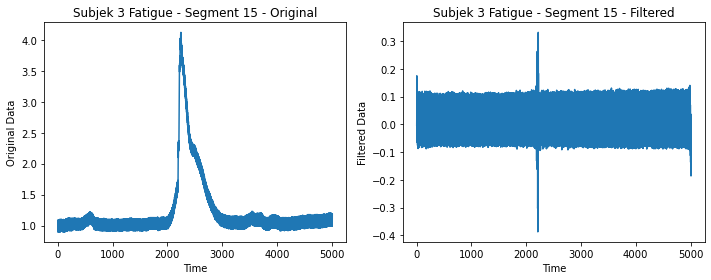

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


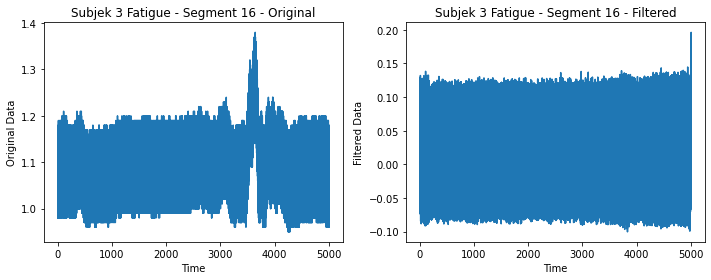

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\2136048722.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = dn_filtered_data


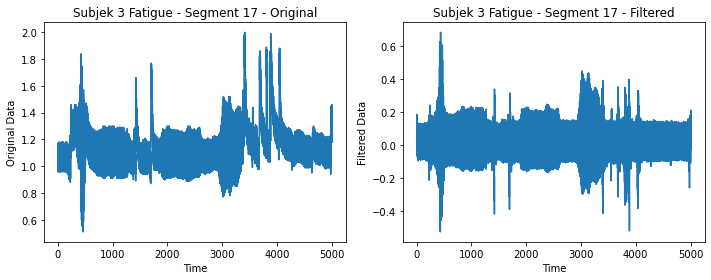

In [53]:
for i, segment_df in enumerate(segmented_dataframes_dn_fat):
    data = segment_df['9'].values
    dn_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = dn_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 3 Fatigue - Segment {i+1} - Original')
    axs[1].plot(dn_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 3 Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Nyu

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


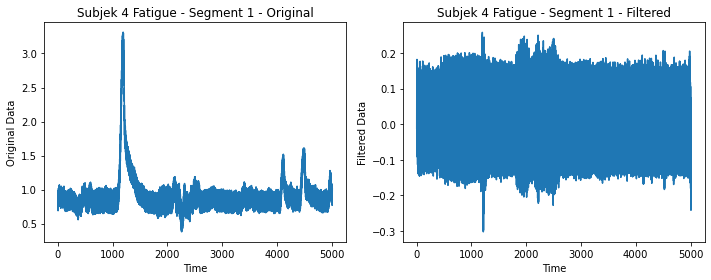

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


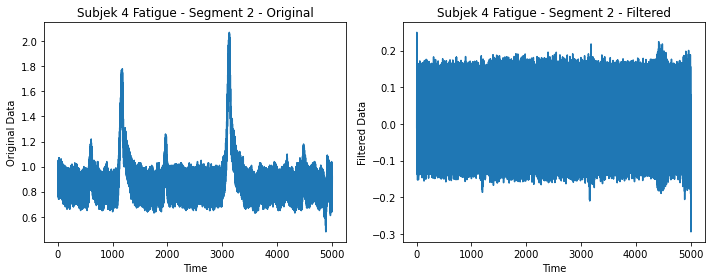

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


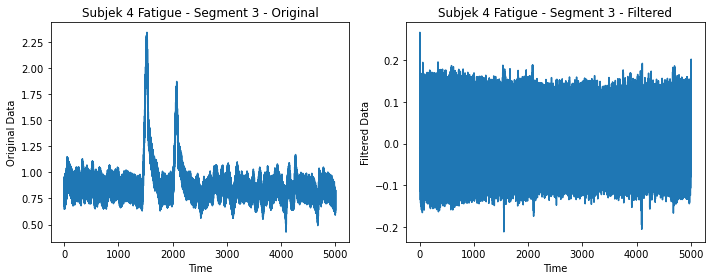

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


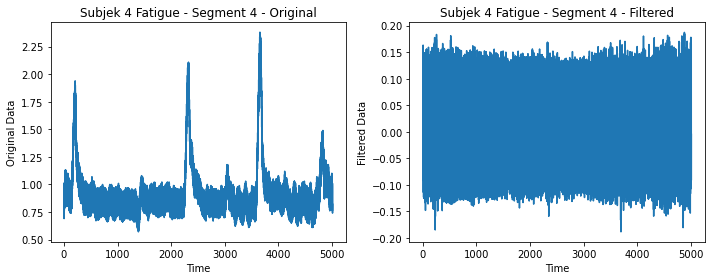

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


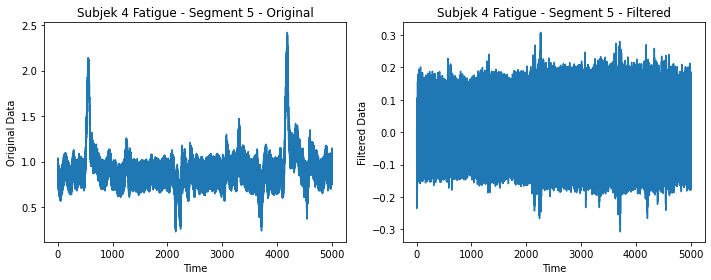

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


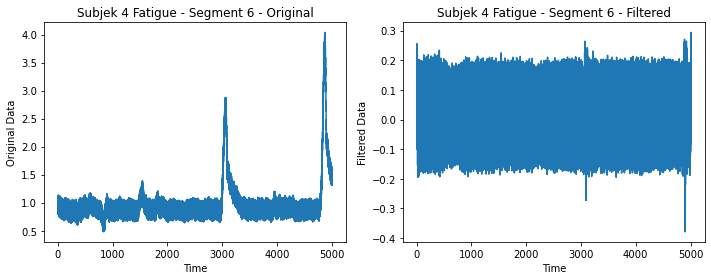

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


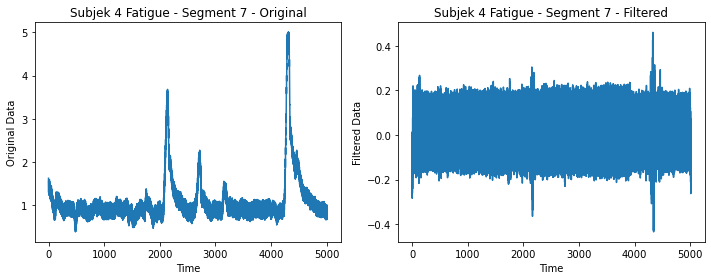

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


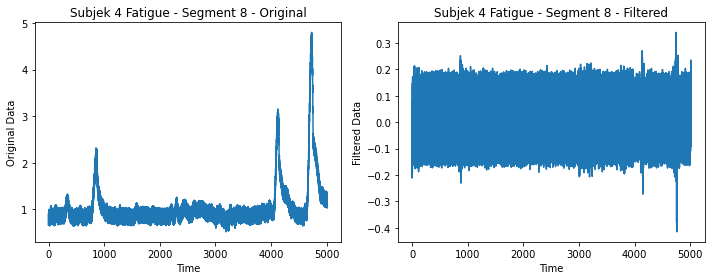

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


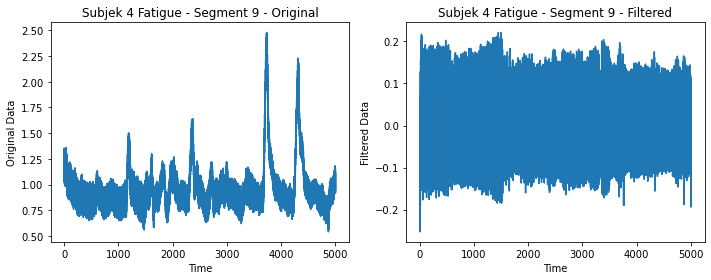

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


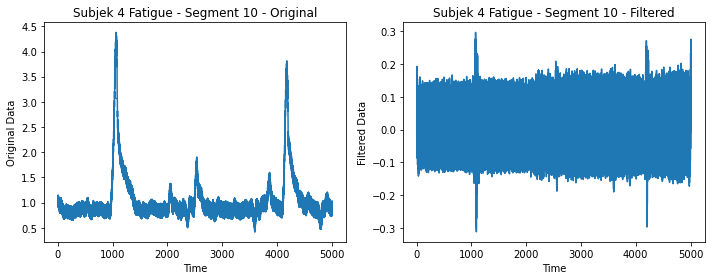

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


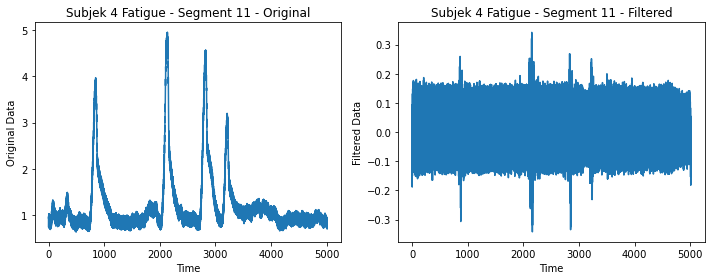

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


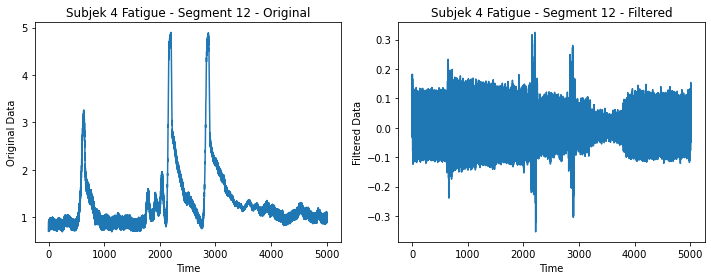

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\926861412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = ny_filtered_data


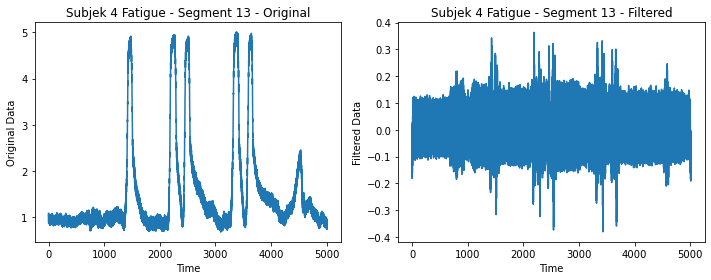

In [54]:
for i, segment_df in enumerate(segmented_dataframes_ny_fat):
    data = segment_df['0.84'].values
    ny_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = ny_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 4 Fatigue - Segment {i+1} - Original')
    axs[1].plot(ny_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 4 Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

### Hakim

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1743952068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_filtered_data


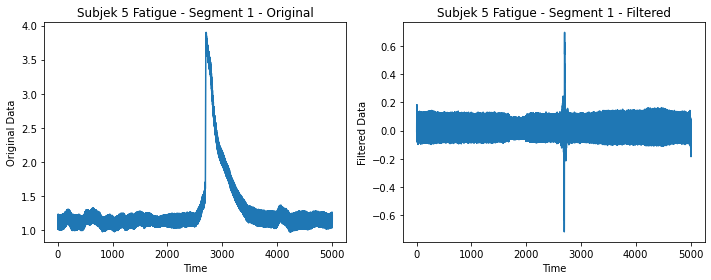

C:\Users\HP\AppData\Local\Temp\ipykernel_13476\1743952068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_df['data'] = hk_filtered_data


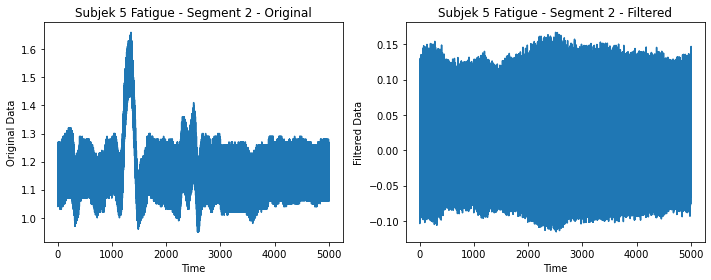

In [55]:
for i, segment_df in enumerate(segmented_dataframes_hk_fat):
    data = segment_df['83'].values
    hk_filtered_data = filtering(data, lowcut=20, highcut=499, fs=1000, order=4)
    segment_df['data'] = hk_filtered_data
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].plot(data)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Original Data')
    axs[0].set_title(f'Subjek 5 Fatigue - Segment {i+1} - Original')
    axs[1].plot(hk_filtered_data)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Filtered Data')
    axs[1].set_title(f'Subjek 5 Fatigue - Segment {i+1} - Filtered')
    plt.tight_layout()
    plt.show()

## Non-Fatigue

### Feivel

#### Frequency Series

In [56]:
win_size = 250
increment = 125

mnf_list_before_fv = []
mdf_list_before_fv = []
mnp_list_before_fv = []
ttp_list_before_fv = []


for i, segment_df in enumerate(segmented_dataframes_fv):
    fv_non_filtered_data = segment_df['1.36'].values
    
    mnf_segment_before_fv = []
    mdf_segment_before_fv = []
    mnp_segment_before_fv = []
    ttp_segment_before_fv = []

    num_windows = (len(fv_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = fv_non_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_before_fv.append(mnf)
        mdf_segment_before_fv.append(mdf)
        mnp_segment_before_fv.append(mnp)
        ttp_segment_before_fv.append(ttp)

    mnf_avg = np.mean(mnf_segment_before_fv)
    mdf_avg = np.mean(mdf_segment_before_fv)
    mnp_avg = np.mean(mnp_segment_before_fv)
    ttp_avg = np.mean(ttp_segment_before_fv)
    
    mnf_list_before_fv.append(mnf_avg)
    mdf_list_before_fv.append(mdf_avg)
    mnp_list_before_fv.append(mnp_avg)
    ttp_list_before_fv.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_before_fv)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_before_fv[i]}")
    print(f"MDF: {mdf_list_before_fv[i]}")
    print(f"Mean Power: {mnp_list_before_fv[i]}")
    print(f"Total Power: {ttp_list_before_fv[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_before_fv) + 1),
    'MNF': mnf_list_before_fv,
    'MDF': mdf_list_before_fv,
    'MNP': mnp_list_before_fv,
    'TTP': ttp_list_before_fv
}

# Create a DataFrame from the dictionary
fv_non_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
fv_non_f.set_index('Segment', inplace=True)

# Print the DataFrame
fv_non_f

Segment 1:
MNF: 6859.525449471966
MDF: 12.179487179487179
Mean Power: 0.00012208747732530238
Total Power: 3.0531719682823206e-05

Segment 2:
MNF: 6959.99141625442
MDF: 12.512820512820513
Mean Power: 0.00014775344466508425
Total Power: 3.695221296509498e-05

Segment 3:
MNF: 7087.188432648687
MDF: 11.692307692307692
Mean Power: 0.00017760967238166487
Total Power: 4.441580076990063e-05

Segment 4:
MNF: 7210.1085024791655
MDF: 10.846153846153847
Mean Power: 0.00032223104061261654
Total Power: 8.058295456551949e-05



MNF        MDF       MNP       TTP
Segment                                            
1        6859.525449  12.179487  0.000122  0.000031
2        6959.991416  12.512821  0.000148  0.000037
3        7087.188433  11.692308  0.000178  0.000044
4        7210.108502  10.846154  0.000322  0.000081

#### Times Series

In [57]:
win_size = 250
increment = 125

rms_list_before_fv = []
mav_list_before_fv = []
std_list_before_fv = []

for i, segment_df in enumerate(segmented_dataframes_fv):
    fv_non_filtered_data = segment_df['1.36'].values
    rms_segment_before_fv = []
    mav_segment_before_fv = []
    std_segment_before_fv = []

    num_windows = (len(fv_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = fv_non_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_before_fv.append(rms)
        mav_segment_before_fv.append(mav)
        std_segment_before_fv.append(std)

    rms_avg = np.mean(rms_segment_before_fv)
    mav_avg = np.mean(mav_segment_before_fv)
    std_avg = np.mean(std_segment_before_fv)
    
    rms_list_before_fv.append(rms_avg)
    mav_list_before_fv.append(mav_avg)
    std_list_before_fv.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_before_fv)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_before_fv[i]}")
    print(f"MAV: {mav_list_before_fv[i]}")
    print(f"STD: {std_list_before_fv[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_before_fv) + 1),
    'RMS': rms_list_before_fv,
    'MAV': mav_list_before_fv,
    'STD': std_list_before_fv,
}

# Create a DataFrame from the dictionary
fv_non_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
fv_non_t.set_index('Segment', inplace=True)

# Print the DataFrame
fv_non_t

Segment 1:
RMS: 0.010703952186295967
MAV: 0.008386871448932118
STD: 0.010700355128411004

Segment 2:
RMS: 0.011731889706776607
MAV: 0.00909343826470977
STD: 0.01172677739273832

Segment 3:
RMS: 0.013043048030898606
MAV: 0.010259723176684547
STD: 0.013038780917695347

Segment 4:
RMS: 0.017217617832559682
MAV: 0.013196990359886964
STD: 0.01721193603749466



RMS       MAV       STD
Segment                              
1        0.010704  0.008387  0.010700
2        0.011732  0.009093  0.011727
3        0.013043  0.010260  0.013039
4        0.017218  0.013197  0.017212

In [58]:
fv_non = pd.concat([fv_non_f, fv_non_t], axis=1)
fv_non

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        6859.525449  12.179487  0.000122  0.000031  0.010704  0.008387   
2        6959.991416  12.512821  0.000148  0.000037  0.011732  0.009093   
3        7087.188433  11.692308  0.000178  0.000044  0.013043  0.010260   
4        7210.108502  10.846154  0.000322  0.000081  0.017218  0.013197   

              STD  
Segment            
1        0.010700  
2        0.011727  
3        0.013039  
4        0.017212

### Kanwa

#### Frequency Series

In [59]:
win_size = 250
increment = 125

mnf_list_before_kn = []
mdf_list_before_kn = []
mnp_list_before_kn = []
ttp_list_before_kn = []

for i, segment_df in enumerate(segmented_dataframes_kn):
    kn_non_filtered_data = segment_df['0.20'].values
    mnf_segment_before_kn = []
    mdf_segment_before_kn = []
    mnp_segment_before_kn = []
    ttp_segment_before_kn = []

    num_windows = (len(kn_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = kn_non_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_before_kn.append(mnf)
        mdf_segment_before_kn.append(mdf)
        mnp_segment_before_kn.append(mnp)
        ttp_segment_before_kn.append(ttp)

    mnf_avg = np.mean(mnf_segment_before_kn)
    mdf_avg = np.mean(mdf_segment_before_kn)
    mnp_avg = np.mean(mnp_segment_before_kn)
    ttp_avg = np.mean(ttp_segment_before_kn)
    
    mnf_list_before_kn.append(mnf_avg)
    mdf_list_before_kn.append(mdf_avg)
    mnp_list_before_kn.append(mnp_avg)
    ttp_list_before_kn.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_before_kn)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_before_kn[i]}")
    print(f"MDF: {mdf_list_before_kn[i]}")
    print(f"Mean Power: {mnp_list_before_kn[i]}")
    print(f"Total Power: {ttp_list_before_kn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_before_kn) + 1),
    'MNF': mnf_list_before_kn,
    'MDF': mdf_list_before_kn,
    'MNP': mnp_list_before_kn,
    'TTP': ttp_list_before_kn
}

# Create a DataFrame from the dictionary
kn_non_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
kn_non_f.set_index('Segment', inplace=True)

# Print the DataFrame
kn_non_f

Segment 1:
MNF: 7453.203770255137
MDF: 3.358974358974359
Mean Power: 0.006546830244567723
Total Power: 0.0017818543634411054

Segment 2:
MNF: 7750.820011402628
MDF: 1.6153846153846154
Mean Power: 0.007700412581915356
Total Power: 0.002034864736611017

Segment 3:
MNF: 7663.826528968634
MDF: 2.1025641025641026
Mean Power: 0.0027761107716101395
Total Power: 0.0007363756300209037

Segment 4:
MNF: 7618.477019650854
MDF: 2.3076923076923075
Mean Power: 0.006549858587177522
Total Power: 0.0018000151148241006

Segment 5:
MNF: 7594.8199688820305
MDF: 2.128205128205128
Mean Power: 0.0008769220180548218
Total Power: 0.00022869393507590175

Segment 6:
MNF: 7392.30787104324
MDF: 2.9743589743589745
Mean Power: 0.0002600800585942818
Total Power: 6.6630394022878e-05

Segment 7:
MNF: 7689.908486073623
MDF: 1.6923076923076923
Mean Power: 0.0024791505945961183
Total Power: 0.000691953773006717

Segment 8:
MNF: 7506.0169443618015
MDF: 2.3333333333333335
Mean Power: 0.0005370178727802435
Total Power: 0.0001

MNF       MDF       MNP       TTP
Segment                                           
1        7453.203770  3.358974  0.006547  0.001782
2        7750.820011  1.615385  0.007700  0.002035
3        7663.826529  2.102564  0.002776  0.000736
4        7618.477020  2.307692  0.006550  0.001800
5        7594.819969  2.128205  0.000877  0.000229
6        7392.307871  2.974359  0.000260  0.000067
7        7689.908486  1.692308  0.002479  0.000692
8        7506.016944  2.333333  0.000537  0.000139
9        7378.321072  3.333333  0.000249  0.000065
10       7174.123936  6.025641  0.000249  0.000063
11       7674.261543  1.666667  0.002270  0.000614
12       7323.725126  4.589744  0.000720  0.000197
13       7686.299132  1.794872  0.004043  0.001101
14       7521.197714  2.230769  0.000271  0.000071

#### Time Series

In [60]:
win_size = 250
increment = 125

rms_list_before_kn = []
mav_list_before_kn = []
std_list_before_kn = []

for i, segment_df in enumerate(segmented_dataframes_kn):
    kn_non_filtered_data = segment_df['0.20'].values
    rms_segment_before_kn = []
    mav_segment_before_kn = []
    std_segment_before_kn = []

    num_windows = (len(kn_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = kn_non_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_before_kn.append(rms)
        mav_segment_before_kn.append(mav)
        std_segment_before_kn.append(std)

    rms_avg = np.mean(rms_segment_before_kn)
    mav_avg = np.mean(mav_segment_before_kn)
    std_avg = np.mean(std_segment_before_kn)
    
    rms_list_before_kn.append(rms_avg)
    mav_list_before_kn.append(mav_avg)
    std_list_before_kn.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_before_kn)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_before_kn[i]}")
    print(f"MAV: {mav_list_before_kn[i]}")
    print(f"STD: {std_list_before_kn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_before_kn) + 1),
    'RMS': rms_list_before_kn,
    'MAV': mav_list_before_kn,
    'STD': std_list_before_kn,
}

# Create a DataFrame from the dictionary
kn_non_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
kn_non_t.set_index('Segment', inplace=True)

# Print the DataFrame
kn_non_t

Segment 1:
RMS: 0.2161286308021944
MAV: 0.2010092307692308
STD: 0.06336486985268579

Segment 2:
RMS: 0.2104345218247745
MAV: 0.18917128205128206
STD: 0.0853643321112274

Segment 3:
RMS: 0.17683336125396226
MAV: 0.1676882051282051
STD: 0.050204959750425236

Segment 4:
RMS: 0.18698600939396645
MAV: 0.1745569230769231
STD: 0.05433277178966101

Segment 5:
RMS: 0.1835542110812481
MAV: 0.1808430769230769
STD: 0.02883297381256948

Segment 6:
RMS: 0.12478928158204286
MAV: 0.12349128205128203
STD: 0.01652783074881485

Segment 7:
RMS: 0.15188399015310056
MAV: 0.14456000000000005
STD: 0.041244977622541534

Segment 8:
RMS: 0.12662040848421735
MAV: 0.1243548717948718
STD: 0.020646680841867056

Segment 9:
RMS: 0.11878001721198238
MAV: 0.11769641025641028
STD: 0.014926963143706016

Segment 10:
RMS: 0.11790809604718444
MAV: 0.11691179487179489
STD: 0.013011301673804017

Segment 11:
RMS: 0.1604898627949578
MAV: 0.15336717948717948
STD: 0.04230154197494727

Segment 12:
RMS: 0.1330010529214892
MAV: 0.130

RMS       MAV       STD
Segment                              
1        0.216129  0.201009  0.063365
2        0.210435  0.189171  0.085364
3        0.176833  0.167688  0.050205
4        0.186986  0.174557  0.054333
5        0.183554  0.180843  0.028833
6        0.124789  0.123491  0.016528
7        0.151884  0.144560  0.041245
8        0.126620  0.124355  0.020647
9        0.118780  0.117696  0.014927
10       0.117908  0.116912  0.013011
11       0.160490  0.153367  0.042302
12       0.133001  0.130389  0.021055
13       0.183081  0.173484  0.052149
14       0.113438  0.112054  0.016409

In [61]:
kn_non = pd.concat([kn_non_f, kn_non_t], axis=1)
kn_non

MNF       MDF       MNP       TTP       RMS       MAV  \
Segment                                                                  
1        7453.203770  3.358974  0.006547  0.001782  0.216129  0.201009   
2        7750.820011  1.615385  0.007700  0.002035  0.210435  0.189171   
3        7663.826529  2.102564  0.002776  0.000736  0.176833  0.167688   
4        7618.477020  2.307692  0.006550  0.001800  0.186986  0.174557   
5        7594.819969  2.128205  0.000877  0.000229  0.183554  0.180843   
6        7392.307871  2.974359  0.000260  0.000067  0.124789  0.123491   
7        7689.908486  1.692308  0.002479  0.000692  0.151884  0.144560   
8        7506.016944  2.333333  0.000537  0.000139  0.126620  0.124355   
9        7378.321072  3.333333  0.000249  0.000065  0.118780  0.117696   
10       7174.123936  6.025641  0.000249  0.000063  0.117908  0.116912   
11       7674.261543  1.666667  0.002270  0.000614  0.160490  0.153367   
12       7323.725126  4.589744  0.000720  0.000197  0.133001  0.130389   
13       7686.299132  1.794872  0.004043  0.001101  0.183081  0.173484   
14       7521.197714  2.230769  0.000271  0.000071  0.113438  0.112054   

              STD  
Segment            
1        0.063365  
2        0.085364  
3        0.050205  
4        0.054333  
5        0.028833  
6        0.016528  
7        0.041245  
8        0.020647  
9        0.014927  
10       0.013011  
11       0.042302  
12       0.021055  
13       0.052149  
14       0.016409

### Denil

#### Frequency Series

In [62]:
win_size = 250
increment = 125

mnf_list_before_dn = []
mdf_list_before_dn = []
mnp_list_before_dn = []
ttp_list_before_dn = []

for i, segment_df in enumerate(segmented_dataframes_dn):
    dn_non_filtered_data = segment_df['9'].values
    mnf_segment_before_dn = []
    mdf_segment_before_dn = []
    mnp_segment_before_dn = []
    ttp_segment_before_dn = []

    num_windows = (len(dn_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = dn_non_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_before_dn.append(mnf)
        mdf_segment_before_dn.append(mdf)
        mnp_segment_before_dn.append(mnp)
        ttp_segment_before_dn.append(ttp)

    mnf_avg = np.mean(mnf_segment_before_dn)
    mdf_avg = np.mean(mdf_segment_before_dn)
    mnp_avg = np.mean(mnp_segment_before_dn)
    ttp_avg = np.mean(ttp_segment_before_dn)
    
    mnf_list_before_dn.append(mnf_avg)
    mdf_list_before_dn.append(mdf_avg)
    mnp_list_before_dn.append(mnp_avg)
    ttp_list_before_dn.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_before_dn)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_before_dn[i]}")
    print(f"MDF: {mdf_list_before_dn[i]}")
    print(f"Mean Power: {mnp_list_before_dn[i]}")
    print(f"Total Power: {ttp_list_before_dn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_before_dn) + 1),
    'MNF': mnf_list_before_dn,
    'MDF': mdf_list_before_dn,
    'MNP': mnp_list_before_dn,
    'TTP': ttp_list_before_dn
}

# Create a DataFrame from the dictionary
dn_non_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
dn_non_f.set_index('Segment', inplace=True)

# Print the DataFrame
dn_non_f

Segment 1:
MNF: 6825.94485364613
MDF: 22.923076923076923
Mean Power: 0.02263694936514245
Total Power: 0.005869745315487501

Segment 2:
MNF: 7279.728021970514
MDF: 12.897435897435898
Mean Power: 0.24612540760982277
Total Power: 0.06641733101200482

Segment 3:
MNF: 6541.772574944285
MDF: 34.69230769230769
Mean Power: 0.13692171032286046
Total Power: 0.03574497596012641

Segment 4:
MNF: 6675.10187645507
MDF: 26.743589743589745
Mean Power: 0.1127065003321133
Total Power: 0.030500293884399923

Segment 5:
MNF: 7166.159762233161
MDF: 16.897435897435898
Mean Power: 0.22068527409026864
Total Power: 0.05951766539378818

Segment 6:
MNF: 7799.302284542855
MDF: 1.1794871794871795
Mean Power: 0.4146141254586989
Total Power: 0.11002894659983635

Segment 7:
MNF: 7345.017454845526
MDF: 11.153846153846153
Mean Power: 0.19003053860893981
Total Power: 0.050628506056311466

Segment 8:
MNF: 6156.491888086054
MDF: 46.43589743589744
Mean Power: 0.214443082525731
Total Power: 0.0566982020152771

Segment 9:
MNF

MNF        MDF       MNP       TTP
Segment                                            
1        6825.944854  22.923077  0.022637  0.005870
2        7279.728022  12.897436  0.246125  0.066417
3        6541.772575  34.692308  0.136922  0.035745
4        6675.101876  26.743590  0.112707  0.030500
5        7166.159762  16.897436  0.220685  0.059518
6        7799.302285   1.179487  0.414614  0.110029
7        7345.017455  11.153846  0.190031  0.050629
8        6156.491888  46.435897  0.214443  0.056698
9        6365.309688  38.564103  0.185214  0.049869
10       5184.042456  74.051282  0.014442  0.003644

#### Time Series

In [63]:
win_size = 250
increment = 125

rms_list_before_dn = []
mav_list_before_dn = []
std_list_before_dn = []

for i, segment_df in enumerate(segmented_dataframes_dn):
    dn_non_filtered_data = segment_df['9'].values
    rms_segment_before_dn = []
    mav_segment_before_dn = []
    std_segment_before_dn = []

    num_windows = (len(dn_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = dn_non_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_before_dn.append(rms)
        mav_segment_before_dn.append(mav)
        std_segment_before_dn.append(std)

    rms_avg = np.mean(rms_segment_before_dn)
    mav_avg = np.mean(mav_segment_before_dn)
    std_avg = np.mean(std_segment_before_dn)
    
    rms_list_before_dn.append(rms_avg)
    mav_list_before_dn.append(mav_avg)
    std_list_before_dn.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_before_dn)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_before_dn[i]}")
    print(f"MAV: {mav_list_before_dn[i]}")
    print(f"STD: {std_list_before_dn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_before_dn) + 1),
    'RMS': rms_list_before_dn,
    'MAV': mav_list_before_dn,
    'STD': std_list_before_dn,
}

# Create a DataFrame from the dictionary
dn_non_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
dn_non_t.set_index('Segment', inplace=True)

# Print the DataFrame
dn_non_t

Segment 1:
RMS: 1.1524328564812951
MAV: 1.1405977435897436
STD: 0.12509300422916658

Segment 2:
RMS: 1.756160009255476
MAV: 1.6660441025641024
STD: 0.4743129487192917

Segment 3:
RMS: 1.1199580966591456
MAV: 1.0717517948717947
STD: 0.26579552424974895

Segment 4:
RMS: 1.1167724968589066
MAV: 1.0691938461538462
STD: 0.252856384083676

Segment 5:
RMS: 1.7363231584373022
MAV: 1.650114871794872
STD: 0.45168326249666496

Segment 6:
RMS: 2.1495652469005
MAV: 2.02068
STD: 0.6611410870567092

Segment 7:
RMS: 1.2766022996087358
MAV: 1.1993117948717946
STD: 0.3822343397276619

Segment 8:
RMS: 2.8032651740422696
MAV: 2.7248964102564095
STD: 0.34786685101659093

Segment 9:
RMS: 1.122301408545323
MAV: 1.0464933333333333
STD: 0.3570768455129031

Segment 10:
RMS: 0.9429771727446273
MAV: 0.9346153846153847
STD: 0.11580289282142688



RMS       MAV       STD
Segment                              
1        1.152433  1.140598  0.125093
2        1.756160  1.666044  0.474313
3        1.119958  1.071752  0.265796
4        1.116772  1.069194  0.252856
5        1.736323  1.650115  0.451683
6        2.149565  2.020680  0.661141
7        1.276602  1.199312  0.382234
8        2.803265  2.724896  0.347867
9        1.122301  1.046493  0.357077
10       0.942977  0.934615  0.115803

In [64]:
dn_non = pd.concat([dn_non_f, dn_non_t], axis=1)
dn_non

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        6825.944854  22.923077  0.022637  0.005870  1.152433  1.140598   
2        7279.728022  12.897436  0.246125  0.066417  1.756160  1.666044   
3        6541.772575  34.692308  0.136922  0.035745  1.119958  1.071752   
4        6675.101876  26.743590  0.112707  0.030500  1.116772  1.069194   
5        7166.159762  16.897436  0.220685  0.059518  1.736323  1.650115   
6        7799.302285   1.179487  0.414614  0.110029  2.149565  2.020680   
7        7345.017455  11.153846  0.190031  0.050629  1.276602  1.199312   
8        6156.491888  46.435897  0.214443  0.056698  2.803265  2.724896   
9        6365.309688  38.564103  0.185214  0.049869  1.122301  1.046493   
10       5184.042456  74.051282  0.014442  0.003644  0.942977  0.934615   

              STD  
Segment            
1        0.125093  
2        0.474313  
3        0.265796  
4        0.252856  
5        0.451683  
6        0.661141  
7        0.382234  
8        0.347867  
9        0.357077  
10       0.115803

### Nyu

#### Frequency Series

In [65]:
win_size = 250
increment = 125

mnf_list_before_ny = []
mdf_list_before_ny = []
mnp_list_before_ny = []
ttp_list_before_ny = []

for i, segment_df in enumerate(segmented_dataframes_ny):
    ny_non_filtered_data = segment_df['0.84'].values
    mnf_segment_before_ny = []
    mdf_segment_before_ny = []
    mnp_segment_before_ny = []
    ttp_segment_before_ny = []

    num_windows = (len(ny_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = ny_non_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_before_ny.append(mnf)
        mdf_segment_before_ny.append(mdf)
        mnp_segment_before_ny.append(mnp)
        ttp_segment_before_ny.append(ttp)

    mnf_avg = np.mean(mnf_segment_before_ny)
    mdf_avg = np.mean(mdf_segment_before_ny)
    mnp_avg = np.mean(mnp_segment_before_ny)
    ttp_avg = np.mean(ttp_segment_before_ny)
    
    mnf_list_before_ny.append(mnf_avg)
    mdf_list_before_ny.append(mdf_avg)
    mnp_list_before_ny.append(mnp_avg)
    ttp_list_before_ny.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_before_ny)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_before_ny[i]}")
    print(f"MDF: {mdf_list_before_ny[i]}")
    print(f"Mean Power: {mnp_list_before_ny[i]}")
    print(f"Total Power: {ttp_list_before_ny[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_before_ny) + 1),
    'MNF': mnf_list_before_ny,
    'MDF': mdf_list_before_ny,
    'MNP': mnp_list_before_ny,
    'TTP': ttp_list_before_ny
}

# Create a DataFrame from the dictionary
ny_non_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
ny_non_f.set_index('Segment', inplace=True)

# Print the DataFrame
ny_non_f

Segment 1:
MNF: 5323.60804637214
MDF: 68.41025641025641
Mean Power: 0.010615148381015856
Total Power: 0.0026871817889532433

Segment 2:
MNF: 4949.164077433407
MDF: 78.0
Mean Power: 0.016316327280502748
Total Power: 0.004084070775393404

Segment 3:
MNF: 5812.036233578278
MDF: 58.64102564102564
Mean Power: 0.00655100487653139
Total Power: 0.0016742941948252666

Segment 4:
MNF: 5586.565136382564
MDF: 70.23076923076923
Mean Power: 0.010114493701012538
Total Power: 0.0025641134944883

Segment 5:
MNF: 5875.6414252363475
MDF: 56.48717948717949
Mean Power: 0.026307898010028658
Total Power: 0.006892007808685037

Segment 6:
MNF: 4928.882297691121
MDF: 78.0
Mean Power: 0.011797945453735617
Total Power: 0.002951541647459202

Segment 7:
MNF: 5346.9346554652
MDF: 66.28205128205128
Mean Power: 0.01748552803462119
Total Power: 0.004423441455477764

Segment 8:
MNF: 5296.413902393568
MDF: 70.12820512820512
Mean Power: 0.02099663864521881
Total Power: 0.005324477390683042

Segment 9:
MNF: 5350.1567650718

MNF        MDF       MNP       TTP
Segment                                            
1        5323.608046  68.410256  0.010615  0.002687
2        4949.164077  78.000000  0.016316  0.004084
3        5812.036234  58.641026  0.006551  0.001674
4        5586.565136  70.230769  0.010114  0.002564
5        5875.641425  56.487179  0.026308  0.006892
6        4928.882298  78.000000  0.011798  0.002952
7        5346.934655  66.282051  0.017486  0.004423
8        5296.413902  70.128205  0.020997  0.005324
9        5350.156765  74.205128  0.015312  0.003867
10       4961.342147  78.000000  0.013814  0.003457
11       5967.002133  50.769231  0.018103  0.004661
12       5393.653055  74.025641  0.019540  0.004936
13       5388.199713  68.487179  0.020528  0.005228
14       4970.624641  78.000000  0.019715  0.004938
15       5037.875714  78.000000  0.023814  0.005973
16       4908.561273  78.000000  0.019509  0.004879
17       4939.819289  78.000000  0.020569  0.005145
18       5027.035207  78.000000  0.025258  0.006329
19       5014.099525  78.000000  0.015408  0.003861
20       4972.496077  78.000000  0.011943  0.002988
21       4925.809168  78.000000  0.020171  0.005048
22       5487.203771  70.256410  0.023227  0.005852
23       5535.093580  70.256410  0.019595  0.004986
24       5165.704291  74.051282  0.017650  0.004437
25       5270.216486  70.538462  0.010441  0.002620
26       5877.356977  56.435897  0.126443  0.033753

#### TimeSeries

In [66]:
win_size = 250
increment = 125

rms_list_before_ny = []
mav_list_before_ny = []
std_list_before_ny = []

for i, segment_df in enumerate(segmented_dataframes_ny):
    ny_non_filtered_data = segment_df['0.84'].values
    rms_segment_before_ny = []
    mav_segment_before_ny = []
    std_segment_before_ny = []

    num_windows = (len(ny_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = ny_non_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_before_ny.append(rms)
        mav_segment_before_ny.append(mav)
        std_segment_before_ny.append(std)

    rms_avg = np.mean(rms_segment_before_ny)
    mav_avg = np.mean(mav_segment_before_ny)
    std_avg = np.mean(std_segment_before_ny)
    
    rms_list_before_ny.append(rms_avg)
    mav_list_before_ny.append(mav_avg)
    std_list_before_ny.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_before_ny)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_before_ny[i]}")
    print(f"MAV: {mav_list_before_ny[i]}")
    print(f"STD: {std_list_before_ny[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_before_ny) + 1),
    'RMS': rms_list_before_ny,
    'MAV': mav_list_before_ny,
    'STD': std_list_before_ny,
}

# Create a DataFrame from the dictionary
ny_non_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
ny_non_t.set_index('Segment', inplace=True)

# Print the DataFrame
ny_non_t

Segment 1:
RMS: 0.8386342235055477
MAV: 0.8316664615384614
STD: 0.10246429085187676

Segment 2:
RMS: 0.8714410298904752
MAV: 0.8619579487179485
STD: 0.1277996081472704

Segment 3:
RMS: 0.798792589009014
MAV: 0.7943682051282052
STD: 0.08141530884481697

Segment 4:
RMS: 0.8218247732699865
MAV: 0.8152461538461538
STD: 0.10185181893346092

Segment 5:
RMS: 0.863173195912158
MAV: 0.846974358974359
STD: 0.15720860432330294

Segment 6:
RMS: 0.8373663140030877
MAV: 0.8302830769230769
STD: 0.10860325549740416

Segment 7:
RMS: 0.8405758841209561
MAV: 0.8302030769230768
STD: 0.12741515555352242

Segment 8:
RMS: 0.8710575414746637
MAV: 0.8590102564102563
STD: 0.13799159317717893

Segment 9:
RMS: 0.8584007058213998
MAV: 0.849185641025641
STD: 0.12369477388458183

Segment 10:
RMS: 0.8663481367884748
MAV: 0.8583046153846152
STD: 0.11773862996599636

Segment 11:
RMS: 0.8871380416128176
MAV: 0.8761394871794872
STD: 0.1334290149851686

Segment 12:
RMS: 0.8914673544563175
MAV: 0.8799620512820514
STD: 0.14

RMS       MAV       STD
Segment                              
1        0.838634  0.831666  0.102464
2        0.871441  0.861958  0.127800
3        0.798793  0.794368  0.081415
4        0.821825  0.815246  0.101852
5        0.863173  0.846974  0.157209
6        0.837366  0.830283  0.108603
7        0.840576  0.830203  0.127415
8        0.871058  0.859010  0.137992
9        0.858401  0.849186  0.123695
10       0.866348  0.858305  0.117739
11       0.887138  0.876139  0.133429
12       0.891467  0.879962  0.140297
13       0.902378  0.890179  0.144472
14       0.903631  0.892674  0.136432
15       0.906702  0.893429  0.151146
16       0.876451  0.865262  0.138242
17       0.857657  0.845550  0.141223
18       0.850631  0.835566  0.158287
19       0.843232  0.834016  0.123528
20       0.837471  0.830279  0.109347
21       0.843602  0.831637  0.141294
22       0.846448  0.831966  0.151264
23       0.839688  0.827329  0.141508
24       0.847823  0.837068  0.132455
25       0.838831  0.832426  0.101261
26       1.075918  1.030728  0.250618

In [67]:
ny_non = pd.concat([ny_non_f, ny_non_t], axis=1)
ny_non

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        5323.608046  68.410256  0.010615  0.002687  0.838634  0.831666   
2        4949.164077  78.000000  0.016316  0.004084  0.871441  0.861958   
3        5812.036234  58.641026  0.006551  0.001674  0.798793  0.794368   
4        5586.565136  70.230769  0.010114  0.002564  0.821825  0.815246   
5        5875.641425  56.487179  0.026308  0.006892  0.863173  0.846974   
6        4928.882298  78.000000  0.011798  0.002952  0.837366  0.830283   
7        5346.934655  66.282051  0.017486  0.004423  0.840576  0.830203   
8        5296.413902  70.128205  0.020997  0.005324  0.871058  0.859010   
9        5350.156765  74.205128  0.015312  0.003867  0.858401  0.849186   
10       4961.342147  78.000000  0.013814  0.003457  0.866348  0.858305   
11       5967.002133  50.769231  0.018103  0.004661  0.887138  0.876139   
12       5393.653055  74.025641  0.019540  0.004936  0.891467  0.879962   
13       5388.199713  68.487179  0.020528  0.005228  0.902378  0.890179   
14       4970.624641  78.000000  0.019715  0.004938  0.903631  0.892674   
15       5037.875714  78.000000  0.023814  0.005973  0.906702  0.893429   
16       4908.561273  78.000000  0.019509  0.004879  0.876451  0.865262   
17       4939.819289  78.000000  0.020569  0.005145  0.857657  0.845550   
18       5027.035207  78.000000  0.025258  0.006329  0.850631  0.835566   
19       5014.099525  78.000000  0.015408  0.003861  0.843232  0.834016   
20       4972.496077  78.000000  0.011943  0.002988  0.837471  0.830279   
21       4925.809168  78.000000  0.020171  0.005048  0.843602  0.831637   
22       5487.203771  70.256410  0.023227  0.005852  0.846448  0.831966   
23       5535.093580  70.256410  0.019595  0.004986  0.839688  0.827329   
24       5165.704291  74.051282  0.017650  0.004437  0.847823  0.837068   
25       5270.216486  70.538462  0.010441  0.002620  0.838831  0.832426   
26       5877.356977  56.435897  0.126443  0.033753  1.075918  1.030728   

              STD  
Segment            
1        0.102464  
2        0.127800  
3        0.081415  
4        0.101852  
5        0.157209  
6        0.108603  
7        0.127415  
8        0.137992  
9        0.123695  
10       0.117739  
11       0.133429  
12       0.140297  
13       0.144472  
14       0.136432  
15       0.151146  
16       0.138242  
17       0.141223  
18       0.158287  
19       0.123528  
20       0.109347  
21       0.141294  
22       0.151264  
23       0.141508  
24       0.132455  
25       0.101261  
26       0.250618

### Hakim

#### Frequency Series

In [68]:
win_size = 250
increment = 125

mnf_list_before_hk = []
mdf_list_before_hk = []
mnp_list_before_hk = []
ttp_list_before_hk = []

for i, segment_df in enumerate(segmented_dataframes_hk):
    hk_non_filtered_data = segment_df['83'].values
    mnf_segment_before_hk = []
    mdf_segment_before_hk = []
    mnp_segment_before_hk = []
    ttp_segment_before_hk = []

    num_windows = (len(hk_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = hk_non_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_before_hk.append(mnf)
        mdf_segment_before_hk.append(mdf)
        mnp_segment_before_hk.append(mnp)
        ttp_segment_before_hk.append(ttp)

    mnf_avg = np.mean(mnf_segment_before_hk)
    mdf_avg = np.mean(mdf_segment_before_hk)
    mnp_avg = np.mean(mnp_segment_before_hk)
    ttp_avg = np.mean(ttp_segment_before_hk)
    
    mnf_list_before_hk.append(mnf_avg)
    mdf_list_before_hk.append(mdf_avg)
    mnp_list_before_hk.append(mnp_avg)
    ttp_list_before_hk.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_before_hk)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_before_hk[i]}")
    print(f"MDF: {mdf_list_before_hk[i]}")
    print(f"MNP: {mnp_list_before_hk[i]}")
    print(f"TTP: {ttp_list_before_hk[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_before_hk) + 1),
    'MNF': mnf_list_before_hk,
    'MDF': mdf_list_before_hk,
    'MNP': mnp_list_before_hk,
    'TTP': ttp_list_before_hk
}

# Create a DataFrame from the dictionary
hk_non_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
hk_non_f.set_index('Segment', inplace=True)

# Print the DataFrame
hk_non_f

Segment 1:
MNF: 5466.823939849962
MDF: 68.1025641025641
MNP: 0.023071888499872923
TTP: 0.005884760257203119

Segment 2:
MNF: 5775.563436537715
MDF: 62.23076923076923
MNP: 0.025719279303078917
TTP: 0.006826624989232273

Segment 3:
MNF: 6450.724719755524
MDF: 36.58974358974359
MNP: 0.02863229433463095
TTP: 0.007396246218062916

Segment 4:
MNF: 5716.3600969899735
MDF: 54.46153846153846
MNP: 0.022474948976668425
TTP: 0.005768606959444387

Segment 5:
MNF: 5713.83931464862
MDF: 60.23076923076923
MNP: 0.005410500553392963
TTP: 0.00138393660201726

Segment 6:
MNF: 5863.573223486074
MDF: 64.15384615384616
MNP: 0.011239287794686291
TTP: 0.0029169042024596815

Segment 7:
MNF: 5637.626760950672
MDF: 66.25641025641026
MNP: 0.006134472055336831
TTP: 0.001578269477760435

Segment 8:
MNF: 5304.444594299013
MDF: 77.97435897435898
MNP: 0.0066267985089865445
TTP: 0.0016693068524197602

Segment 9:
MNF: 5624.312604969377
MDF: 64.23076923076923
MNP: 0.009271293649987545
TTP: 0.0023627388526661244

Segment 1

MNF        MDF       MNP       TTP
Segment                                            
1        5466.823940  68.102564  0.023072  0.005885
2        5775.563437  62.230769  0.025719  0.006827
3        6450.724720  36.589744  0.028632  0.007396
4        5716.360097  54.461538  0.022475  0.005769
5        5713.839315  60.230769  0.005411  0.001384
6        5863.573223  64.153846  0.011239  0.002917
7        5637.626761  66.256410  0.006134  0.001578
8        5304.444594  77.974359  0.006627  0.001669
9        5624.312605  64.230769  0.009271  0.002363
10       6864.286484  26.820513  0.109812  0.029156
11       7172.556969  15.025641  0.134329  0.034388
12       7086.359419  18.846154  0.257816  0.067350
13       7617.014965   3.000000  0.254727  0.067987
14       6331.903138  36.538462  0.111701  0.030042
15       5028.208360  76.051282  0.005416  0.001363
16       6366.065594  34.589744  0.091048  0.023951
17       6105.577619  46.410256  0.087741  0.023391
18       6900.853252  20.794872  0.240369  0.063106
19       7716.292482   1.128205  0.550129  0.142721
20       7415.834434   6.897436  0.414996  0.108963
21       7387.252878   3.000000  0.244908  0.064139
22       6578.477825  28.641026  0.089188  0.023881
23       4861.064556  78.000000  0.005375  0.001344
24       5006.655374  72.128205  0.011148  0.002794
25       5505.785636  62.153846  0.024838  0.006640
26       6086.638729  44.512821  0.060804  0.015467
27       5667.594406  62.282051  0.008696  0.002218
28       5950.251829  56.307692  0.085935  0.023023
29       5362.196253  72.076923  0.012395  0.003296
30       5658.279557  60.256410  0.047537  0.012047
31       5742.105302  58.358974  0.006596  0.001699
32       5874.186574  56.358974  0.025778  0.006924
33       5464.982537  64.256410  0.012774  0.003282
34       5726.291492  62.256410  0.014563  0.003761
35       5704.080809  60.256410  0.025966  0.006602
36       4941.634262  78.000000  0.006877  0.001724

#### Time Series

In [69]:
win_size = 250
increment = 125

rms_list_before_hk = []
mav_list_before_hk = []
std_list_before_hk = []

for i, segment_df in enumerate(segmented_dataframes_hk):
    hk_non_filtered_data = segment_df['83'].values
    rms_segment_before_hk = []
    mav_segment_before_hk = []
    std_segment_before_hk = []

    num_windows = (len(hk_non_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = hk_non_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_before_hk.append(rms)
        mav_segment_before_hk.append(mav)
        std_segment_before_hk.append(std)

    rms_avg = np.mean(rms_segment_before_hk)
    mav_avg = np.mean(mav_segment_before_hk)
    std_avg = np.mean(std_segment_before_hk)
    
    rms_list_before_hk.append(rms_avg)
    mav_list_before_hk.append(mav_avg)
    std_list_before_hk.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_before_hk)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_before_hk[i]}")
    print(f"MAV: {mav_list_before_hk[i]}")
    print(f"STD: {std_list_before_hk[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_before_hk) + 1),
    'RMS': rms_list_before_hk,
    'MAV': mav_list_before_hk,
    'STD': std_list_before_hk,
}

# Create a DataFrame from the dictionary
hk_non_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
hk_non_t.set_index('Segment', inplace=True)

# Print the DataFrame
hk_non_t

Segment 1:
RMS: 1.032564362020191
MAV: 1.0212533333333338
STD: 0.11920507009392413

Segment 2:
RMS: 1.0657716885147188
MAV: 1.0532010256410256
STD: 0.14324411047897037

Segment 3:
RMS: 1.1960463104823646
MAV: 1.1791476923076922
STD: 0.1799062953637681

Segment 4:
RMS: 1.2176643353765624
MAV: 1.206203076923077
STD: 0.1395934172164952

Segment 5:
RMS: 1.0618331272329469
MAV: 1.0584564102564107
STD: 0.07930403726537182

Segment 6:
RMS: 1.174171003802107
MAV: 1.1686964102564104
STD: 0.10292120512039084

Segment 7:
RMS: 1.0632329464473702
MAV: 1.0600071794871797
STD: 0.08174918829152264

Segment 8:
RMS: 1.061531825028714
MAV: 1.058163076923077
STD: 0.08404367701605227

Segment 9:
RMS: 1.105029721559742
MAV: 1.1000923076923075
STD: 0.10221715529355728

Segment 10:
RMS: 2.385564628386244
MAV: 2.351547692307692
STD: 0.3320828143712167

Segment 11:
RMS: 2.143867171500299
MAV: 2.1019425641025644
STD: 0.3391097749993424

Segment 12:
RMS: 2.2808390968012224
MAV: 2.217706666666667
STD: 0.4668582844

RMS       MAV       STD
Segment                              
1        1.032564  1.021253  0.119205
2        1.065772  1.053201  0.143244
3        1.196046  1.179148  0.179906
4        1.217664  1.206203  0.139593
5        1.061833  1.058456  0.079304
6        1.174171  1.168696  0.102921
7        1.063233  1.060007  0.081749
8        1.061532  1.058163  0.084044
9        1.105030  1.100092  0.102217
10       2.385565  2.351548  0.332083
11       2.143867  2.101943  0.339110
12       2.280839  2.217707  0.466858
13       3.070876  3.005591  0.541039
14       1.936134  1.903591  0.313305
15       1.373729  1.371342  0.076306
16       2.157393  2.125799  0.290683
17       1.845400  1.809242  0.253170
18       2.446199  2.374102  0.453713
19       2.620565  2.479474  0.736200
20       2.605263  2.497054  0.631700
21       2.648713  2.573776  0.515179
22       2.409380  2.373698  0.304832
23       1.271751  1.269564  0.074510
24       1.252477  1.248344  0.087179
25       1.627551  1.616466  0.146793
26       1.615727  1.594141  0.216544
27       1.143582  1.139130  0.098048
28       1.391288  1.358405  0.220592
29       1.205585  1.199285  0.106545
30       1.327828  1.312728  0.147286
31       1.129939  1.126379  0.082542
32       1.167823  1.154746  0.125624
33       1.166338  1.161610  0.084415
34       1.223245  1.216297  0.104438
35       1.252551  1.242965  0.118442
36       1.132895  1.129757  0.083989

In [70]:
hk_non = pd.concat([hk_non_f, hk_non_t], axis=1)
hk_non

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        5466.823940  68.102564  0.023072  0.005885  1.032564  1.021253   
2        5775.563437  62.230769  0.025719  0.006827  1.065772  1.053201   
3        6450.724720  36.589744  0.028632  0.007396  1.196046  1.179148   
4        5716.360097  54.461538  0.022475  0.005769  1.217664  1.206203   
5        5713.839315  60.230769  0.005411  0.001384  1.061833  1.058456   
6        5863.573223  64.153846  0.011239  0.002917  1.174171  1.168696   
7        5637.626761  66.256410  0.006134  0.001578  1.063233  1.060007   
8        5304.444594  77.974359  0.006627  0.001669  1.061532  1.058163   
9        5624.312605  64.230769  0.009271  0.002363  1.105030  1.100092   
10       6864.286484  26.820513  0.109812  0.029156  2.385565  2.351548   
11       7172.556969  15.025641  0.134329  0.034388  2.143867  2.101943   
12       7086.359419  18.846154  0.257816  0.067350  2.280839  2.217707   
13       7617.014965   3.000000  0.254727  0.067987  3.070876  3.005591   
14       6331.903138  36.538462  0.111701  0.030042  1.936134  1.903591   
15       5028.208360  76.051282  0.005416  0.001363  1.373729  1.371342   
16       6366.065594  34.589744  0.091048  0.023951  2.157393  2.125799   
17       6105.577619  46.410256  0.087741  0.023391  1.845400  1.809242   
18       6900.853252  20.794872  0.240369  0.063106  2.446199  2.374102   
19       7716.292482   1.128205  0.550129  0.142721  2.620565  2.479474   
20       7415.834434   6.897436  0.414996  0.108963  2.605263  2.497054   
21       7387.252878   3.000000  0.244908  0.064139  2.648713  2.573776   
22       6578.477825  28.641026  0.089188  0.023881  2.409380  2.373698   
23       4861.064556  78.000000  0.005375  0.001344  1.271751  1.269564   
24       5006.655374  72.128205  0.011148  0.002794  1.252477  1.248344   
25       5505.785636  62.153846  0.024838  0.006640  1.627551  1.616466   
26       6086.638729  44.512821  0.060804  0.015467  1.615727  1.594141   
27       5667.594406  62.282051  0.008696  0.002218  1.143582  1.139130   
28       5950.251829  56.307692  0.085935  0.023023  1.391288  1.358405   
29       5362.196253  72.076923  0.012395  0.003296  1.205585  1.199285   
30       5658.279557  60.256410  0.047537  0.012047  1.327828  1.312728   
31       5742.105302  58.358974  0.006596  0.001699  1.129939  1.126379   
32       5874.186574  56.358974  0.025778  0.006924  1.167823  1.154746   
33       5464.982537  64.256410  0.012774  0.003282  1.166338  1.161610   
34       5726.291492  62.256410  0.014563  0.003761  1.223245  1.216297   
35       5704.080809  60.256410  0.025966  0.006602  1.252551  1.242965   
36       4941.634262  78.000000  0.006877  0.001724  1.132895  1.129757   

              STD  
Segment            
1        0.119205  
2        0.143244  
3        0.179906  
4        0.139593  
5        0.079304  
6        0.102921  
7        0.081749  
8        0.084044  
9        0.102217  
10       0.332083  
11       0.339110  
12       0.466858  
13       0.541039  
14       0.313305  
15       0.076306  
16       0.290683  
17       0.253170  
18       0.453713  
19       0.736200  
20       0.631700  
21       0.515179  
22       0.304832  
23       0.074510  
24       0.087179  
25       0.146793  
26       0.216544  
27       0.098048  
28       0.220592  
29       0.106545  
30       0.147286  
31       0.082542  
32       0.125624  
33       0.084415  
34       0.104438  
35       0.118442  
36       0.083989

## Fatigue

### Feivel

#### Frequency Series

In [71]:
win_size = 250
increment = 125

mnf_list_fv = []
mdf_list_fv = []
mnp_list_fv = []
ttp_list_fv = []


for i, segment_df in enumerate(segmented_dataframes_fv_fat):
    fv_filtered_data = segment_df['1.36'].values
    
    mnf_segment_fv = []
    mdf_segment_fv = []
    mnp_segment_fv = []
    ttp_segment_fv = []

    num_windows = (len(fv_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = fv_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_fv.append(mnf)
        mdf_segment_fv.append(mdf)
        mnp_segment_fv.append(mnp)
        ttp_segment_fv.append(ttp)

    mnf_avg = np.mean(mnf_segment_fv)
    mdf_avg = np.mean(mdf_segment_fv)
    mnp_avg = np.mean(mnp_segment_fv)
    ttp_avg = np.mean(ttp_segment_fv)
    
    mnf_list_fv.append(mnf_avg)
    mdf_list_fv.append(mdf_avg)
    mnp_list_fv.append(mnp_avg)
    ttp_list_fv.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_fv)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_fv[i]}")
    print(f"MDF: {mdf_list_fv[i]}")
    print(f"Mean Power: {mnp_list_fv[i]}")
    print(f"Total Power: {ttp_list_fv[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_fv) + 1),
    'MNF': mnf_list_fv,
    'MDF': mdf_list_fv,
    'MNP': mnp_list_fv,
    'TTP': ttp_list_fv
}

# Create a DataFrame from the dictionary
fv_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
fv_f.set_index('Segment', inplace=True)

# Print the DataFrame
fv_f

Segment 1:
MNF: 7654.019638178414
MDF: 2.6666666666666665
Mean Power: 0.0012880551529824947
Total Power: 0.00033093032219564517

Segment 2:
MNF: 7702.839890792624
MDF: 2.051282051282051
Mean Power: 0.18321944464983736
Total Power: 0.051243839725772816



MNF       MDF       MNP       TTP
Segment                                           
1        7654.019638  2.666667  0.001288  0.000331
2        7702.839891  2.051282  0.183219  0.051244

#### Time Series

In [72]:
win_size = 250
increment = 125

rms_list_fv = []
mav_list_fv = []
std_list_fv = []

for i, segment_df in enumerate(segmented_dataframes_fv_fat):
    fv_filtered_data = segment_df['1.36'].values
    rms_segment_fv = []
    mav_segment_fv = []
    std_segment_fv = []

    num_windows = (len(fv_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = fv_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_fv.append(rms)
        mav_segment_fv.append(mav)
        std_segment_fv.append(std)

    rms_avg = np.mean(rms_segment_fv)
    mav_avg = np.mean(mav_segment_fv)
    std_avg = np.mean(std_segment_fv)
    
    rms_list_fv.append(rms_avg)
    mav_list_fv.append(mav_avg)
    std_list_fv.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_fv)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_fv[i]}")
    print(f"MAV: {mav_list_fv[i]}")
    print(f"STD: {std_list_fv[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_fv) + 1),
    'RMS': rms_list_fv,
    'MAV': mav_list_fv,
    'STD': std_list_fv,
}

# Create a DataFrame from the dictionary
fv_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
fv_t.set_index('Segment', inplace=True)

# Print the DataFrame
fv_t

Segment 1:
RMS: 0.6282312682739581
MAV: 0.6270358974358974
STD: 0.037329064640022204

Segment 2:
RMS: 1.0007199627460825
MAV: 0.9536882051282052
STD: 0.21595248055663782



RMS       MAV       STD
Segment                              
1        0.628231  0.627036  0.037329
2        1.000720  0.953688  0.215952

In [73]:
fv_fat = pd.concat([fv_f, fv_t], axis=1)
fv_fat

MNF       MDF       MNP       TTP       RMS       MAV  \
Segment                                                                  
1        7654.019638  2.666667  0.001288  0.000331  0.628231  0.627036   
2        7702.839891  2.051282  0.183219  0.051244  1.000720  0.953688   

              STD  
Segment            
1        0.037329  
2        0.215952

### Kanwa

#### Frequency Series

In [74]:
win_size = 250
increment = 125

mnf_list_kn = []
mdf_list_kn = []
mnp_list_kn = []
ttp_list_kn = []


for i, segment_df in enumerate(segmented_dataframes_kn_fat):
    kn_filtered_data = segment_df['0.20'].values
    
    mnf_segment_kn = []
    mdf_segment_kn = []
    mnp_segment_kn = []
    ttp_segment_kn = []

    num_windows = (len(kn_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = kn_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_kn.append(mnf)
        mdf_segment_kn.append(mdf)
        mnp_segment_kn.append(mnp)
        ttp_segment_kn.append(ttp)

    mnf_avg = np.mean(mnf_segment_kn)
    mdf_avg = np.mean(mdf_segment_kn)
    mnp_avg = np.mean(mnp_segment_kn)
    ttp_avg = np.mean(ttp_segment_kn)
    
    mnf_list_kn.append(mnf_avg)
    mdf_list_kn.append(mdf_avg)
    mnp_list_kn.append(mnp_avg)
    ttp_list_kn.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_kn)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_kn[i]}")
    print(f"MDF: {mdf_list_kn[i]}")
    print(f"Mean Power: {mnp_list_kn[i]}")
    print(f"Total Power: {ttp_list_kn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_kn) + 1),
    'MNF': mnf_list_kn,
    'MDF': mdf_list_kn,
    'MNP': mnp_list_kn,
    'TTP': ttp_list_kn
}

# Create a DataFrame from the dictionary
kn_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
kn_f.set_index('Segment', inplace=True)

# Print the DataFrame
kn_f

Segment 1:
MNF: 7038.1265709195195
MDF: 11.41025641025641
Mean Power: 0.00022366815388261957
Total Power: 5.783990028092328e-05

Segment 2:
MNF: 7534.673079280497
MDF: 2.923076923076923
Mean Power: 0.0013499836186639529
Total Power: 0.0003624740689536639

Segment 3:
MNF: 6594.759577315346
MDF: 26.102564102564102
Mean Power: 0.00022008740619742985
Total Power: 5.828182965691707e-05

Segment 4:
MNF: 6524.538338368838
MDF: 36.87179487179487
Mean Power: 0.0004839611745901357
Total Power: 0.0001319638547305708

Segment 5:
MNF: 7015.801407158405
MDF: 17.58974358974359
Mean Power: 0.00047722406034440915
Total Power: 0.0001242217462441957

Segment 6:
MNF: 6624.210306382564
MDF: 23.666666666666668
Mean Power: 0.0001129092426010768
Total Power: 2.881112828379457e-05

Segment 7:
MNF: 6897.188249494767
MDF: 19.307692307692307
Mean Power: 0.00015820624823597123
Total Power: 4.1103134703143404e-05

Segment 8:
MNF: 6740.63858886312
MDF: 22.025641025641026
Mean Power: 0.00013570546888652562
Total Powe

MNF        MDF       MNP       TTP
Segment                                            
1        7038.126571  11.410256  0.000224  0.000058
2        7534.673079   2.923077  0.001350  0.000362
3        6594.759577  26.102564  0.000220  0.000058
4        6524.538338  36.871795  0.000484  0.000132
5        7015.801407  17.589744  0.000477  0.000124
6        6624.210306  23.666667  0.000113  0.000029
7        6897.188249  19.307692  0.000158  0.000041
8        6740.638589  22.025641  0.000136  0.000035

#### Time Series

In [75]:
win_size = 250
increment = 125

rms_list_kn = []
mav_list_kn = []
std_list_kn = []

for i, segment_df in enumerate(segmented_dataframes_kn_fat):
    kn_filtered_data = segment_df['0.20'].values
    rms_segment_kn = []
    mav_segment_kn = []
    std_segment_kn = []

    num_windows = (len(kn_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = kn_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_kn.append(rms)
        mav_segment_kn.append(mav)
        std_segment_kn.append(std)

    rms_avg = np.mean(rms_segment_kn)
    mav_avg = np.mean(mav_segment_kn)
    std_avg = np.mean(std_segment_kn)
    
    rms_list_kn.append(rms_avg)
    mav_list_kn.append(mav_avg)
    std_list_kn.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_kn)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_kn[i]}")
    print(f"MAV: {mav_list_kn[i]}")
    print(f"STD: {std_list_kn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_kn) + 1),
    'RMS': rms_list_kn,
    'MAV': mav_list_kn,
    'STD': std_list_kn,
}

# Create a DataFrame from the dictionary
kn_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
kn_t.set_index('Segment', inplace=True)

# Print the DataFrame
kn_t

Segment 1:
RMS: 0.12729316605769117
MAV: 0.12628820512820513
STD: 0.01372532640609966

Segment 2:
RMS: 0.15930114692406436
MAV: 0.15430051282051283
STD: 0.035608223198869776

Segment 3:
RMS: 0.1178557437713723
MAV: 0.11679794871794875
STD: 0.011770708693484023

Segment 4:
RMS: 0.12441655818328422
MAV: 0.12229333333333336
STD: 0.016385432169811295

Segment 5:
RMS: 0.13613020379083013
MAV: 0.1338789743589744
STD: 0.020805703911831255

Segment 6:
RMS: 0.1167470550500895
MAV: 0.11618666666666666
STD: 0.009559153919352227

Segment 7:
RMS: 0.11319532994777906
MAV: 0.11219692307692308
STD: 0.01223991220608227

Segment 8:
RMS: 0.11802842038786054
MAV: 0.1174246153846154
STD: 0.00988060533796256



RMS       MAV       STD
Segment                              
1        0.127293  0.126288  0.013725
2        0.159301  0.154301  0.035608
3        0.117856  0.116798  0.011771
4        0.124417  0.122293  0.016385
5        0.136130  0.133879  0.020806
6        0.116747  0.116187  0.009559
7        0.113195  0.112197  0.012240
8        0.118028  0.117425  0.009881

In [76]:
kn_fat = pd.concat([kn_f, kn_t], axis=1)
kn_fat

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        7038.126571  11.410256  0.000224  0.000058  0.127293  0.126288   
2        7534.673079   2.923077  0.001350  0.000362  0.159301  0.154301   
3        6594.759577  26.102564  0.000220  0.000058  0.117856  0.116798   
4        6524.538338  36.871795  0.000484  0.000132  0.124417  0.122293   
5        7015.801407  17.589744  0.000477  0.000124  0.136130  0.133879   
6        6624.210306  23.666667  0.000113  0.000029  0.116747  0.116187   
7        6897.188249  19.307692  0.000158  0.000041  0.113195  0.112197   
8        6740.638589  22.025641  0.000136  0.000035  0.118028  0.117425   

              STD  
Segment            
1        0.013725  
2        0.035608  
3        0.011771  
4        0.016385  
5        0.020806  
6        0.009559  
7        0.012240  
8        0.009881

### Denil

#### Frequency Series

In [77]:
win_size = 250
increment = 125

mnf_list_dn = []
mdf_list_dn = []
mnp_list_dn = []
ttp_list_dn = []


for i, segment_df in enumerate(segmented_dataframes_dn_fat):
    dn_filtered_data = segment_df['9'].values
    
    mnf_segment_dn = []
    mdf_segment_dn = []
    mnp_segment_dn = []
    ttp_segment_dn = []

    num_windows = (len(dn_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = dn_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_dn.append(mnf)
        mdf_segment_dn.append(mdf)
        mnp_segment_dn.append(mnp)
        ttp_segment_dn.append(ttp)

    mnf_avg = np.mean(mnf_segment_dn)
    mdf_avg = np.mean(mdf_segment_dn)
    mnp_avg = np.mean(mnp_segment_dn)
    ttp_avg = np.mean(ttp_segment_dn)
    
    mnf_list_dn.append(mnf_avg)
    mdf_list_dn.append(mdf_avg)
    mnp_list_dn.append(mnp_avg)
    ttp_list_dn.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_dn)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_dn[i]}")
    print(f"MDF: {mdf_list_dn[i]}")
    print(f"Mean Power: {mnp_list_dn[i]}")
    print(f"Total Power: {ttp_list_dn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_dn) + 1),
    'MNF': mnf_list_dn,
    'MDF': mdf_list_dn,
    'MNP': mnp_list_dn,
    'TTP': ttp_list_dn
}

# Create a DataFrame from the dictionary
dn_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
dn_f.set_index('Segment', inplace=True)

# Print the DataFrame
dn_f

Segment 1:
MNF: 5441.325473932289
MDF: 60.282051282051285
Mean Power: 0.014626359253458494
Total Power: 0.0037889402141919374

Segment 2:
MNF: 4991.641165754078
MDF: 76.02564102564102
Mean Power: 0.1141781902312049
Total Power: 0.02857952855669109

Segment 3:
MNF: 4820.75985280902
MDF: 78.0
Mean Power: 0.01385188768401271
Total Power: 0.0034643771152279503

Segment 4:
MNF: 4806.167412908212
MDF: 78.0
Mean Power: 0.0074165686549651205
Total Power: 0.001854528441126618

Segment 5:
MNF: 5013.128114037022
MDF: 76.05128205128206
Mean Power: 0.0070530787018462954
Total Power: 0.0017741839272737798

Segment 6:
MNF: 5461.1172472230155
MDF: 63.743589743589745
Mean Power: 0.004257957470745016
Total Power: 0.0010718512151790707

Segment 7:
MNF: 4901.836708763478
MDF: 76.05128205128206
Mean Power: 0.0033976604044494616
Total Power: 0.0008509720014007998

Segment 8:
MNF: 5465.260216892075
MDF: 66.64102564102564
Mean Power: 0.035461977082317214
Total Power: 0.00910673115872325

Segment 9:
MNF: 5602.

MNF        MDF       MNP       TTP
Segment                                            
1        5441.325474  60.282051  0.014626  0.003789
2        4991.641166  76.025641  0.114178  0.028580
3        4820.759853  78.000000  0.013852  0.003464
4        4806.167413  78.000000  0.007417  0.001855
5        5013.128114  76.051282  0.007053  0.001774
6        5461.117247  63.743590  0.004258  0.001072
7        4901.836709  76.051282  0.003398  0.000851
8        5465.260217  66.641026  0.035462  0.009107
9        5602.643439  66.179487  0.024161  0.006141
10       5504.019813  64.358974  0.014788  0.003765
11       6659.471552  27.230769  0.084934  0.022452
12       5607.151597  66.153846  0.013522  0.003455
13       5878.866676  50.435897  0.034032  0.008932
14       5517.361437  60.256410  0.027898  0.007532
15       5282.475958  68.102564  0.032670  0.008814
16       4890.302476  78.000000  0.006263  0.001572
17       5495.878873  57.487179  0.024746  0.006224

#### Time Series

In [78]:
win_size = 250
increment = 125

rms_list_dn = []
mav_list_dn = []
std_list_dn = []

for i, segment_df in enumerate(segmented_dataframes_dn_fat):
    dn_filtered_data = segment_df['9'].values
    rms_segment_dn = []
    mav_segment_dn = []
    std_segment_dn = []

    num_windows = (len(dn_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = dn_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_dn.append(rms)
        mav_segment_dn.append(mav)
        std_segment_dn.append(std)

    rms_avg = np.mean(rms_segment_dn)
    mav_avg = np.mean(mav_segment_dn)
    std_avg = np.mean(std_segment_dn)
    
    rms_list_dn.append(rms_avg)
    mav_list_dn.append(mav_avg)
    std_list_dn.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_dn)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_dn[i]}")
    print(f"MAV: {mav_list_dn[i]}")
    print(f"STD: {std_list_dn[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_dn) + 1),
    'RMS': rms_list_dn,
    'MAV': mav_list_dn,
    'STD': std_list_dn,
}

# Create a DataFrame from the dictionary
dn_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
dn_t.set_index('Segment', inplace=True)

# Print the DataFrame
dn_t

Segment 1:
RMS: 0.9689745182911449
MAV: 0.9599969230769231
STD: 0.12421854133250396

Segment 2:
RMS: 1.1825633674529643
MAV: 1.1362584615384619
STD: 0.2801383993582179

Segment 3:
RMS: 1.044869286364897
MAV: 1.0378748717948714
STD: 0.10089180932025389

Segment 4:
RMS: 1.083871639941412
MAV: 1.0804348717948717
STD: 0.08603167609509123

Segment 5:
RMS: 1.1286676029979228
MAV: 1.12528
STD: 0.08572080887153047

Segment 6:
RMS: 1.0552033766989004
MAV: 1.0530358974358975
STD: 0.06296048729396765

Segment 7:
RMS: 1.073255411061568
MAV: 1.0716246153846152
STD: 0.05884756605424552

Segment 8:
RMS: 2.6416964181035882
MAV: 2.6298215384615387
STD: 0.10347651409234437

Segment 9:
RMS: 1.8775987323401306
MAV: 1.866352820512821
STD: 0.1458107426913489

Segment 10:
RMS: 1.0864537676047656
MAV: 1.0787589743589743
STD: 0.12180188887306875

Segment 11:
RMS: 1.453373093218451
MAV: 1.4252841025641025
STD: 0.266873852575488

Segment 12:
RMS: 0.9916328695306802
MAV: 0.984379487179487
STD: 0.11334613101187152

RMS       MAV       STD
Segment                              
1        0.968975  0.959997  0.124219
2        1.182563  1.136258  0.280138
3        1.044869  1.037875  0.100892
4        1.083872  1.080435  0.086032
5        1.128668  1.125280  0.085721
6        1.055203  1.053036  0.062960
7        1.073255  1.071625  0.058848
8        2.641696  2.629822  0.103477
9        1.877599  1.866353  0.145811
10       1.086454  1.078759  0.121802
11       1.453373  1.425284  0.266874
12       0.991633  0.984379  0.113346
13       1.132342  1.118452  0.159580
14       1.066020  1.051749  0.138995
15       1.215719  1.201184  0.143084
16       1.075761  1.072783  0.079746
17       1.135682  1.124222  0.154261

In [79]:
dn_fat = pd.concat([dn_f, dn_t], axis=1)
dn_fat

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        5441.325474  60.282051  0.014626  0.003789  0.968975  0.959997   
2        4991.641166  76.025641  0.114178  0.028580  1.182563  1.136258   
3        4820.759853  78.000000  0.013852  0.003464  1.044869  1.037875   
4        4806.167413  78.000000  0.007417  0.001855  1.083872  1.080435   
5        5013.128114  76.051282  0.007053  0.001774  1.128668  1.125280   
6        5461.117247  63.743590  0.004258  0.001072  1.055203  1.053036   
7        4901.836709  76.051282  0.003398  0.000851  1.073255  1.071625   
8        5465.260217  66.641026  0.035462  0.009107  2.641696  2.629822   
9        5602.643439  66.179487  0.024161  0.006141  1.877599  1.866353   
10       5504.019813  64.358974  0.014788  0.003765  1.086454  1.078759   
11       6659.471552  27.230769  0.084934  0.022452  1.453373  1.425284   
12       5607.151597  66.153846  0.013522  0.003455  0.991633  0.984379   
13       5878.866676  50.435897  0.034032  0.008932  1.132342  1.118452   
14       5517.361437  60.256410  0.027898  0.007532  1.066020  1.051749   
15       5282.475958  68.102564  0.032670  0.008814  1.215719  1.201184   
16       4890.302476  78.000000  0.006263  0.001572  1.075761  1.072783   
17       5495.878873  57.487179  0.024746  0.006224  1.135682  1.124222   

              STD  
Segment            
1        0.124219  
2        0.280138  
3        0.100892  
4        0.086032  
5        0.085721  
6        0.062960  
7        0.058848  
8        0.103477  
9        0.145811  
10       0.121802  
11       0.266874  
12       0.113346  
13       0.159580  
14       0.138995  
15       0.143084  
16       0.079746  
17       0.154261

### Nyu

#### Frequency Series

In [80]:
win_size = 250
increment = 125

mnf_list_ny = []
mdf_list_ny = []
mnp_list_ny = []
ttp_list_ny = []


for i, segment_df in enumerate(segmented_dataframes_ny_fat):
    ny_filtered_data = segment_df['0.84'].values
    
    mnf_segment_ny = []
    mdf_segment_ny = []
    mnp_segment_ny = []
    ttp_segment_ny = []

    num_windows = (len(ny_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = ny_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_ny.append(mnf)
        mdf_segment_ny.append(mdf)
        mnp_segment_ny.append(mnp)
        ttp_segment_ny.append(ttp)

    mnf_avg = np.mean(mnf_segment_ny)
    mdf_avg = np.mean(mdf_segment_ny)
    mnp_avg = np.mean(mnp_segment_ny)
    ttp_avg = np.mean(ttp_segment_ny)
    
    mnf_list_ny.append(mnf_avg)
    mdf_list_ny.append(mdf_avg)
    mnp_list_ny.append(mnp_avg)
    ttp_list_ny.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_ny)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_ny[i]}")
    print(f"MDF: {mdf_list_ny[i]}")
    print(f"Mean Power: {mnp_list_ny[i]}")
    print(f"Total Power: {ttp_list_ny[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_ny) + 1),
    'MNF': mnf_list_ny,
    'MDF': mdf_list_ny,
    'MNP': mnp_list_ny,
    'TTP': ttp_list_ny
}

# Create a DataFrame from the dictionary
ny_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
ny_f.set_index('Segment', inplace=True)

# Print the DataFrame
ny_f

Segment 1:
MNF: 5504.112784981122
MDF: 68.15384615384616
Mean Power: 0.03873433047392134
Total Power: 0.009789416344955396

Segment 2:
MNF: 5366.235903978076
MDF: 68.23076923076923
Mean Power: 0.021510005396021818
Total Power: 0.005515148084310091

Segment 3:
MNF: 5640.63752305295
MDF: 68.12820512820512
Mean Power: 0.024125738119578598
Total Power: 0.006205462086017153

Segment 4:
MNF: 5702.654164948649
MDF: 62.333333333333336
Mean Power: 0.031039820219662975
Total Power: 0.007964132751622702

Segment 5:
MNF: 5771.482964995107
MDF: 58.92307692307692
Mean Power: 0.035251291546683175
Total Power: 0.008863222109727193

Segment 6:
MNF: 5372.181987683227
MDF: 70.07692307692308
Mean Power: 0.06927874349304465
Total Power: 0.018254586789014367

Segment 7:
MNF: 5969.469674493344
MDF: 52.717948717948715
Mean Power: 0.13399844845243902
Total Power: 0.03428767701152323

Segment 8:
MNF: 5718.152795578355
MDF: 60.282051282051285
Mean Power: 0.10048170935202169
Total Power: 0.02701664276607274

Segm

MNF        MDF       MNP       TTP
Segment                                            
1        5504.112785  68.153846  0.038734  0.009789
2        5366.235904  68.230769  0.021510  0.005515
3        5640.637523  68.128205  0.024126  0.006205
4        5702.654165  62.333333  0.031040  0.007964
5        5771.482965  58.923077  0.035251  0.008863
6        5372.181988  70.076923  0.069279  0.018255
7        5969.469674  52.717949  0.133998  0.034288
8        5718.152796  60.282051  0.100482  0.027017
9        5957.652273  54.512821  0.033712  0.008798
10       5969.266752  52.564103  0.090264  0.022662
11       6107.015319  52.384615  0.197259  0.052239
12       6344.427492  40.615385  0.172100  0.045639
13       6465.718696  44.435897  0.490960  0.137938

#### Time Series

In [81]:
win_size = 250
increment = 125

rms_list_ny = []
mav_list_ny = []
std_list_ny = []

for i, segment_df in enumerate(segmented_dataframes_ny_fat):
    ny_filtered_data = segment_df['0.84'].values
    rms_segment_ny = []
    mav_segment_ny = []
    std_segment_ny = []

    num_windows = (len(ny_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = ny_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_ny.append(rms)
        mav_segment_ny.append(mav)
        std_segment_ny.append(std)

    rms_avg = np.mean(rms_segment_ny)
    mav_avg = np.mean(mav_segment_ny)
    std_avg = np.mean(std_segment_ny)
    
    rms_list_ny.append(rms_avg)
    mav_list_ny.append(mav_avg)
    std_list_ny.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_ny)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_ny[i]}")
    print(f"MAV: {mav_list_ny[i]}")
    print(f"STD: {std_list_ny[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_ny) + 1),
    'RMS': rms_list_ny,
    'MAV': mav_list_ny,
    'STD': std_list_ny,
}

# Create a DataFrame from the dictionary
ny_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
ny_t.set_index('Segment', inplace=True)

# Print the DataFrame
ny_t

Segment 1:
RMS: 0.9219867905256611
MAV: 0.9026635897435897
STD: 0.17101574873331069

Segment 2:
RMS: 0.8855151068758116
MAV: 0.8729323076923078
STD: 0.1429100377848434

Segment 3:
RMS: 0.8863217205985834
MAV: 0.8727128205128205
STD: 0.14352677244653395

Segment 4:
RMS: 0.9269314503323732
MAV: 0.9099528205128206
STD: 0.15928586391386587

Segment 5:
RMS: 0.9195130351925996
MAV: 0.9006020512820513
STD: 0.17653375408773325

Segment 6:
RMS: 0.9800630023583066
MAV: 0.9517651282051282
STD: 0.20214796279143804

Segment 7:
RMS: 1.1215194187056041
MAV: 1.0747200000000001
STD: 0.28291115569430286

Segment 8:
RMS: 1.0709270436140765
MAV: 1.0296748717948718
STD: 0.2521288121216402

Segment 9:
RMS: 0.9662379449184431
MAV: 0.9473784615384618
STD: 0.17570896638518915

Segment 10:
RMS: 1.0719421745452413
MAV: 1.0378748717948718
STD: 0.2334380808100718

Segment 11:
RMS: 1.2742632751757288
MAV: 1.2043579487179488
STD: 0.35128910281839226

Segment 12:
RMS: 1.3601041476038749
MAV: 1.3073784615384614
STD: 0

RMS       MAV       STD
Segment                              
1        0.921987  0.902664  0.171016
2        0.885515  0.872932  0.142910
3        0.886322  0.872713  0.143527
4        0.926931  0.909953  0.159286
5        0.919513  0.900602  0.176534
6        0.980063  0.951765  0.202148
7        1.121519  1.074720  0.282911
8        1.070927  1.029675  0.252129
9        0.966238  0.947378  0.175709
10       1.071942  1.037875  0.233438
11       1.274263  1.204358  0.351289
12       1.360104  1.307378  0.298925
13       1.656879  1.526968  0.555039

In [82]:
ny_fat = pd.concat([ny_f, ny_t], axis=1)
ny_fat

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        5504.112785  68.153846  0.038734  0.009789  0.921987  0.902664   
2        5366.235904  68.230769  0.021510  0.005515  0.885515  0.872932   
3        5640.637523  68.128205  0.024126  0.006205  0.886322  0.872713   
4        5702.654165  62.333333  0.031040  0.007964  0.926931  0.909953   
5        5771.482965  58.923077  0.035251  0.008863  0.919513  0.900602   
6        5372.181988  70.076923  0.069279  0.018255  0.980063  0.951765   
7        5969.469674  52.717949  0.133998  0.034288  1.121519  1.074720   
8        5718.152796  60.282051  0.100482  0.027017  1.070927  1.029675   
9        5957.652273  54.512821  0.033712  0.008798  0.966238  0.947378   
10       5969.266752  52.564103  0.090264  0.022662  1.071942  1.037875   
11       6107.015319  52.384615  0.197259  0.052239  1.274263  1.204358   
12       6344.427492  40.615385  0.172100  0.045639  1.360104  1.307378   
13       6465.718696  44.435897  0.490960  0.137938  1.656879  1.526968   

              STD  
Segment            
1        0.171016  
2        0.142910  
3        0.143527  
4        0.159286  
5        0.176534  
6        0.202148  
7        0.282911  
8        0.252129  
9        0.175709  
10       0.233438  
11       0.351289  
12       0.298925  
13       0.555039

### Hakim

#### Frequency Series

In [83]:
win_size = 250
increment = 125

mnf_list_hk = []
mdf_list_hk = []
mnp_list_hk = []
ttp_list_hk = []


for i, segment_df in enumerate(segmented_dataframes_hk_fat):
    hk_filtered_data = segment_df['83'].values
    
    mnf_segment_hk = []
    mdf_segment_hk = []
    mnp_segment_hk = []
    ttp_segment_hk = []

    num_windows = (len(hk_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = hk_filtered_data[start_index:end_index]

        f, psd = sig.welch(window, fs=1000, nperseg=win_size)
        psd_norm = psd / np.sum(psd)
        cumsum_psd = np.cumsum(psd_norm)
        freq = f * win_size / 1000

        mnf = np.sum(cumsum_psd * freq)
        mdf_idx = np.argmax(cumsum_psd >= 0.5)
        mdf = freq[mdf_idx]
        mnp = np.trapz(psd, f)
        ttp = np.sum(psd)
        
        mnf_segment_hk.append(mnf)
        mdf_segment_hk.append(mdf)
        mnp_segment_hk.append(mnp)
        ttp_segment_hk.append(ttp)

    mnf_avg = np.mean(mnf_segment_hk)
    mdf_avg = np.mean(mdf_segment_hk)
    mnp_avg = np.mean(mnp_segment_hk)
    ttp_avg = np.mean(ttp_segment_hk)
    
    mnf_list_hk.append(mnf_avg)
    mdf_list_hk.append(mdf_avg)
    mnp_list_hk.append(mnp_avg)
    ttp_list_hk.append(ttp_avg)
    
# Print the features for each segment
for i in range(len(mnf_list_hk)):
    print(f"Segment {i+1}:")
    print(f"MNF: {mnf_list_hk[i]}")
    print(f"MDF: {mdf_list_hk[i]}")
    print(f"Mean Power: {mnp_list_hk[i]}")
    print(f"Total Power: {ttp_list_hk[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(mnf_list_hk) + 1),
    'MNF': mnf_list_hk,
    'MDF': mdf_list_hk,
    'MNP': mnp_list_hk,
    'TTP': ttp_list_hk
}

# Create a DataFrame from the dictionary
hk_f = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
hk_f.set_index('Segment', inplace=True)

# Print the DataFrame
hk_f

Segment 1:
MNF: 5269.767448582096
MDF: 68.15384615384616
Mean Power: 0.030364414306460173
Total Power: 0.008300517684500257

Segment 2:
MNF: 5093.987171672509
MDF: 72.1025641025641
Mean Power: 0.00857722315752746
Total Power: 0.002169995438556027



MNF        MDF       MNP       TTP
Segment                                            
1        5269.767449  68.153846  0.030364  0.008301
2        5093.987172  72.102564  0.008577  0.002170

#### Time Series

In [84]:
win_size = 250
increment = 125

rms_list_hk = []
mav_list_hk = []
std_list_hk = []

for i, segment_df in enumerate(segmented_dataframes_hk_fat):
    hk_filtered_data = segment_df['83'].values
    rms_segment_hk = []
    mav_segment_hk = []
    std_segment_hk = []

    num_windows = (len(hk_filtered_data)-win_size) // increment + 1
    
    for j in range(num_windows):
        start_index = j * increment
        end_index = start_index + win_size
        window = hk_filtered_data[start_index:end_index]

        rms = np.sqrt(np.mean(window**2))
        mav = np.mean(np.abs(window))
        std = np.std(window)
        
        rms_segment_hk.append(rms)
        mav_segment_hk.append(mav)
        std_segment_hk.append(std)

    rms_avg = np.mean(rms_segment_hk)
    mav_avg = np.mean(mav_segment_hk)
    std_avg = np.mean(std_segment_hk)
    
    rms_list_hk.append(rms_avg)
    mav_list_hk.append(mav_avg)
    std_list_hk.append(std_avg)
    
# Print the features for each segment
for i in range(len(rms_list_hk)):
    print(f"Segment {i+1}:")
    print(f"RMS: {rms_list_hk[i]}")
    print(f"MAV: {mav_list_hk[i]}")
    print(f"STD: {std_list_hk[i]}")
    print()
    
# Create a dictionary with the feature lists
data_dict = {
    'Segment': range(1, len(rms_list_hk) + 1),
    'RMS': rms_list_hk,
    'MAV': mav_list_hk,
    'STD': std_list_hk,
}

# Create a DataFrame from the dictionary
hk_t = pd.DataFrame(data_dict)

# Set the 'Segment' column as the index
hk_t.set_index('Segment', inplace=True)

# Print the DataFrame
hk_t

Segment 1:
RMS: 1.3000679944780857
MAV: 1.2858153846153846
STD: 0.1442585180636782

Segment 2:
RMS: 1.1513915338317757
MAV: 1.1472379487179487
STD: 0.095511915512139



RMS       MAV       STD
Segment                              
1        1.300068  1.285815  0.144259
2        1.151392  1.147238  0.095512

In [85]:
hk_fat = pd.concat([hk_f, hk_t], axis=1)
hk_fat

MNF        MDF       MNP       TTP       RMS       MAV  \
Segment                                                                   
1        5269.767449  68.153846  0.030364  0.008301  1.300068  1.285815   
2        5093.987172  72.102564  0.008577  0.002170  1.151392  1.147238   

              STD  
Segment            
1        0.144259  
2        0.095512

# 5. Labelling

## Non Fatigue

In [86]:
non_fatigue = pd.concat([fv_non, kn_non, dn_non, ny_non, hk_non], axis=0)

dataframes = [kn_non, dn_non, ny_non, hk_non]
for i, df in enumerate(dataframes, start=1):
    df.reset_index(drop=True, inplace=True)
    df.index += len(fv_non)
    
non_fatigue = pd.concat([fv_non] + dataframes, axis=0)
non_fatigue.reset_index(drop=True, inplace=True)

# Print the combined dataframe
non_fatigue['Target']=0
non_fatigue

MNF        MDF       MNP       TTP       RMS       MAV       STD  \
0   6859.525449  12.179487  0.000122  0.000031  0.010704  0.008387  0.010700   
1   6959.991416  12.512821  0.000148  0.000037  0.011732  0.009093  0.011727   
2   7087.188433  11.692308  0.000178  0.000044  0.013043  0.010260  0.013039   
3   7210.108502  10.846154  0.000322  0.000081  0.017218  0.013197  0.017212   
4   7453.203770   3.358974  0.006547  0.001782  0.216129  0.201009  0.063365   
..          ...        ...       ...       ...       ...       ...       ...   
85  5874.186574  56.358974  0.025778  0.006924  1.167823  1.154746  0.125624   
86  5464.982537  64.256410  0.012774  0.003282  1.166338  1.161610  0.084415   
87  5726.291492  62.256410  0.014563  0.003761  1.223245  1.216297  0.104438   
88  5704.080809  60.256410  0.025966  0.006602  1.252551  1.242965  0.118442   
89  4941.634262  78.000000  0.006877  0.001724  1.132895  1.129757  0.083989   

    Target  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
85       0  
86       0  
87       0  
88       0  
89       0  

[90 rows x 8 columns]

## Fatigue

In [132]:
fatigue = pd.concat([fv_fat, kn_fat, dn_fat, ny_fat, hk_fat], axis=0)

dataframes = [kn_fat, dn_fat, ny_fat, hk_fat]
for i, df in enumerate(dataframes, start=1):
    df.reset_index(drop=True, inplace=True)
    df.index += len(fv_fat)

fatigue = pd.concat([fv_fat] + dataframes, axis=0)

# Reset the index of the combined dataframe
fatigue.reset_index(drop=True, inplace=True)

# Set the 'Target' column to 1
fatigue['Target'] = 1

# Print the combined dataframe
fatigue


MNF        MDF       MNP       TTP       RMS       MAV       STD  \
0   7654.019638   2.666667  0.001288  0.000331  0.628231  0.627036  0.037329   
1   7702.839891   2.051282  0.183219  0.051244  1.000720  0.953688  0.215952   
2   7038.126571  11.410256  0.000224  0.000058  0.127293  0.126288  0.013725   
3   7534.673079   2.923077  0.001350  0.000362  0.159301  0.154301  0.035608   
4   6594.759577  26.102564  0.000220  0.000058  0.117856  0.116798  0.011771   
5   6524.538338  36.871795  0.000484  0.000132  0.124417  0.122293  0.016385   
6   7015.801407  17.589744  0.000477  0.000124  0.136130  0.133879  0.020806   
7   6624.210306  23.666667  0.000113  0.000029  0.116747  0.116187  0.009559   
8   6897.188249  19.307692  0.000158  0.000041  0.113195  0.112197  0.012240   
9   6740.638589  22.025641  0.000136  0.000035  0.118028  0.117425  0.009881   
10  5441.325474  60.282051  0.014626  0.003789  0.968975  0.959997  0.124219   
11  4991.641166  76.025641  0.114178  0.028580  1.182563  1.136258  0.280138   
12  4820.759853  78.000000  0.013852  0.003464  1.044869  1.037875  0.100892   
13  4806.167413  78.000000  0.007417  0.001855  1.083872  1.080435  0.086032   
14  5013.128114  76.051282  0.007053  0.001774  1.128668  1.125280  0.085721   
15  5461.117247  63.743590  0.004258  0.001072  1.055203  1.053036  0.062960   
16  4901.836709  76.051282  0.003398  0.000851  1.073255  1.071625  0.058848   
17  5465.260217  66.641026  0.035462  0.009107  2.641696  2.629822  0.103477   
18  5602.643439  66.179487  0.024161  0.006141  1.877599  1.866353  0.145811   
19  5504.019813  64.358974  0.014788  0.003765  1.086454  1.078759  0.121802   
20  6659.471552  27.230769  0.084934  0.022452  1.453373  1.425284  0.266874   
21  5607.151597  66.153846  0.013522  0.003455  0.991633  0.984379  0.113346   
22  5878.866676  50.435897  0.034032  0.008932  1.132342  1.118452  0.159580   
23  5517.361437  60.256410  0.027898  0.007532  1.066020  1.051749  0.138995   
24  5282.475958  68.102564  0.032670  0.008814  1.215719  1.201184  0.143084   
25  4890.302476  78.000000  0.006263  0.001572  1.075761  1.072783  0.079746   
26  5495.878873  57.487179  0.024746  0.006224  1.135682  1.124222  0.154261   
27  5504.112785  68.153846  0.038734  0.009789  0.921987  0.902664  0.171016   
28  5366.235904  68.230769  0.021510  0.005515  0.885515  0.872932  0.142910   
29  5640.637523  68.128205  0.024126  0.006205  0.886322  0.872713  0.143527   
30  5702.654165  62.333333  0.031040  0.007964  0.926931  0.909953  0.159286   
31  5771.482965  58.923077  0.035251  0.008863  0.919513  0.900602  0.176534   
32  5372.181988  70.076923  0.069279  0.018255  0.980063  0.951765  0.202148   
33  5969.469674  52.717949  0.133998  0.034288  1.121519  1.074720  0.282911   
34  5718.152796  60.282051  0.100482  0.027017  1.070927  1.029675  0.252129   
35  5957.652273  54.512821  0.033712  0.008798  0.966238  0.947378  0.175709   
36  5969.266752  52.564103  0.090264  0.022662  1.071942  1.037875  0.233438   
37  6107.015319  52.384615  0.197259  0.052239  1.274263  1.204358  0.351289   
38  6344.427492  40.615385  0.172100  0.045639  1.360104  1.307378  0.298925   
39  6465.718696  44.435897  0.490960  0.137938  1.656879  1.526968  0.555039   
40  5269.767449  68.153846  0.030364  0.008301  1.300068  1.285815  0.144259   
41  5093.987172  72.102564  0.008577  0.002170  1.151392  1.147238  0.095512   

    Target  
0        1  
1        1  
2        1  
3        1  
4        1  
5        1  
6        1  
7        1  
8        1  
9        1  
10       1  
11       1  
12       1  
13       1  
14       1  
15       1  
16       1  
17       1  
18       1  
19       1  
20       1  
21       1  
22       1  
23       1  
24       1  
25       1  
26       1  
27       1  
28       1  
29       1  
30       1  
31       1  
32       1  
33       1  
34       1  
35       1  
36       1  
37       1  
38       1  
39       1  
40       1  
41       1

In [133]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized
columns_to_normalize = ['MNF', 'MDF', 'TTP', 'MNP', 'RMS', 'MAV', 'STD']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns
non_fatigue[columns_to_normalize] = scaler.fit_transform(non_fatigue[columns_to_normalize])

In [134]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized
columns_to_normalize = ['MNF', 'MDF', 'TTP', 'MNP', 'RMS', 'MAV', 'STD']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the selected columns
fatigue[columns_to_normalize] = scaler.fit_transform(fatigue[columns_to_normalize])

In [226]:
fitur = pd.concat([non_fatigue, fatigue], ignore_index=True)
fitur

MNF       MDF       MNP       TTP       RMS       MAV       STD  \
0    0.680156  0.143763  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.714349  0.148099  0.000047  0.000045  0.000336  0.000236  0.001415   
2    0.757639  0.137425  0.000101  0.000097  0.000764  0.000625  0.003223   
3    0.799474  0.126418  0.000364  0.000351  0.002129  0.001605  0.008975   
4    0.882209  0.029019  0.011681  0.012274  0.067128  0.064267  0.072591   
..        ...       ...       ...       ...       ...       ...       ...   
127  0.449084  0.662728  0.401644  0.378588  0.459192  0.433806  0.626475   
128  0.531044  0.507765  0.350389  0.330724  0.493141  0.474726  0.530479   
129  0.572916  0.558069  1.000000  1.000000  0.610513  0.561947  1.000000   
130  0.160046  0.870358  0.061631  0.059980  0.469398  0.466161  0.246937   
131  0.099362  0.922350  0.017244  0.015526  0.410597  0.411118  0.157573   

     Target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
127       1  
128       1  
129       1  
130       1  
131       1  

[132 rows x 8 columns]

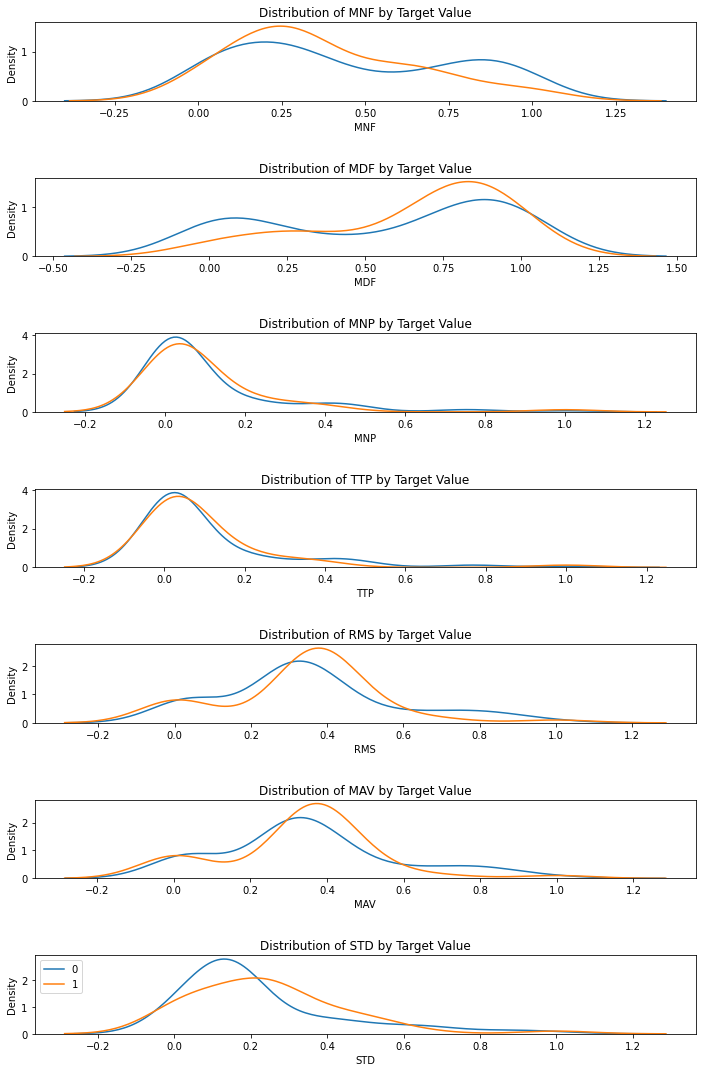

In [91]:
plt.figure(figsize = (10, 15))

# iterate through the sources
for i, source in enumerate(['MNF', 'MDF', "MNP", 'TTP', 'RMS', 'MAV', 'STD']):

    # create a new subplot for each source
    plt.subplot(7, 1, i + 1)
    # plot target
    sns.kdeplot(fitur.loc[fitur['Target'] == 0, source], label = 'Target == 0')
    sns.kdeplot(fitur.loc[fitur['Target'] == 1, source], label = 'Target == 1')
    
 
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.legend(['0', '1'], loc ='upper left')
plt.tight_layout(h_pad = 3)

In [227]:
import numpy as np

def replace_outliers(data, column, method='both'):
    """
    Replace outliers in a specific column with a specified value.

    Args:
        data (pandas.DataFrame): The input dataframe.
        column (str): The column name containing the outliers.
        method (str, optional): The capping method. Options are 'both', 'upper', or 'lower'. Defaults to 'both'.

    Returns:
        pandas.DataFrame: The dataframe with outliers replaced.
    """
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    if method == 'both':
        data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])
        data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])
    elif method == 'upper':
        data[column] = np.where(data[column] > upper_limit, upper_limit, data[column])
    elif method == 'lower':
        data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])

    return data

In [228]:
# Removing Outliers

fitur_clean = replace_outliers(fitur, 'MNF', method='both')
fitur_clean = replace_outliers(fitur_clean, 'MDF', method='both')
fitur_clean = replace_outliers(fitur_clean, 'MNP', method='both')
fitur_clean = replace_outliers(fitur_clean, 'TTP', method='both')
fitur_clean = replace_outliers(fitur_clean, 'RMS', method='both')
fitur_clean = replace_outliers(fitur_clean, 'MAV', method='both')
fitur_clean = replace_outliers(fitur_clean, 'STD', method='both')


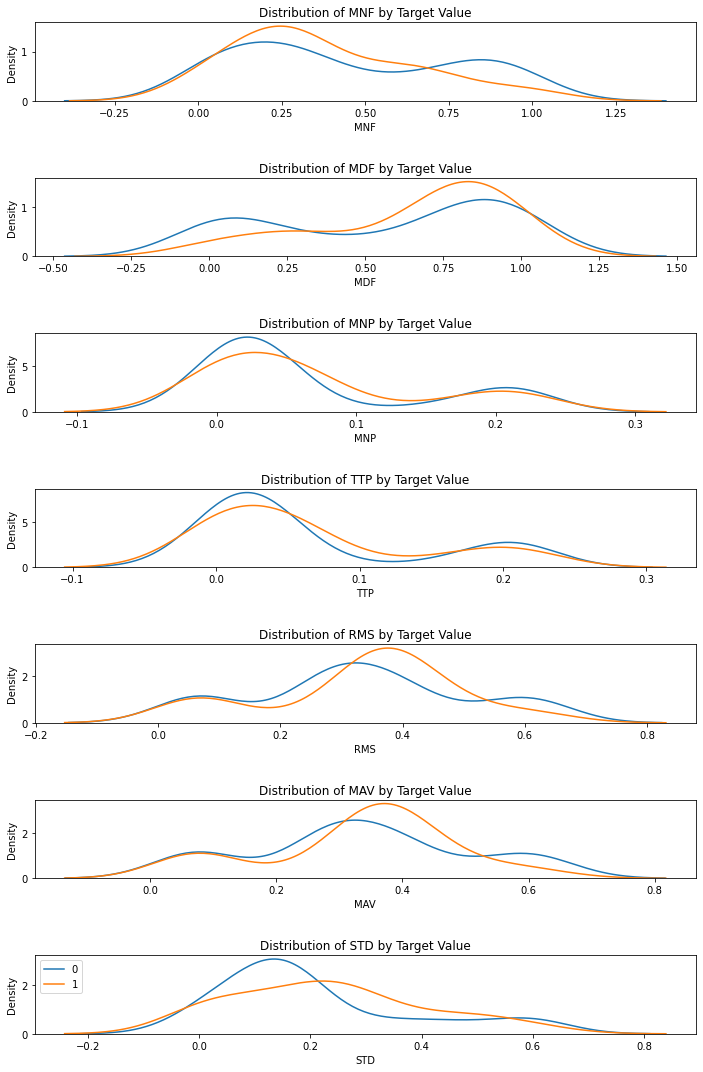

In [272]:
plt.figure(figsize = (10, 15))

# iterate through the sources
for i, source in enumerate(['MNF', 'MDF', "MNP", 'TTP', 'RMS', 'MAV', 'STD']):

    # create a new subplot for each source
    plt.subplot(7, 1, i + 1)
    # plot target
    sns.kdeplot(fitur_clean.loc[fitur_clean['Target'] == 0, source], label = 'Target == 0')
    sns.kdeplot(fitur_clean.loc[fitur_clean['Target'] == 1, source], label = 'Target == 1')
    
 
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.legend(['0', '1'], loc ='upper left')
plt.tight_layout(h_pad = 3)

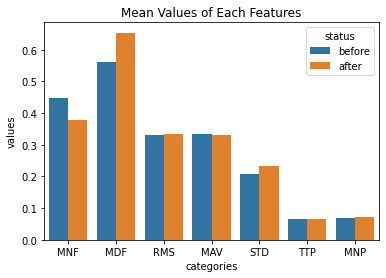

In [273]:
# Plotting Summary of Features

mnf_b = fitur_clean[fitur_clean['Target'] == 0]['MNF'].mean()
mnf = fitur_clean[fitur_clean['Target'] == 1]['MNF'].mean()

mdf_b = fitur_clean[fitur_clean['Target'] == 0]['MDF'].mean()
mdf = fitur_clean[fitur_clean['Target'] == 1]['MDF'].mean()

rms_b = fitur_clean[fitur_clean['Target'] == 0]['RMS'].mean()
rms = fitur_clean[fitur_clean['Target'] == 1]['RMS'].mean()

mav_b = fitur_clean[fitur_clean['Target'] == 0]['MAV'].mean()
mav = fitur_clean[fitur_clean['Target'] == 1]['MAV'].mean()

std_b = fitur_clean[fitur_clean['Target'] == 0]['STD'].mean()
std = fitur_clean[fitur_clean['Target'] == 1]['STD'].mean()

ttp_b = fitur_clean[fitur_clean['Target'] == 0]['TTP'].mean()
ttp = fitur_clean[fitur_clean['Target'] == 1]['TTP'].mean()

mnp_b = fitur_clean[fitur_clean['Target'] == 0]['MNP'].mean()
mnp = fitur_clean[fitur_clean['Target'] == 1]['MNP'].mean()

df = pd.DataFrame({
    'before': [mnf_b, mdf_b, rms_b, mav_b, std_b, ttp_b, mnp_b],
    'after':[mnf, mdf, rms, mav, std,ttp, mnp]})

categories = ['MNF', 'MDF', 'RMS', 'MAV', 'STD', 'TTP', 'MNP']
before_values = df['before'].values
after_values = df['after'].values

plot_data = pd.DataFrame({
    'categories': categories,
    'before': before_values,
    'after': after_values
})

melted_data = plot_data.melt(id_vars='categories', var_name='status', value_name='values')
ax = sns.barplot(x='categories', y='values', hue='status', data=melted_data)
ax.set_title("Mean Values of Each Features")
plt.show()


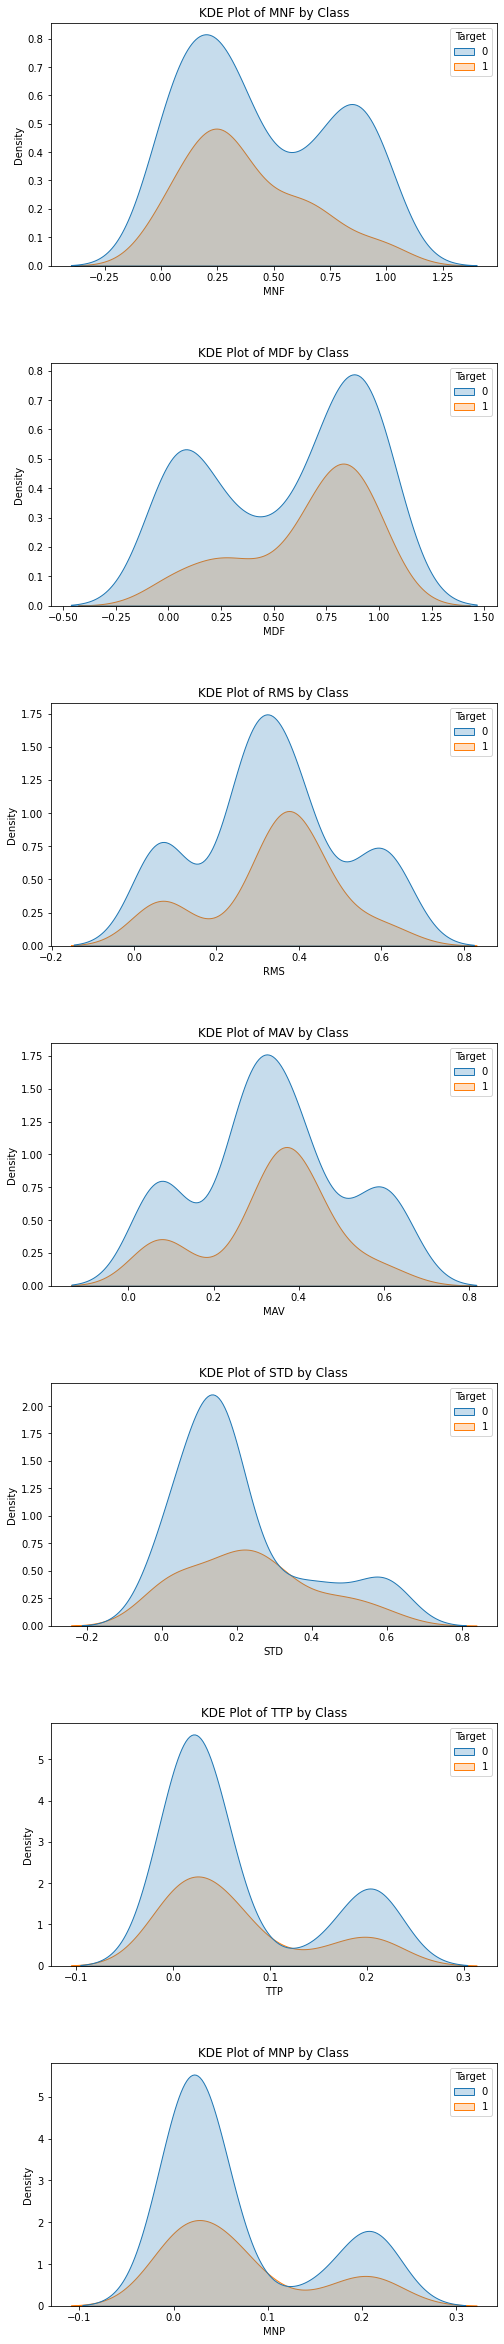

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature categories
categories = ['MNF', 'MDF', 'RMS', 'MAV', 'STD', 'TTP', 'MNP']

# Create a figure with subplots for each feature
fig, axes = plt.subplots(nrows=len(categories), ncols=1, figsize=(8, 6 * len(categories)))
fig.subplots_adjust(hspace=0.4)

# Iterate over each feature and plot KDE plots for each class
for i, feature in enumerate(categories):
    ax = axes[i]
    sns.kdeplot(data=fitur_clean, x=feature, hue='Target', fill=True, ax=ax)
    ax.set_title(f'KDE Plot of {feature} by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

plt.show()


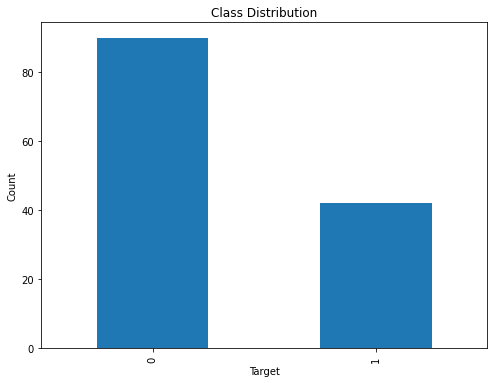

In [274]:
# Calculate the count of each class
class_counts = fitur_clean['Target'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [275]:
class_counts

0    90
1    42
Name: Target, dtype: int64

In [276]:
fitur_clean.reset_index(drop=True, inplace=True)
fitur_clean

MNF       MDF       MNP       TTP       RMS       MAV       STD  \
0    0.680156  0.143763  0.000000  0.000000  0.066552  0.074628  0.000000   
1    0.714349  0.148099  0.000047  0.000045  0.066552  0.074628  0.001415   
2    0.757639  0.137425  0.000101  0.000097  0.066552  0.074628  0.003223   
3    0.799474  0.126418  0.000364  0.000351  0.066552  0.074628  0.008975   
4    0.882209  0.029019  0.011681  0.012274  0.067128  0.074628  0.072591   
..        ...       ...       ...       ...       ...       ...       ...   
127  0.449084  0.662728  0.212971  0.208044  0.459192  0.433806  0.597227   
128  0.531044  0.507765  0.212971  0.208044  0.493141  0.474726  0.530479   
129  0.572916  0.558069  0.212971  0.208044  0.610513  0.561947  0.597227   
130  0.160046  0.870358  0.061631  0.059980  0.469398  0.466161  0.246937   
131  0.099362  0.922350  0.017244  0.015526  0.410597  0.411118  0.157573   

     Target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
127       1  
128       1  
129       1  
130       1  
131       1  

[132 rows x 8 columns]

# 6. Modeling & Evaluation

In [303]:
X = fitur_clean.drop(['Target'], axis=1)
y = fitur_clean['Target']

## Random Forest

In [430]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define the list of random_state values to try
random_state_values = range(101)

best_random_state = None
best_model = None
best_recall = 0

# Iterate over the random_state values
for random_state in random_state_values:
    # Split the data into train and test sets using the current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create and fit the RandomForestClassifier
    classifier_rf = RandomForestClassifier(random_state=random_state, n_jobs=-1, max_depth=5,
                                           n_estimators=100, oob_score=True)
    classifier_rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier_rf.predict(X_test)

    # Calculate the recall weighted-average
    report = classification_report(y_test, y_pred, output_dict=True)
    recall_weighted_avg = report['weighted avg']['recall']

    # Check if the recall meets the threshold and the model is not overfitting
    if recall_weighted_avg >= 0.85 and not classifier_rf.oob_score_ > 0.9:
        # Update the best values
        if recall_weighted_avg > best_recall:
            best_recall = recall_weighted_avg
            best_random_state = random_state
            best_model = classifier_rf

# Print the best random_state and recall
print("Best Random State:", best_random_state)
print("Best Recall:", best_recall)

# Use the best model for further analysis
# best_model.predict(...)


Best Random State: 3
Best Recall: 0.9259259259259259


In [431]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_rf = RandomForestClassifier(random_state=3, n_jobs=-1, max_depth=5,
                                           n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=3)

In [432]:
y_pred = classifier_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.78      0.88         9

    accuracy                           0.93        27
   macro avg       0.95      0.89      0.91        27
weighted avg       0.93      0.93      0.92        27



In [433]:
print(classification_report(y_train,classifier_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.94      0.97        33

    accuracy                           0.98       105
   macro avg       0.99      0.97      0.98       105
weighted avg       0.98      0.98      0.98       105



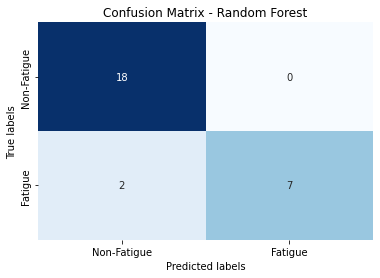

In [414]:
y_pred = classifier_rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Non-Fatigue', 'Fatigue']

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix - Random Forest")
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Display plot
plt.show()

## Random Forest with Hyperparameter Tuning

In [415]:
# Hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the parameter grid for hyperparameter tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'n_estimators': [10, 25, 30, 50, 100, 200]
}

best_random_state = None
best_recall = 0.0
threshold = 0.85

# Iterate over random_state values
for random_state in range(10):
    # Split the data into train and test sets with the current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Instantiate the random forest classifier
    rf = RandomForestClassifier(random_state=random_state, n_jobs=-1)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="recall_weighted")
    grid_search.fit(X_train, y_train)

    # Get the best estimator from the grid search
    rf_best = grid_search.best_estimator_

    # Fit the model on the training data
    rf_best.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_best.predict(X_test)

    # Calculate the recall weighted average
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']

    # Check if the recall meets the threshold and is higher than the previous best recall
    if recall >= threshold and recall > best_recall:
        best_random_state = random_state
        best_recall = recall

    # Break the loop if the best recall already meets the threshold
    if best_recall >= threshold:
        break

print("Best random_state:", best_random_state)
print("Best recall:", best_recall)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best random_state: 1
Best recall: 0.8888888888888888


In [408]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="recall_weighted")
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
rf_best = grid_search.best_estimator_

# Fit the model on the training data
rf_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_best.predict(X_test)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


In [405]:
print(classification_report(y_test,rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.83      0.71      0.77         7

    accuracy                           0.89        27
   macro avg       0.87      0.83      0.85        27
weighted avg       0.89      0.89      0.89        27



In [406]:
print(classification_report(y_train,rf_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        70
           1       0.93      0.77      0.84        35

    accuracy                           0.90       105
   macro avg       0.91      0.87      0.89       105
weighted avg       0.91      0.90      0.90       105



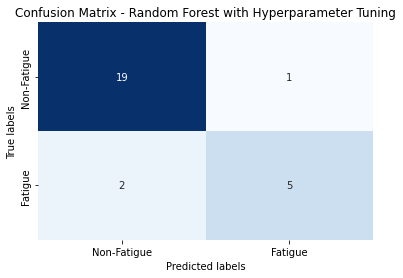

In [416]:
y_pred = rf_best.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Non-Fatigue', 'Fatigue']

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix - Random Forest with Hyperparameter Tuning")
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Display plot
plt.show()

## XGboost

In [434]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define the list of random_state values to try
random_state_values = range(101)

best_random_state = None
best_model = None
best_recall = 0

# Iterate over the random_state values
for random_state in random_state_values:
    # Split the data into train and test sets with the current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create and fit the RandomForestClassifier
    xgb = XGBClassifier(random_state=random_state)
    xgb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb.predict(X_test)

    # Calculate the recall weighted-average
    report = classification_report(y_test, y_pred, output_dict=True)
    recall_weighted_avg = report['weighted avg']['recall']

    # Check if the recall meets the threshold and the model is not overfitting
    if recall_weighted_avg >= 0.85:
        # Update the best values
        if recall_weighted_avg > best_recall:
            best_recall = recall_weighted_avg
            best_random_state = random_state
            best_model = xgb

# Print the best random_state and recall
print("Best Random State:", best_random_state)
print("Best Recall:", best_recall)

# Use the best model for further analysis
# best_model.predict(...)


Best Random State: 19
Best Recall: 0.9629629629629629


In [435]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
    
xgb = xgb.XGBClassifier(objective='binary:logistic',eval_metric = 'auc', n_jobs=-1, random_state=19)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=19, ...)

In [436]:
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.90      0.95        10

    accuracy                           0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27



In [437]:
print(classification_report(y_train,xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        32

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



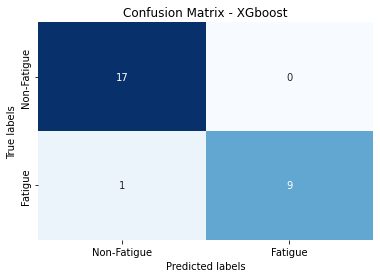

In [438]:
y_pred = xgb.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['Non-Fatigue', 'Fatigue']

# Create heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix - XGboost")
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Display plot
plt.show()

## Adaboost

In [440]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Define the list of random_state values to try
random_state_values = range(101)

best_random_state = None
best_model = None
best_recall = 0

# Iterate over the random_state values
for random_state in random_state_values:
    # Split the data into train and test sets with the current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create and fit the RandomForestClassifier
    adaboost = AdaBoostClassifier(random_state=random_state)
    adaboost.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = adaboost.predict(X_test)

    # Calculate the recall weighted-average
    report = classification_report(y_test, y_pred, output_dict=True)
    recall_weighted_avg = report['weighted avg']['recall']

    # Check if the recall meets the threshold and the model is not overfitting
    if recall_weighted_avg >= 0.85:
        # Update the best values
        if recall_weighted_avg > best_recall:
            best_recall = recall_weighted_avg
            best_random_state = random_state
            best_model = adaboost

# Print the best random_state and recall
print("Best Random State:", best_random_state)
print("Best Recall:", best_recall)

# Use the best model for further analysis
# best_model.predict(...)


Best Random State: 1
Best Recall: 0.9259259259259259


In [441]:
from sklearn.ensemble import AdaBoostClassifier

# Split the data into train and test sets with the current random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create an AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, random_state=1)

# Train the classifier
adaboost.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [442]:
print(classification_report(y_test,adaboost.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.71      0.83         7

    accuracy                           0.93        27
   macro avg       0.95      0.86      0.89        27
weighted avg       0.93      0.93      0.92        27



In [443]:
print(classification_report(y_train,adaboost.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

